In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Ã¼rÃ¼nler=pd.read_csv("harcamaÃ¼rÃ¼nleri1.csv",index_col=0)
tÃ¼fe=pd.read_csv("tÃ¼fe.csv",index_col=0)
tÃ¼fe.index=pd.to_datetime(tÃ¼fe.index)
tÃ¼fe.to_csv("C:/Users/Bora/Documents/GitHub/web-tufe-flask/tÃ¼fe.csv")
tÃ¼fe.to_csv("C:/Users/Bora/Documents/GitHub/webtufedata/data/tufe.csv")
gruplar=pd.read_csv("gruplar_int.csv",index_col=0)
gruplar.index=pd.to_datetime(gruplar.index)
gruplar.to_csv("C:/Users/Bora/Documents/GitHub/web-tufe-flask/gruplar_int.csv")
gruplar.to_csv("C:/Users/Bora/Documents/GitHub/webtufedata/data/gruplar_int.csv")
endeksler=pd.read_csv("endeksler.csv",index_col=0)
endeksler.index=pd.to_datetime(endeksler.index)
endeksler.to_csv("C:/Users/Bora/Documents/GitHub/web-tufe-flask/endeksler_int.csv")
endeksler.to_csv("C:/Users/Bora/Documents/GitHub/web-tufe-flask/endeksler.csv")
endeksler.to_csv("C:/Users/Bora/Documents/GitHub/webtufedata/data/endeksler.csv")
harcama_gruplarÄ±=pd.read_csv("harcama_gruplarÄ±.csv",index_col=0)
harcama_gruplarÄ±.index=pd.to_datetime(harcama_gruplarÄ±.index)
harcama_gruplarÄ±=harcama_gruplarÄ±.sort_index()
harcama_gruplarÄ±.to_csv("C:/Users/Bora/Documents/GitHub/web-tufe-flask/harcama_gruplarÄ±.csv")
harcama_gruplarÄ±.to_csv("C:/Users/Bora/Documents/GitHub/webtufedata/data/harcamagruplarÄ±.csv")
Ã¶zelgÃ¶stergeler=pd.read_csv("Ã¶zelgÃ¶stergeler.csv",index_col=0)
Ã¶zelgÃ¶stergeler.index=pd.to_datetime(Ã¶zelgÃ¶stergeler.index)
Ã¶zelgÃ¶stergeler.to_csv("C:/Users/Bora/Documents/GitHub/web-tufe-flask/Ã¶zelgÃ¶stergeler.csv")
Ã¶zelgÃ¶stergeler.to_csv("C:/Users/Bora/Documents/GitHub/webtufedata/data/ozelgostergeler.csv")
Ã¶zelgÃ¶stergeler["TÃœFE"]=tÃ¼fe["TÃœFE"]
Ã¶zel=pd.read_excel("Ã¶zel.xlsx")
cols=Ã¶zel.iloc[3,:]
Ã¶zel=Ã¶zel.iloc[4:,:]
Ã¶zel.columns=["Kod", "Grup", "EN", "AÄŸÄ±rlÄ±k", '1.Alt GÃ¶sterge', '2.Orta GÃ¶sterge',
       '3.Ãœst GÃ¶sterge', np.nan, np.nan, np.nan, '4.En Ãœst GÃ¶sterge', np.nan, np.nan,
       '5.TÃœFE A', np.nan, np.nan, '6.TÃœFE B', np.nan, np.nan, '7.TÃœFE C', np.nan, np.nan,
       '8.TÃœFE D', np.nan, np.nan, '9.TÃœFE E', np.nan, np.nan, '10.TÃœFE F']

aÄŸÄ±rlÄ±klar=pd.read_csv("aÄŸÄ±rlÄ±klartÃ¼fe.csv",index_col=0)

def hareketli_aylik_ortalama(df):
    
        deÄŸer = df.name  # Kolon ismi
        df = pd.DataFrame(df)
        df["Tarih"] = pd.to_datetime(df.index)  # Tarih sÃ¼tununu datetime formatÄ±na Ã§evir
        df["GÃ¼n SÄ±rasÄ±"] = df.groupby(df["Tarih"].dt.to_period("M")).cumcount() + 1  # Her ay iÃ§in gÃ¼n sÄ±rasÄ±nÄ± oluÅŸtur
        
        # Her ay iÃ§in ilk 24 gÃ¼nÃ¼ sÄ±nÄ±rla ve hareketli ortalama hesapla
        df["AylÄ±k Ortalama"] = (
            df[df["GÃ¼n SÄ±rasÄ±"] <= 24]
            .groupby(df["Tarih"].dt.to_period("M"))[deÄŸer]
            .expanding()
            .mean()
            .reset_index(level=0, drop=True)
        )
        
        # Orijinal indeksi geri yÃ¼kle
        df.index = pd.to_datetime(df.index)
        return df
data=pd.read_csv("C:/Users/Bora/Documents/GitHub/web-tufe/deneme3.csv",index_col=0)
sepet=pd.read_csv("C:/Users/Bora/Documents/GitHub/streamlit-gfe/marketli.csv",index_col=0)

def aylik_degisim_serisi(ts: pd.Series) -> pd.Series:
        ts = ts.sort_index()
        aylik_degisim = []

        for tarih in ts.index:
            gun = tarih.day
            ay = tarih.month
            yil = tarih.year

            # Bu ay ve geÃ§en ay iÃ§in veri
            bu_ay = ts[(ts.index.year == yil) & (ts.index.month == ay)]
            if ay == 1:
                onceki_ay = ts[(ts.index.year == yil - 1) & (ts.index.month == 12)]
            else:
                onceki_ay = ts[(ts.index.year == yil) & (ts.index.month == ay - 1)]

            if gun <= 24:
                ort_bu = bu_ay.iloc[:gun].mean()
                ort_onceki = onceki_ay.iloc[:gun].mean()

                if pd.notna(ort_bu) and pd.notna(ort_onceki) and ort_onceki != 0:
                    oran = (ort_bu / ort_onceki) - 1
                    aylik_degisim.append(oran*100)
                else:
                    aylik_degisim.append(None)
            else:
                try:
                    tarih_24 = bu_ay.index[23]
                    oran_24 = aylik_degisim[ts.index.get_loc(tarih_24)]
                    aylik_degisim.append(oran_24)
                except:
                    aylik_degisim.append(None)

        return pd.Series(aylik_degisim[-gun:], index=ts.index[-gun:])

C:\Users\Bora\AppData\Local\Temp\ipykernel_5092\2260606896.py:57: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("C:/Users/Bora/Documents/GitHub/web-tufe/deneme3.csv",index_col=0)


In [2]:
sepet=sepet[(sepet["Åžehir"].isin(["TÃ¼rkiye","Ä°STANBUL"])) | (sepet["Market"]=="Hal")]

sepet=sepet.rename(columns={"ÃœrÃ¼n":"ÃœrÃ¼n AdÄ±"})
sepet["ÃœrÃ¼n AdÄ±"] = sepet.apply(
    lambda row: f"{row['ÃœrÃ¼n AdÄ±']} {row['Market']}" 
    if pd.notna(row["Market"]) and row["Market"].lower() not in str(row["ÃœrÃ¼n AdÄ±"]).lower() 
    else row["ÃœrÃ¼n AdÄ±"],
    axis=1
)


In [3]:
sepet=sepet.iloc[:,:-2]

In [ ]:
# Sadece tarih sÃ¼tunlarÄ±nÄ± seÃ§
date_cols = pd.to_datetime([col for col in data.columns if col not in ['ÃœrÃ¼n AdÄ±', 'ID']])

# Tarih sÃ¼tunlarÄ±nÄ± iÃ§eren kÄ±smÄ± al ve transpoze et
price_data = data.set_index(['ÃœrÃ¼n AdÄ±', 'ID'])
price_data.columns = date_cols
price_data = price_data.T  # Transpose: tarihler index'e alÄ±nÄ±r

# HaftalÄ±k ortalamalarÄ± al
weekly_avg = price_data.resample("W").mean()

# Tekrar orijinal forma getir
weekly_avg = weekly_avg.T.reset_index()
weekly_avg.index=data.index
weekly_avg

In [ ]:
lok=['Ayran (Servis edilen)', 'Burgerler',
       'EkmekarasÄ± Yiyecekler (DÃ¶ner)',
       'HazÄ±r Yemekler (Pilav, Kuru Fasulye)', 'Kebaplar',
       'Pastane ÃœrÃ¼nleri', 'Pideler', 'Pizzalar',
       'SoÄŸuk Ä°Ã§ecekler (Servis edilen)',
       'SÄ±cak Ä°Ã§ecekler (Servis edilen)', 'Ã‡iÄŸ KÃ¶fte', 'Ã‡orbalar']

weekly_avg.loc[lok,"ÃœrÃ¼n AdÄ±"]=weekly_avg.loc[lok,"ÃœrÃ¼n AdÄ±"] + " "+ weekly_avg.loc[lok,"ID"].astype(str)


In [ ]:
# Sadece tarih sÃ¼tunlarÄ±nÄ± seÃ§
date_cols = pd.to_datetime([col for col in sepet.columns if col not in ['ÃœrÃ¼n AdÄ±']])

# Tarih sÃ¼tunlarÄ±nÄ± iÃ§eren kÄ±smÄ± al ve transpoze et
price_data = sepet.set_index(['ÃœrÃ¼n AdÄ±'])
price_data.columns = date_cols
price_data = price_data.T  # Transpose: tarihler index'e alÄ±nÄ±r

# HaftalÄ±k ortalamalarÄ± al
weekly_avg1 = price_data.resample("W").mean()

# Tekrar orijinal forma getir
weekly_avg1 = weekly_avg1.T.reset_index()
weekly_avg1.index=sepet.index
weekly_avg1=weekly_avg1.iloc[:,[0]+list(range(-7,0))]
weekly_avg1

In [ ]:
fiyatlar=pd.concat([weekly_avg.drop("ID",axis=1), weekly_avg1], axis=0)

In [ ]:
new_columns = [fiyatlar.columns[0]]  # Ä°lk sÃ¼tun ismi sabit kalacak

for col in fiyatlar.columns[1:]:
    try:
        tarih = pd.to_datetime(col)
        new_columns.append(tarih.strftime("%Y-%m-%d"))
    except:
        new_columns.append(col)  # Tarihe Ã§evrilemiyorsa aynen bÄ±rak

# Yeni sÃ¼tun isimlerini ata
fiyatlar.columns = new_columns

In [ ]:
fiyatlar.loc[fiyatlar["ÃœrÃ¼n AdÄ±"]=="EmlakJet Kira","ÃœrÃ¼n AdÄ±"]="EmlakJet Kira (mÂ²)"

In [ ]:
from openpyxl import load_workbook
for ana in Ã¼rÃ¼nler["Ana Grup"].unique():
    excel_dosya = f"{ana}.xlsx"
    fiyatlar.loc[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Ana Grup"]==ana]["ÃœrÃ¼n"].values].to_excel(excel_dosya)

    # openpyxl ile yÃ¼kle ve sÃ¼tun geniÅŸliklerini ayarla
    wb = load_workbook(excel_dosya)
    ws = wb.active

    for col in ws.columns:
        max_length = 0
        column = col[0].column_letter  # SÃ¼tun harfi (A, B, C...)
        for cell in col:
            try:
                if cell.value:
                    max_length = max(max_length, len(str(cell.value)))
            except:
                pass
        # +2 biraz boÅŸluk bÄ±rakmak iÃ§in
        ws.column_dimensions[column].width = max_length + 2

    # DosyayÄ± yeniden kaydet
    wb.save(excel_dosya)




In [ ]:
from datetime import datetime
now = datetime.now()
zaman = f"{now.year}-{now.month:02d}-{now.day:02d} {now.hour:02d}:{now.minute:02d}"

In [ ]:
with open("C:/Users/Bora/Documents/GitHub/web-tufe-flask/time.txt", "w", encoding="utf-8") as dosya:
    dosya.write(zaman)

In [ ]:
satrim=pd.DataFrame(index=endeksler.index[90:],columns=["CPI"])
for i in range(len(endeksler)-90):
    satrim_Ã¼rÃ¼nler=endeksler.pct_change(90).dropna().iloc[i].sort_values().iloc[26:-26]
    satrim_aÄŸÄ±rlÄ±k=Ã¼rÃ¼nler[Ã¼rÃ¼nler["ÃœrÃ¼n"].isin(satrim_Ã¼rÃ¼nler.index)].groupby("ÃœrÃ¼n")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["ÃœrÃ¼n"].isin(satrim_Ã¼rÃ¼nler.index)].groupby("ÃœrÃ¼n")["AÄŸÄ±rlÄ±k"].sum().sum()
    satrim["CPI"].iloc[i]=((endeksler[satrim_aÄŸÄ±rlÄ±k.index].pct_change(90).dropna().iloc[i]*satrim_aÄŸÄ±rlÄ±k*100).sum())




In [ ]:
eÄŸilim=pd.DataFrame()
eÄŸilim["Web TÃœFE"]=(((tÃ¼fe.pct_change(30).dropna()+1)**(365/30))-1)*100
eÄŸilim["B"]=(((Ã¶zelgÃ¶stergeler["TÃœFE B"].pct_change(30).dropna()+1)**(365/30))-1)*100
eÄŸilim["C"]=(((Ã¶zelgÃ¶stergeler["TÃœFE C"].pct_change(30).dropna()+1)**(365/30))-1)*100
eÄŸilim["Medyan"]=(((harcama_gruplarÄ±.pct_change(30).mean(axis=1)+1)**(365/30))-1)*100
eÄŸilim["SATRIM"]=((((satrim["CPI"]/100)+1)**(365/30))-1)*100
eÄŸilim=((((eÄŸilim/100)+1)**(1/12))-1)*100
eÄŸilim["Ortalama"]=eÄŸilim.mean(axis=1).rolling(30).mean()
eÄŸilim["Min"]=eÄŸilim.iloc[:,:-1].rolling(30).mean().min(axis=1)
eÄŸilim["Max"]=eÄŸilim.iloc[:,:-2].rolling(30).mean().max(axis=1)
eÄŸilim

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.title("Web TÃœFE AylÄ±k Ana EÄŸilimi, 30 GÃ¼nlÃ¼k Hareketli Ortalama (%)")
plt.plot(eÄŸilim["Ortalama"])
plt.fill_between(eÄŸilim.dropna().index,eÄŸilim["Min"].dropna(),eÄŸilim["Max"].dropna(),alpha=0.5,color="orange",label="Max-Min AralÄ±ÄŸÄ±")
plt.xticks(eÄŸilim.dropna().index[::10],rotation=45)
plt.legend()

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.title("Web TÃœFE 90 GÃ¼nlÃ¼k DeÄŸiÅŸim,YÄ±llÄ±klandÄ±rÄ±lmÄ±ÅŸ (%)")
plt.plot((((tÃ¼fe.pct_change(90).dropna()+1)**(365/90))-1)*100,label="Web TÃœFE")
plt.plot((((Ã¶zelgÃ¶stergeler["TÃœFE B"].pct_change(90).dropna()+1)**(365/90))-1)*100,label="B")
plt.plot((((Ã¶zelgÃ¶stergeler["TÃœFE C"].pct_change(90).dropna()+1)**(365/90))-1)*100,label="C")
plt.plot((((harcama_gruplarÄ±.pct_change().mean(axis=1).rolling(90).mean()+1)**365)-1)*100,label="Medyan")
plt.plot((((1+satrim["CPI"]/100)**4)-1)*100,label="SATRIM")
plt.legend()

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.title("Web TÃœFE 90 GÃ¼nlÃ¼k Ana EÄŸilimi,YÄ±llÄ±klandÄ±rÄ±lmÄ±ÅŸ (%)")
plt.plot((Ã¶zelgÃ¶stergeler["Temel mallar"].pct_change(90).dropna()+1)**4, label="Temel Mallar")
plt.plot((Ã¶zelgÃ¶stergeler["Enerji"].pct_change(90).dropna()+1)**4, label="Enerji")
plt.plot((Ã¶zelgÃ¶stergeler["Hizmet"].pct_change(90).dropna()+1)**4, label="Hizmet")
plt.plot((Ã¶zelgÃ¶stergeler["GÄ±da ve alkolsÃ¼z iÃ§ecekler"].pct_change(90).dropna()+1)**4, label="GÄ±da ve AlkolsÃ¼z Ä°Ã§ecekler")
plt.legend()
plt.xticks(rotation=45)

In [ ]:
yayÄ±lÄ±m=pd.DataFrame()
for col in data.columns[-41:]:
    onceki_col=data.columns[data.columns.get_loc(col)-1]
    t=data[data[col].notna()][[onceki_col, col]]
    t["Fark"]=t.diff(axis=1).iloc[:,-1]
    yayÄ±lÄ±m[col]= (t[t["Fark"]>0].groupby(level=0).size()/ t.groupby(level=0).size() * 100).fillna(0).sort_values()
   

In [ ]:
w=aÄŸÄ±rlÄ±klar.loc[yayÄ±lÄ±m.index]["AÄŸÄ±rlÄ±k"]/ aÄŸÄ±rlÄ±klar.loc[yayÄ±lÄ±m.index]["AÄŸÄ±rlÄ±k"].sum()

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.title("Web TÃœFE YayÄ±lÄ±mEndeksi")
plt.plot((yayÄ±lÄ±m.T*w).sum(axis=1)) 
plt.xticks(yayÄ±lÄ±m.columns[::5],rotation=45)

In [ ]:
dana=sepet[(sepet["Åžehir"]=="TÃ¼rkiye") | (sepet["Åžehir"]=="Ä°STANBUL")].loc["Kuru KayÄ±sÄ±"]
dana=dana[(dana.iloc[:,-25:-2].notna().sum(axis=1)>1)]

dana["DeÄŸiÅŸim"]=((dana.iloc[:,-25:-2].pct_change(axis=1).iloc[:,-1]+1)-1)*100
dana=dana.iloc[:,list(range(-25,0))+[0]].drop("Åžehir",axis=1).sort_values(by="DeÄŸiÅŸim").round(2)
dana.to_csv("test.csv")

In [2]:
def _update(data,tablo):

    import pandas as pd
    from googleapiclient.discovery import build
    from googleapiclient.errors import HttpError
    from google.oauth2.service_account import Credentials

    # --- Google Sheets API kimlik doÄŸrulamasÄ± ---
    SCOPES = ['https://www.googleapis.com/auth/spreadsheets']
    SERVICE_ACCOUNT_FILE = 'service_account.json'  # <- Buraya servis hesabÄ± JSON dosya adÄ±nÄ± yaz

    credentials = Credentials.from_service_account_file(
        SERVICE_ACCOUNT_FILE, scopes=SCOPES)
    service = build('sheets', 'v4', credentials=credentials)

    # --- DataFrame hazÄ±rlama (tÃ¼fe'nin tanÄ±mlÄ± olduÄŸunu varsayÄ±yoruz) ---
    df = pd.DataFrame()
    df["Tarih"] = data.index
    df = pd.concat([df, data.reset_index(drop=True)], axis=1)

    # --- Timestamp'leri string formatÄ±na Ã§evirerek JSON hatasÄ±nÄ± Ã¶nleme ---
    df = df.applymap(lambda x: x.strftime('%Y-%m-%d') if isinstance(x, pd.Timestamp) else x)

    # --- Google Sheets'e yazÄ±lacak veri gÃ¶vdesi ---
    values = [df.columns.tolist()] + df.values.tolist()  # BaÅŸlÄ±k + veri
    body = {'values': values}

    # --- Hedef Google Sheets bilgileri ---
    spreadsheet_id = '14iiu_MQwtMxHTFt6ceyFhkk6v0OL-wuoQS1IGPzSpNE'   # <- Kendi Sheet ID
    range_ = f'{tablo}!A1'  # YazÄ±lacak hÃ¼cre aralÄ±ÄŸÄ±

    # --- Veri gÃ¼ncelleme iÅŸlemi ---
    try:
        spreadsheet = service.spreadsheets().get(spreadsheetId=spreadsheet_id).execute()
        sheet_id = None

        # Sayfa adÄ±nÄ± arayÄ±p ID'sini alÄ±yoruz
        for sheet in spreadsheet['sheets']:
            if sheet['properties']['title'] == tablo:
                sheet_id = sheet['properties']['sheetId']
                break

        # EÄŸer sayfa bulunduysa, iÃ§eriÄŸini temizleyelim
        if sheet_id:
            range_ = f"{tablo}!A1:AAB1000"  # SayfanÄ±n tÃ¼m verilerini temizlemek iÃ§in aralÄ±k belirliyoruz (A1:Z1000 Ã¶rneÄŸi)
            
            # Veriyi temizlemek iÃ§in clear fonksiyonu
            service.spreadsheets().values().clear(spreadsheetId=spreadsheet_id, range=range_).execute()
            print(f"{tablo} sayfasÄ±nÄ±n iÃ§eriÄŸi temizlendi.")
        else:
            print(f"{tablo} sayfasÄ± bulunamadÄ±.")




        result = service.spreadsheets().values().update(
            spreadsheetId=spreadsheet_id,
            range=range_,
            valueInputOption='RAW',
            body=body
        ).execute()

        print(f"{result.get('updatedCells')} hÃ¼cre gÃ¼ncellendi.")

    except HttpError as err:
        print(f"Hata oluÅŸtu: {err}")


In [3]:
import warnings
warnings.filterwarnings("ignore")
_update(tÃ¼fe,"Web TÃœFE")
_update(gruplar.drop("TÃœFE",axis=1),"Ana Gruplar")
_update(Ã¶zelgÃ¶stergeler.drop("TÃœFE",axis=1),"Ã–zel KapsamlÄ± GÃ¶stergeler")
_update(harcama_gruplarÄ±,"Temel BaÅŸlÄ±klar")
_update(endeksler,"Maddeler")

Web TÃœFE sayfasÄ±nÄ±n iÃ§eriÄŸi temizlendi.
352 hÃ¼cre gÃ¼ncellendi.
Ana Gruplar sayfasÄ±nÄ±n iÃ§eriÄŸi temizlendi.
2288 hÃ¼cre gÃ¼ncellendi.
Ã–zel KapsamlÄ± GÃ¶stergeler sayfasÄ±nÄ±n iÃ§eriÄŸi temizlendi.
4900 hÃ¼cre gÃ¼ncellendi.
Temel BaÅŸlÄ±klar sayfasÄ±nÄ±n iÃ§eriÄŸi temizlendi.
20944 hÃ¼cre gÃ¼ncellendi.
Maddeler sayfasÄ±nÄ±n iÃ§eriÄŸi temizlendi.
59488 hÃ¼cre gÃ¼ncellendi.


In [4]:
def update(data,tablo):
    idx=""
    if tablo=="Maddeler":
        idx="Madde"   
    else:
        idx="Grup"
    

    import pandas as pd
    from googleapiclient.discovery import build
    from googleapiclient.errors import HttpError
    from google.oauth2.service_account import Credentials

    # --- Google Sheets API kimlik doÄŸrulamasÄ± ---
    SCOPES = ['https://www.googleapis.com/auth/spreadsheets']
    SERVICE_ACCOUNT_FILE = 'service_account.json'  # <- Buraya servis hesabÄ± JSON dosya adÄ±nÄ± yaz

    credentials = Credentials.from_service_account_file(
        SERVICE_ACCOUNT_FILE, scopes=SCOPES)
    service = build('sheets', 'v4', credentials=credentials)

    # --- DataFrame hazÄ±rlama ---
    df = pd.DataFrame(columns=data.columns)
    for col in df.columns:
        # Hareketli aylÄ±k ortalama hesaplanÄ±yor
        df[col] = (hareketli_aylik_ortalama(data[col]))["AylÄ±k Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna() * 100
        # Son deÄŸer aylÄ±k deÄŸiÅŸimle gÃ¼ncelleniyor
        df[col].iloc[-1] = aylik_degisim_serisi(data[col]).iloc[-1]

    # 2025-02'dan sonrasÄ±nÄ± alÄ±p, transpoze ediyoruz.
    df = df.loc["2025-02":].T

    # --- Tarihleri ve indexleri string'e dÃ¶nÃ¼ÅŸtÃ¼rme ---
    df.index = df.index.astype(str)  # Indexleri string'e dÃ¶nÃ¼ÅŸtÃ¼r
    df = df.applymap(lambda x: x.strftime('%Y-%m-%d') if isinstance(x, pd.Timestamp) else x)  # Tarihleri string'e dÃ¶nÃ¼ÅŸtÃ¼r
    df.columns=df.columns.astype(str)
    df=df.reset_index(drop=False).rename(columns={"index":idx})
    # --- Google Sheets'e yazÄ±lacak veri gÃ¶vdesi ---
    values = [df.columns.tolist()] + df.values.tolist()  # BaÅŸlÄ±k + veri
    body = {'values': values}

    # --- Hedef Google Sheets bilgileri ---
    spreadsheet_id = '14iiu_MQwtMxHTFt6ceyFhkk6v0OL-wuoQS1IGPzSpNE'  # <- Kendi Sheet ID
    range_ = f'{tablo} AylÄ±k DeÄŸiÅŸimler!A1'  # YazÄ±lacak hÃ¼cre aralÄ±ÄŸÄ±

    # --- Veri gÃ¼ncelleme iÅŸlemi ---
    try:
        result = service.spreadsheets().values().update(
            spreadsheetId=spreadsheet_id,
            range=range_,
            valueInputOption='RAW',
            body=body
        ).execute()

        print(f"{result.get('updatedCells')} hÃ¼cre gÃ¼ncellendi.")

    except HttpError as err:
        print(f"Hata oluÅŸtu: {err}")


In [5]:
data=Ã¶zelgÃ¶stergeler.copy()
df = pd.DataFrame(columns=data.columns)
for col in df.columns:
    # Hareketli aylÄ±k ortalama hesaplanÄ±yor
    df[col] = (hareketli_aylik_ortalama(data[col]))["AylÄ±k Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna() * 100
    # Son deÄŸer aylÄ±k deÄŸiÅŸimle gÃ¼ncelleniyor
    df[col].iloc[-1] = aylik_degisim_serisi(data[col]).iloc[-1]

# 2025-02'dan sonrasÄ±nÄ± alÄ±p, transpoze ediyoruz.
df = df.loc["2025-02":].T

# --- Tarihleri ve indexleri string'e dÃ¶nÃ¼ÅŸtÃ¼rme ---
df.index = df.index.astype(str)  # Indexleri string'e dÃ¶nÃ¼ÅŸtÃ¼r
df = df.applymap(lambda x: x.strftime('%Y-%m-%d') if isinstance(x, pd.Timestamp) else x)  # Tarihleri string'e dÃ¶nÃ¼ÅŸtÃ¼r
df.columns=df.columns.astype(str)
df=df.reset_index(drop=False).rename(columns={"index":"Grup"})
df.to_csv("C:/Users/Bora/Documents/GitHub/web-tufe-flask/Ã¶zelgÃ¶stergeleraylÄ±k.csv")
df.to_csv("C:/Users/Bora/Documents/GitHub/webtufedata/data/ozelgostergeleraylik.csv")

In [6]:
data=harcama_gruplarÄ±.copy()
df = pd.DataFrame(columns=data.columns)
for col in df.columns:
    # Hareketli aylÄ±k ortalama hesaplanÄ±yor
    df[col] = (hareketli_aylik_ortalama(data[col]))["AylÄ±k Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna() * 100
    # Son deÄŸer aylÄ±k deÄŸiÅŸimle gÃ¼ncelleniyor
    df[col].iloc[-1] = aylik_degisim_serisi(data[col]).iloc[-1]

# 2025-02'dan sonrasÄ±nÄ± alÄ±p, transpoze ediyoruz.
df = df.loc["2025-02":].T

# --- Tarihleri ve indexleri string'e dÃ¶nÃ¼ÅŸtÃ¼rme ---
df.index = df.index.astype(str)  # Indexleri string'e dÃ¶nÃ¼ÅŸtÃ¼r
df = df.applymap(lambda x: x.strftime('%Y-%m-%d') if isinstance(x, pd.Timestamp) else x)  # Tarihleri string'e dÃ¶nÃ¼ÅŸtÃ¼r
df.columns=df.columns.astype(str)
df=df.reset_index(drop=False).rename(columns={"index":"Grup"})
df.to_csv("C:/Users/Bora/Documents/GitHub/web-tufe-flask/harcama_gruplarÄ±aylÄ±k.csv")
df.to_csv("C:/Users/Bora/Documents/GitHub/webtufedata/data/harcamagruplarÄ±aylik.csv")

In [7]:
data=endeksler.copy()
df = pd.DataFrame(columns=data.columns)
for col in df.columns:
    # Hareketli aylÄ±k ortalama hesaplanÄ±yor
    df[col] = (hareketli_aylik_ortalama(data[col]))["AylÄ±k Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna() * 100
    # Son deÄŸer aylÄ±k deÄŸiÅŸimle gÃ¼ncelleniyor
    df[col].iloc[-1] = aylik_degisim_serisi(data[col]).iloc[-1]

# 2025-02'dan sonrasÄ±nÄ± alÄ±p, transpoze ediyoruz.
df = df.loc["2025-02":].T

# --- Tarihleri ve indexleri string'e dÃ¶nÃ¼ÅŸtÃ¼rme ---
df.index = df.index.astype(str)  # Indexleri string'e dÃ¶nÃ¼ÅŸtÃ¼r
df = df.applymap(lambda x: x.strftime('%Y-%m-%d') if isinstance(x, pd.Timestamp) else x)  # Tarihleri string'e dÃ¶nÃ¼ÅŸtÃ¼r
df.columns=df.columns.astype(str)
df=df.reset_index(drop=False).rename(columns={"index":"Madde"})
df.to_csv("C:/Users/Bora/Documents/GitHub/web-tufe-flask/maddeleraylÄ±k.csv")
df.to_csv("C:/Users/Bora/Documents/GitHub/webtufedata/data/maddeleraylÄ±k.csv")

In [8]:
data=gruplar.copy()
df = pd.DataFrame(columns=data.columns)
for col in df.columns:
    # Hareketli aylÄ±k ortalama hesaplanÄ±yor
    df[col] = (hareketli_aylik_ortalama(data[col]))["AylÄ±k Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna() * 100
    # Son deÄŸer aylÄ±k deÄŸiÅŸimle gÃ¼ncelleniyor
    df[col].iloc[-1] = aylik_degisim_serisi(data[col]).iloc[-1]

# 2025-02'dan sonrasÄ±nÄ± alÄ±p, transpoze ediyoruz.
df = df.loc["2025-02":].T

# --- Tarihleri ve indexleri string'e dÃ¶nÃ¼ÅŸtÃ¼rme ---
df.index = df.index.astype(str)  # Indexleri string'e dÃ¶nÃ¼ÅŸtÃ¼r
df = df.applymap(lambda x: x.strftime('%Y-%m-%d') if isinstance(x, pd.Timestamp) else x)  # Tarihleri string'e dÃ¶nÃ¼ÅŸtÃ¼r
df.columns=df.columns.astype(str)
df=df.reset_index(drop=False).rename(columns={"index":"Grup"})
df.to_csv("C:/Users/Bora/Documents/GitHub/web-tufe-flask/gruplaraylÄ±k.csv")
df.to_csv("C:/Users/Bora/Documents/GitHub/webtufedata/data/gruplaraylik.csv")

In [9]:
update(Ã¶zelgÃ¶stergeler,"Ã–zel KapsamlÄ± GÃ¶stergeler")
update(harcama_gruplarÄ±,"Temel BaÅŸlÄ±klar")
update(endeksler,"Maddeler")
update(gruplar,"Ana Gruplar")

174 hÃ¼cre gÃ¼ncellendi.
714 hÃ¼cre gÃ¼ncellendi.
2028 hÃ¼cre gÃ¼ncellendi.
84 hÃ¼cre gÃ¼ncellendi.


In [ ]:
endeksler.pct_change().iloc[-1].sort_values().tail(30)*100

In [ ]:
t=data[data.iloc[:, -20:].notna().sum(axis=1) >1].loc["ÅžehirlerarasÄ± OtobÃ¼s Ãœcreti "]
#t["C"]=t.iloc[:,-15:].pct_change(axis=1).iloc[:,[-1]]
t["C"]=((np.prod(t.iloc[:,-20:].pct_change(axis=1)+1,axis=1)))

t.sort_values(by="C").drop("2025-05-08",axis=1).iloc[-1,0]

In [ ]:
import re

# Åžehir ve terminal adÄ± listesi
sehir_ve_terminal = [
    "Esenler", "AlibeykÃ¶y", "Harem", "Adana", "Ä°zmir", "Hatay", "Gaziantep",
    "Bursa", "Antalya", "MuÄŸla", "Samsun", "Ankara", "AÅŸti", "Mersin", "Tokat",
    "Sivas", "Kars", "Van", "Midyat", "KahramanmaraÅŸ", "Bodrum", "Cizre",
    "Mardin", "EreÄŸli", "Yozgat", "Trabzon", "Malatya", "ÅžanlÄ±urfa", "Batman",
    "Kayseri", "Ä°stanbul", "DiyarbakÄ±r", "KarabÃ¼k", "BalÄ±kesir", "Aksaray",
    "OtogarÄ±", "OtogarÄ±1.", "Terminali","AtaÅŸehir","Dudullu","SamandÄ±ra","AÅŸti","Ankara","Dudullu Pamukkale"
]

def temiz_firma_adi(urun_adi):
    # Parantez iÃ§ini sil
    urun_adi = re.sub(r"\(.*?\)", "", urun_adi).strip()
    
    # Saat gibi gÃ¶rÃ¼nen sonundaki zamanÄ± sil (Ã¶rn: 07:30:00)
    urun_adi = re.sub(r'\d{2}:\d{2}:\d{2}$', '', urun_adi).strip()
    
    # Ä°lk kÄ±smÄ± '-' varsa ona gÃ¶re ayÄ±r, yoksa tam metni al
    parca = urun_adi.split('-')[0].strip()

    # Kelimelere ayÄ±r
    kelimeler = parca.split()

    # Sonda ÅŸehir/terminal varsa sil
    while kelimeler and kelimeler[-1] in sehir_ve_terminal:
        kelimeler.pop()

    return " ".join(kelimeler)

# Uygula ve yeni sÃ¼tuna ata
t["Firma"] = t["ÃœrÃ¼n AdÄ±"].apply(temiz_firma_adi)


In [ ]:
t.sort_values(by="C").iloc[0]

In [ ]:
t=t[t["Firma"].isin(t["Firma"].value_counts().head(150).index
)]

In [ ]:
t[t["Firma"].str.contains("pamukkale",case=False)]

In [ ]:
from scipy.stats import gmean
firmalar=((((t.groupby("Firma")["C"].apply(gmean)))-1)*100).sort_values().tail(30)


In [ ]:
plt.figure(figsize=(10, 20))
bars = plt.barh(firmalar.index, firmalar.values, color='skyblue')

# Her barÄ±n sonuna deÄŸeri yaz
for bar in bars:
    width = bar.get_width()
    plt.text(width + (0.2 if width >= 0 else -1),  # Pozitif/negatif ayrÄ±mÄ±
             bar.get_y() + bar.get_height() / 2,
             f'%{width:.2f}',
             va='center',
             ha='left' if width >= 0 else 'right',
             fontsize=12,fontweight="bold")

plt.xlabel("Fiyat DeÄŸiÅŸim OranÄ± (%)")
plt.title("Firmalara GÃ¶re ÅžehirlerarasÄ± OtobÃ¼s Ãœcreti DeÄŸiÅŸim OranÄ±")
plt.axvline(0, color='black', linewidth=0.8)

plt.show()

In [ ]:

giyim=data[data.iloc[:, -7:].notna().sum(axis=1) > 1].loc[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Ana Grup"]=="Giyim ve ayakkabÄ±"]["ÃœrÃ¼n"].values]
part1=giyim["ÃœrÃ¼n AdÄ±"].str.split(" ").str[-1].str.strip().str.split().str[0]

giyim["MaÄŸaza"]=part1

In [ ]:
giyim["MaÄŸaza"].value_counts().sort_values(ascending=False).iloc[0:20]

In [ ]:
maÄŸazalar=['Amazon TÃ¼rkiye', 'n11', 'Trendyol', 'Hepsiburada', 'Pazarama',
       'idefix', 'Boyner', 'Pttavm', 'Defactofit',
       'ebebek', 'AyakkabÄ± DÃ¼nyasÄ±', 'Ã‡iÃ§ekSepeti', 'A101']

In [ ]:
maÄŸazalar=['Amazon TÃ¼rkiye', 'n11', 'Trendyol', 'Hepsiburada', 'Pazarama',
       'idefix', 'Boyner', 'Pttavm', 'Ã‡iÃ§ekSepeti', 'A101','KoÃ§taÅŸ',"Teknosa","Karaca","Vivense","MediaMarkt","MadameCoco","Gaming.Gen.TR"]

In [ ]:
giyim.loc[giyim["MaÄŸaza"]=="DÃ¼nyasÄ±","MaÄŸaza"]="AyakkabÄ± DÃ¼nyasÄ±"
giyim.loc[giyim["MaÄŸaza"]=="TÃ¼rkiye","MaÄŸaza"]="Amazon TÃ¼rkiye"
giyim.loc[giyim["MaÄŸaza"]=="Plus","MaÄŸaza"]="Pazarama"
giyim.loc[giyim["MaÄŸaza"]=="Markt","MaÄŸaza"]="MediaMarkt"


In [ ]:
import warnings
warnings.filterwarnings("ignore")
for maÄŸaza in maÄŸazalar:
    maÄŸazadata=giyim[giyim["MaÄŸaza"]==maÄŸaza]
    pct=maÄŸazadata.iloc[:,[-3,-2]].pct_change(axis=1).iloc[:,-1].groupby(level=0).mean().sort_values()*100
    w=aÄŸÄ±rlÄ±klar.loc[giyim.index.unique()]["AÄŸÄ±rlÄ±k"]/aÄŸÄ±rlÄ±klar.loc[giyim.index.unique()]["AÄŸÄ±rlÄ±k"].sum()
    artÄ±s=(w*maÄŸazadata.iloc[:,[-3,-2]].pct_change(axis=1).iloc[:,-1].groupby(level=0).mean().sort_values()*100).sum()
    artÄ±s=artÄ±s.round(2)
    print(maÄŸaza,artÄ±s)


In [ ]:
w=aÄŸÄ±rlÄ±klar.loc[maÄŸazadata.index.unique()]["AÄŸÄ±rlÄ±k"]/aÄŸÄ±rlÄ±klar.loc[maÄŸazadata.index.unique()]["AÄŸÄ±rlÄ±k"].sum()
(w*maÄŸazadata.iloc[:,-3:-1].pct_change(axis=1).iloc[:,-1].groupby(level=0).mean().sort_values()*100).sum()

In [ ]:
endeksler.pct_change().iloc[-1].sort_values().head(30)*100

In [ ]:
aylÄ±k=pd.DataFrame(columns=["GÄ±da ve alkolsÃ¼z iÃ§ecekler","Giyim ve AyakkabÄ±","Temel Mallar","Mallar","Hizmet","Kira","Lokanta ve oteller","DiÄŸer Hizmetler","UlaÅŸtÄ±rma Hizmetleri","TÃœFE"])
aylÄ±k.loc["TÃœÄ°K"]=[1.35,2.38,2.87,2.41,3.15,4.32,2.54,3.48,3.06,2.65]
aylÄ±k.loc["Web-TÃœFE"]=[1.79,1.73,1.96,2.75,2.53,5.24,2.67,4.11,2.61,2.68]
aylÄ±k=aylÄ±k.T
aylÄ±k["Fark"]=abs(aylÄ±k["TÃœÄ°K"]-aylÄ±k["Web-TÃœFE"])
aylÄ±k=aylÄ±k.sort_values("Fark",ascending=False).drop("Fark",axis=1)
aylÄ±k

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
x = np.arange(len(aylÄ±k.index))  # the label locations
width = 0.35  # the width of the bars

def add_labels_horizontal(rects):
    for rect in rects:
        width_val = rect.get_width()
        ax.annotate(f'{width_val:.2f}',
                    xy=(width_val, rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center',
                    fontsize=18, fontweight='bold')  # bold ve bÃ¼yÃ¼k yazÄ±

# Sadece ilk 42 karakteri gÃ¶stermek iÃ§in indeks isimlerini kÄ±saltÄ±yorum
shortened_index = [label[:42] for label in aylÄ±k.index]

# Plotting the horizontal bar chart with shortened index labels
fig, ax = plt.subplots(figsize=(15, 18))

# Horizontal bar chart
rects1 = ax.barh(x - width/2, aylÄ±k['TÃœÄ°K'], height=width, label='TÃœÄ°K')
rects2 = ax.barh(x + width/2, aylÄ±k['Web-TÃœFE'], height=width, label='Web-TÃœFE')

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('Grup', fontsize=20)
ax.set_xlabel('ArtÄ±ÅŸ OranÄ±', fontsize=20)
ax.set_title('Mevsimsellikten ArÄ±ndÄ±rÄ±lmÄ±ÅŸ Ã–zel KapsamlÄ± GÃ¶stergeler', fontsize=18, fontweight='bold')
ax.set_yticks(x)
ax.set_yticklabels(shortened_index, fontsize=14)
ax.legend(fontsize=20)

# Axis tick label font sizes
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Adding labels to bars in horizontal orientation
add_labels_horizontal(rects1)
add_labels_horizontal(rects2)

plt.tight_layout()
plt.show()


In [ ]:
Ã¶zelgÃ¶stergeler["Enerji"]=(harcama_gruplarÄ±[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["3.Ãœst GÃ¶sterge"]=="Enerji"]["Grup"].unique())]["Grup"].unique()]*Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["3.Ãœst GÃ¶sterge"]=="Enerji"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["3.Ãœst GÃ¶sterge"]=="Enerji"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()).sum(axis=1)
Ã¶zelgÃ¶stergeler["Taze meyve ve sebze"]=(harcama_gruplarÄ±[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["1.Alt GÃ¶sterge"]=="Taze meyve ve sebze"]["Grup"].unique())]["Grup"].unique()]*Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["1.Alt GÃ¶sterge"]=="Taze meyve ve sebze"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["1.Alt GÃ¶sterge"]=="Taze meyve ve sebze"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()).sum(axis=1)
Ã¶zelgÃ¶stergeler["Ä°ÅŸlenmemiÅŸ gÄ±da"]=(harcama_gruplarÄ±[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="Ä°ÅŸlenmemiÅŸ gÄ±da"]["Grup"].unique())]["Grup"].unique()]*Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="Ä°ÅŸlenmemiÅŸ gÄ±da"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="Ä°ÅŸlenmemiÅŸ gÄ±da"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()).sum(axis=1)
Ã¶zelgÃ¶stergeler["DiÄŸer iÅŸlenmemiÅŸ gÄ±da"]=(harcama_gruplarÄ±[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["1.Alt GÃ¶sterge"]=="DiÄŸer iÅŸlenmemiÅŸ gÄ±da"]["Grup"].unique())]["Grup"].unique()]*Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["1.Alt GÃ¶sterge"]=="DiÄŸer iÅŸlenmemiÅŸ gÄ±da"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["1.Alt GÃ¶sterge"]=="DiÄŸer iÅŸlenmemiÅŸ gÄ±da"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()).sum(axis=1)
Ã¶zelgÃ¶stergeler["Ä°ÅŸlenmiÅŸ GÄ±da"]=(harcama_gruplarÄ±[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="Ä°ÅŸlenmiÅŸ gÄ±da"]["Grup"].unique())]["Grup"].unique()]*Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="Ä°ÅŸlenmiÅŸ gÄ±da"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="Ä°ÅŸlenmiÅŸ gÄ±da"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()).sum(axis=1)
Ã¶zelgÃ¶stergeler["Ekmek ve tahÄ±llar"]=(harcama_gruplarÄ±[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["1.Alt GÃ¶sterge"]=="Ekmek ve tahÄ±llar"]["Grup"].unique())]["Grup"].unique()]*Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["1.Alt GÃ¶sterge"]=="Ekmek ve tahÄ±llar"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["1.Alt GÃ¶sterge"]=="Ekmek ve tahÄ±llar"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()).sum(axis=1)
Ã¶zelgÃ¶stergeler["DiÄŸer iÅŸlenmiÅŸ gÄ±da"]=(harcama_gruplarÄ±[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["1.Alt GÃ¶sterge"]=="DiÄŸer iÅŸlenmiÅŸ gÄ±da"]["Grup"].unique())]["Grup"].unique()]*Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["1.Alt GÃ¶sterge"]=="DiÄŸer iÅŸlenmiÅŸ gÄ±da"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["1.Alt GÃ¶sterge"]=="DiÄŸer iÅŸlenmiÅŸ gÄ±da"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()).sum(axis=1)
Ã¶zelgÃ¶stergeler["Enerji ve gÄ±da dÄ±ÅŸÄ± mallar"]=(harcama_gruplarÄ±[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["3.Ãœst GÃ¶sterge"]=="Enerji ve gÄ±da dÄ±ÅŸÄ± mallar"]["Grup"].unique())]["Grup"].unique()]*Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["3.Ãœst GÃ¶sterge"]=="Enerji ve gÄ±da dÄ±ÅŸÄ± mallar"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["3.Ãœst GÃ¶sterge"]=="Enerji ve gÄ±da dÄ±ÅŸÄ± mallar"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()).sum(axis=1)
Ã¶zelgÃ¶stergeler["Temel mallar"]=(harcama_gruplarÄ±[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="Temel mallar"]["Grup"].unique())]["Grup"].unique()]*Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="Temel mallar"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="Temel mallar"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()).sum(axis=1)
Ã¶zelgÃ¶stergeler["Giyim ve ayakkabÄ±"]=(harcama_gruplarÄ±[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["1.Alt GÃ¶sterge"]=="Giyim ve ayakkabÄ±(4)"]["Grup"].unique())]["Grup"].unique()]*Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["1.Alt GÃ¶sterge"]=="Giyim ve ayakkabÄ±(4)"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["1.Alt GÃ¶sterge"]=="Giyim ve ayakkabÄ±(4)"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()).sum(axis=1)
Ã¶zelgÃ¶stergeler["DayanÄ±klÄ± Mallar (altÄ±n hariÃ§)"]=(harcama_gruplarÄ±[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["1.Alt GÃ¶sterge"]=="DayanÄ±klÄ± mallar (AltÄ±n hariÃ§)"]["Grup"].unique())]["Grup"].unique()]*Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["1.Alt GÃ¶sterge"]=="DayanÄ±klÄ± mallar (AltÄ±n hariÃ§)"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["1.Alt GÃ¶sterge"]=="DayanÄ±klÄ± mallar (AltÄ±n hariÃ§)"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()).sum(axis=1)
Ã¶zelgÃ¶stergeler["DiÄŸer Temel Mallar"]=(harcama_gruplarÄ±[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["1.Alt GÃ¶sterge"]=="DiÄŸer temel mallar"]["Grup"].unique())]["Grup"].unique()]*Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["1.Alt GÃ¶sterge"]=="DiÄŸer temel mallar"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["1.Alt GÃ¶sterge"]=="DiÄŸer temel mallar"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()).sum(axis=1)
Ã¶zelgÃ¶stergeler["Hizmet"]=((harcama_gruplarÄ±[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["4.En Ãœst GÃ¶sterge"]=="Hizmet"]["Grup"].unique())]["Grup"].unique()]*Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["4.En Ãœst GÃ¶sterge"]=="Hizmet"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["4.En Ãœst GÃ¶sterge"]=="Hizmet"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()).sum(axis=1))
Ã¶zelgÃ¶stergeler["Lokanta ve oteller"]=((harcama_gruplarÄ±[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="Lokanta ve oteller"]["Grup"].unique())]["Grup"].unique()]*Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="Lokanta ve oteller"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="Lokanta ve oteller"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()).sum(axis=1))
Ã¶zelgÃ¶stergeler["UlaÅŸtÄ±rma hizmetleri"]=((harcama_gruplarÄ±[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="UlaÅŸtÄ±rma Hizmetleri"]["Grup"].unique())]["Grup"].unique()]*Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="UlaÅŸtÄ±rma Hizmetleri"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="UlaÅŸtÄ±rma Hizmetleri"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()).sum(axis=1))
Ã¶zelgÃ¶stergeler["HaberleÅŸme hizmetleri"]=((harcama_gruplarÄ±[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="HaberleÅŸme Hizmetleri"]["Grup"].unique())]["Grup"].unique()]*Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="HaberleÅŸme Hizmetleri"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="HaberleÅŸme Hizmetleri"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()).sum(axis=1))
Ã¶zelgÃ¶stergeler["DiÄŸer hizmetler"]=((harcama_gruplarÄ±[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="DiÄŸer Hizmetler"]["Grup"].unique())]["Grup"].unique()]*Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="DiÄŸer Hizmetler"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="DiÄŸer Hizmetler"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()).sum(axis=1))
Ã¶zelgÃ¶stergeler["Mevsimlik ÃœrÃ¼nler HariÃ§ TÃœFE"]=((harcama_gruplarÄ±[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["5.TÃœFE A"]=="+"]["Grup"].unique())]["Grup"].unique()]*Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["5.TÃœFE A"]=="+"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["5.TÃœFE A"]=="+"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()).sum(axis=1))
Ã¶zelgÃ¶stergeler["TÃœFE B"]=((harcama_gruplarÄ±[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["6.TÃœFE B"]=="+"]["Grup"].unique())]["Grup"].unique()]*Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["6.TÃœFE B"]=="+"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["6.TÃœFE B"]=="+"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()).sum(axis=1))
Ã¶zelgÃ¶stergeler["TÃœFE C"]=((harcama_gruplarÄ±[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["7.TÃœFE C"]=="+"]["Grup"].unique())]["Grup"].unique()]*Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["7.TÃœFE C"]=="+"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["7.TÃœFE C"]=="+"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()).sum(axis=1))
Ã¶zelgÃ¶stergeler["TÃœFE D"]=((harcama_gruplarÄ±[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["8.TÃœFE D"]=="+"]["Grup"].unique())]["Grup"].unique()]*Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["8.TÃœFE D"]=="+"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["8.TÃœFE D"]=="+"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()).sum(axis=1))
Ã¶zelgÃ¶stergeler["TÃœFE F"]=((harcama_gruplarÄ±[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["10.TÃœFE F"]=="+"]["Grup"].unique())]["Grup"].unique()]*Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["10.TÃœFE F"]=="+"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(Ã¶zel[Ã¶zel["10.TÃœFE F"]=="+"]["Grup"].unique())].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()).sum(axis=1))


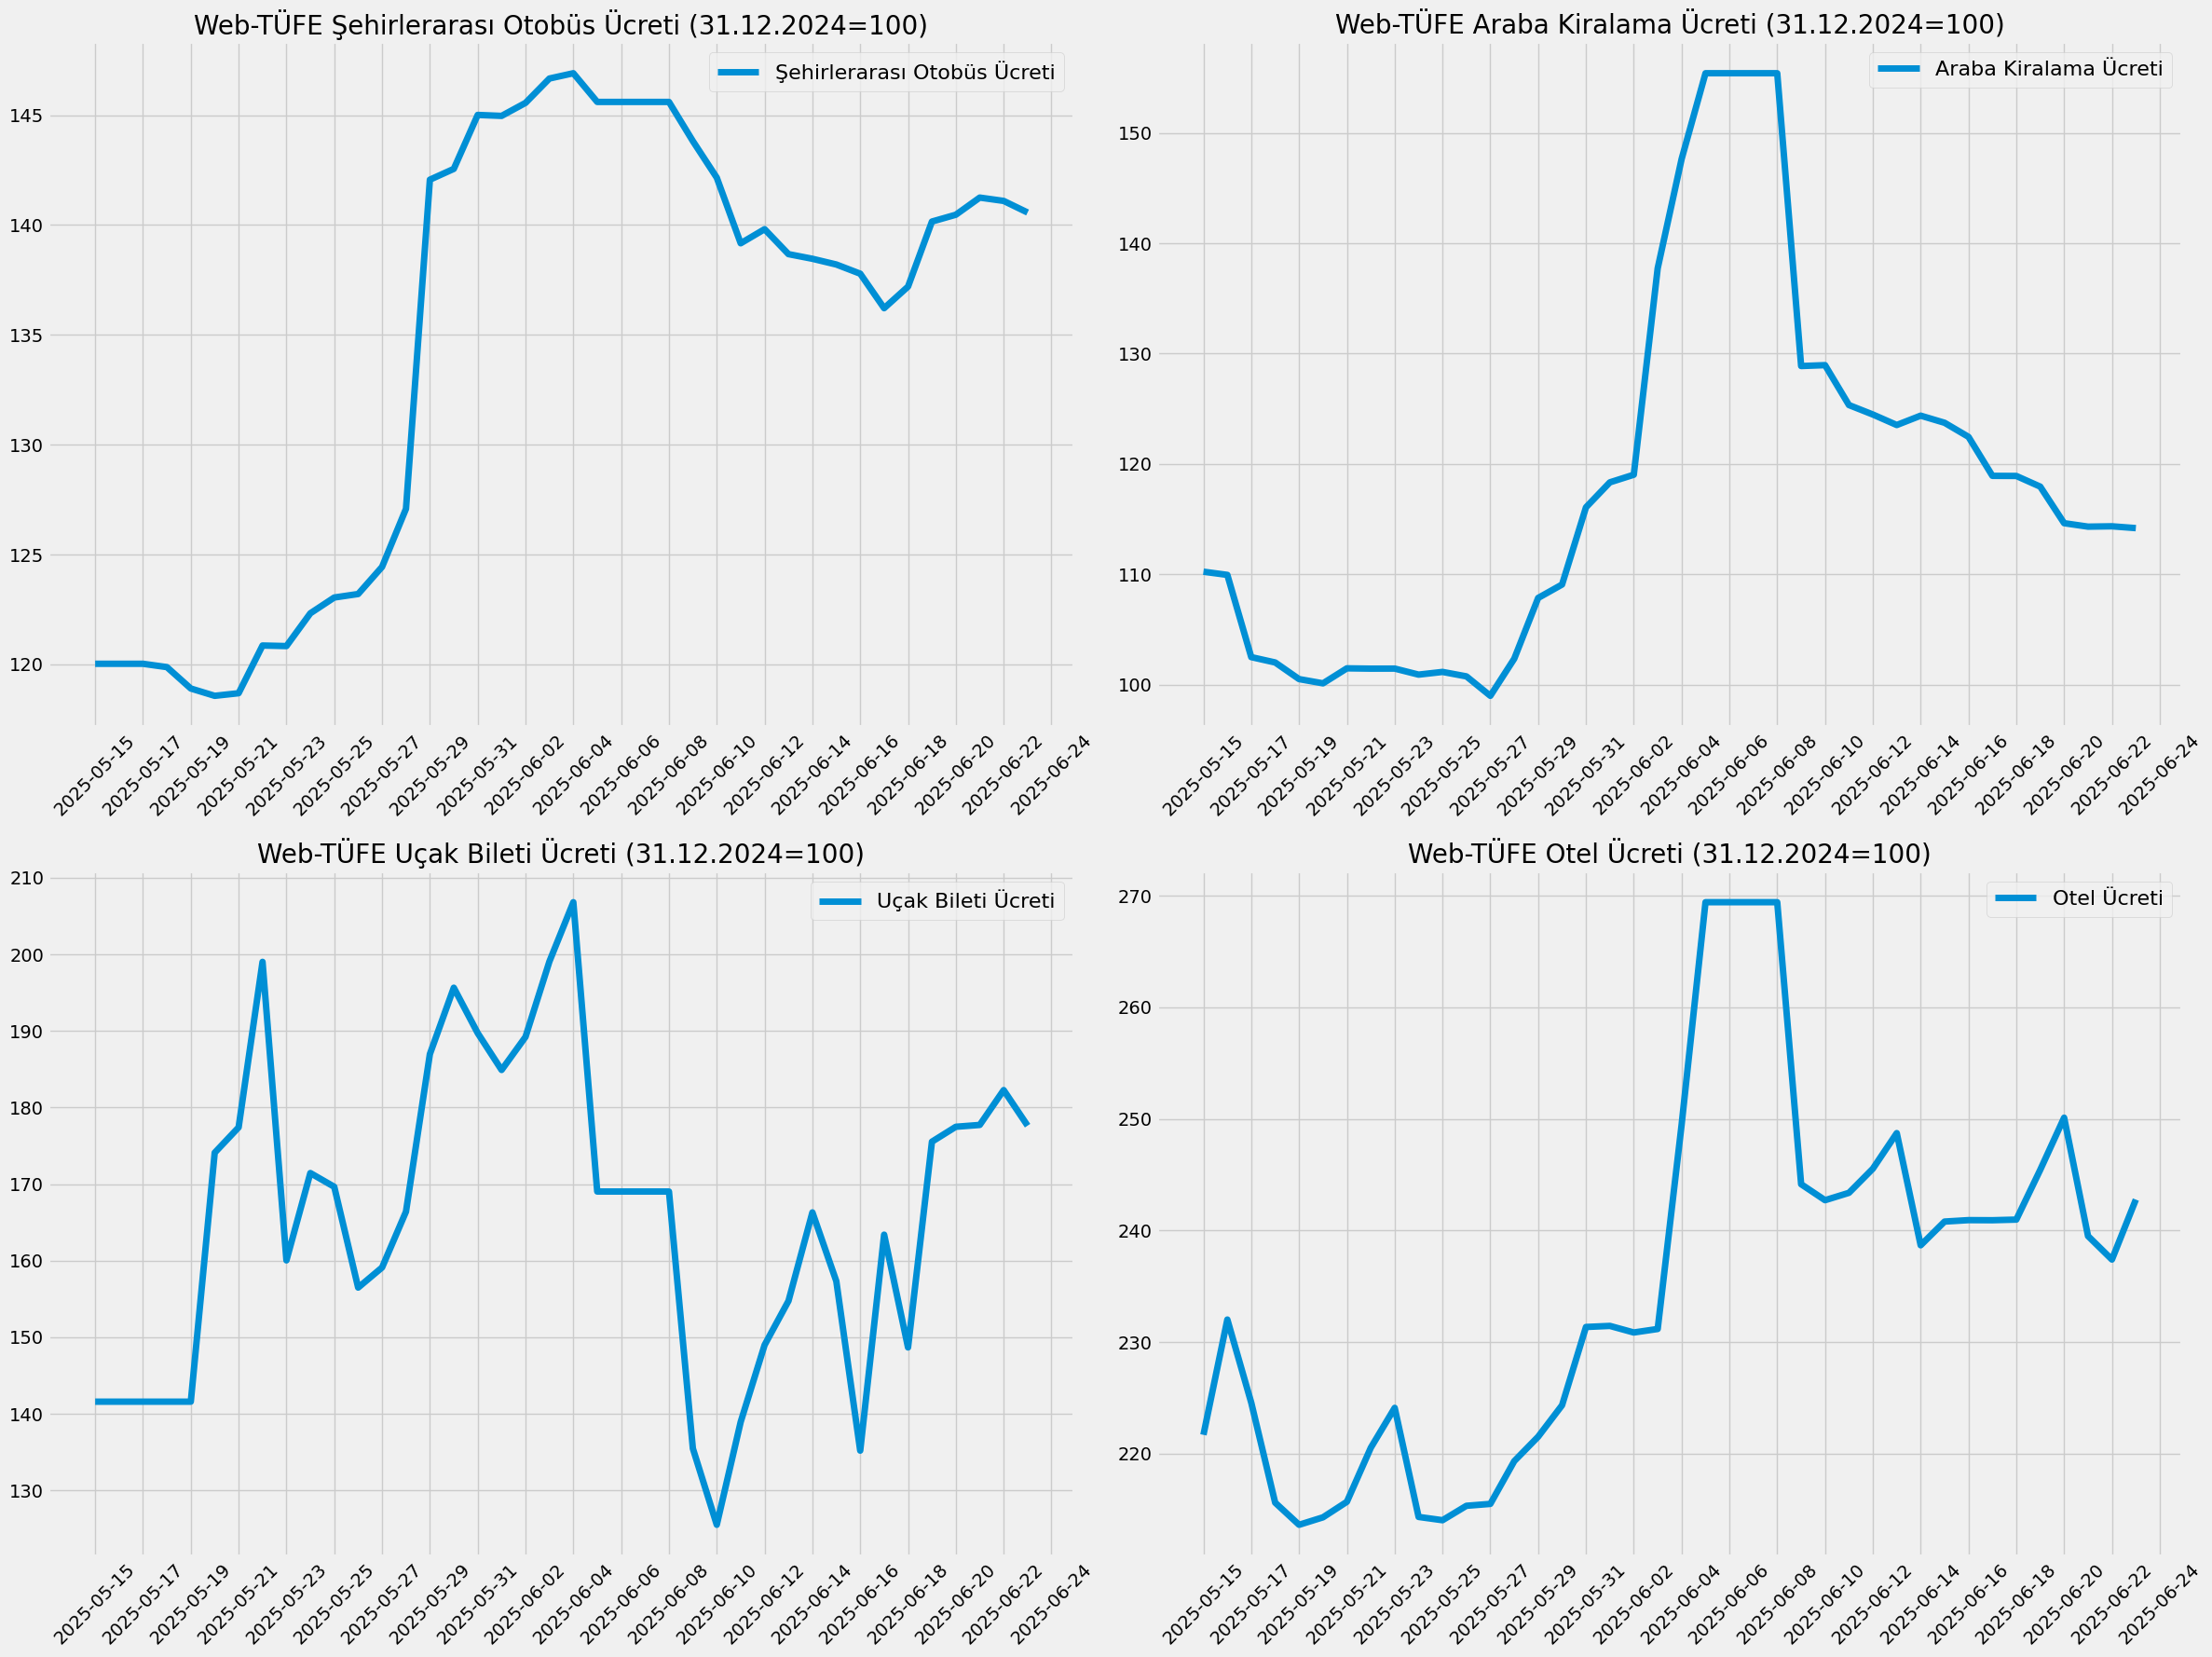

In [10]:
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

plt.style.use("fivethirtyeight")

# Ã‡izilecek endeks isimleri
endeks_listesi = [
    "ÅžehirlerarasÄ± OtobÃ¼s Ãœcreti ",
    "Araba Kiralama Ãœcreti",
    "UÃ§ak Bileti Ãœcreti",
    "Otel Ãœcreti"  # 4. grafik iÃ§in bir Ã¶rnek daha ekledim
]

# Figure ve GridSpec tanÄ±mÄ±
fig = plt.figure(figsize=(24, 18))
gs = fig.add_gridspec(2, 2)

# 2x2 gridde 4 subplot
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

axs = [ax1, ax2, ax3, ax4]
date_format = mdates.DateFormatter('%Y-%m-%d')

for i, endeks_adi in enumerate(endeks_listesi):
    ax = axs[i]
    ax.set_title(f"Web-TÃœFE {endeks_adi.strip()} (31.12.2024=100)", fontsize=20)

    # Endeksi Ã§iz
    data = endeksler[endeks_adi].loc["2025-05-15":]
    ax.plot(data.index, data.values, label=endeks_adi.strip(), linewidth=5)

    # Legend ve eksen ayarlarÄ±
    ax.legend(fontsize=16)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    ax.xaxis.set_major_formatter(date_format)
    ax.tick_params(axis='x', labelrotation=45, labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()


In [11]:
endeksler.iloc[-1].sort_values().tail(20)

Kavun                                                        141.757663
ÃœzÃ¼m                                                         141.757663
Battaniye                                                    142.848816
AraÃ§larÄ±n  Tamirine ve BakÄ±mÄ±na Ã–denen Ãœcretler (Ä°ÅŸÃ§ilik)    143.861162
Ã‡orbalar                                                     144.049817
HalÄ± Temizleme                                               144.163357
Su FaturasÄ±                                                  144.485582
Uzman Doktor Muayene Ãœcreti                                  145.620000
Yer ve Duvar DÃ¶ÅŸemesi                                        146.409832
Åžemsiye                                                      146.539223
HalÄ±                                                         148.007086
Portakal                                                     150.206408
Elma                                                         150.865888
Pideler                                      

(array([ 98., 100., 102., 104., 106., 108., 110., 112., 114., 116.]),
 [Text(0, 98.0, '98'),
  Text(0, 100.0, '100'),
  Text(0, 102.0, '102'),
  Text(0, 104.0, '104'),
  Text(0, 106.0, '106'),
  Text(0, 108.0, '108'),
  Text(0, 110.0, '110'),
  Text(0, 112.0, '112'),
  Text(0, 114.0, '114'),
  Text(0, 116.0, '116')])

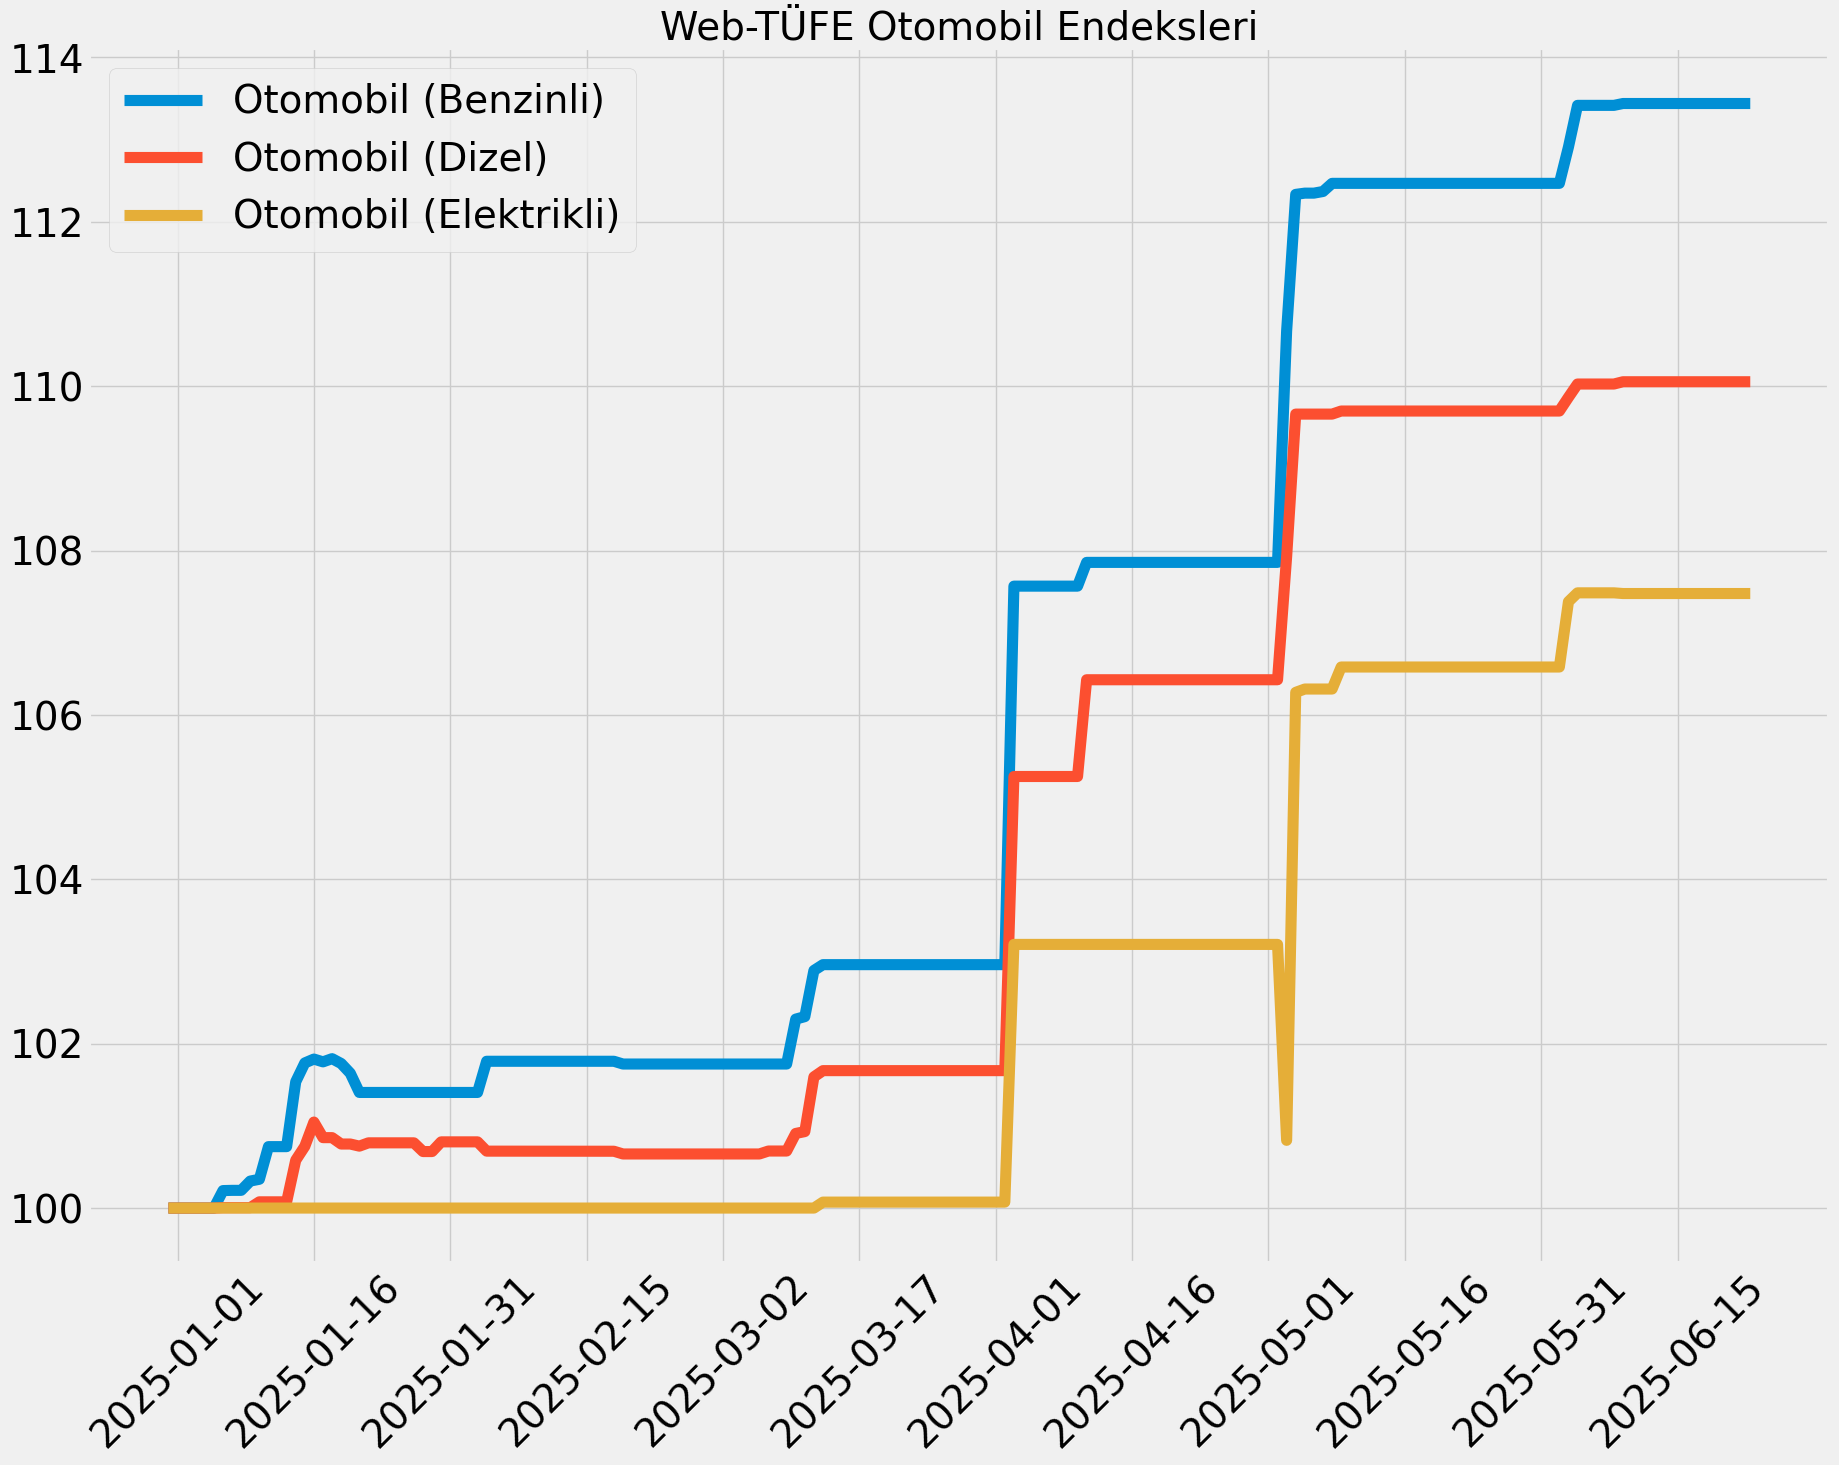

In [14]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20,15))
plt.title("Web-TÃœFE Otomobil Endeksleri",fontsize=28)
plt.plot(endeksler["Otomobil (Benzinli)"],label="Otomobil (Benzinli)",linewidth=8)
plt.plot(endeksler["Otomobil (Dizel)"],label="Otomobil (Dizel)",linewidth=8)
plt.plot(endeksler["Otomobil (Elektrikli)"],label="Otomobil (Elektrikli)",linewidth=8)

plt.legend(fontsize=28)
plt.xticks(Ã¶zelgÃ¶stergeler.index[::15],rotation=45,fontsize=28)
plt.yticks(fontsize=28)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
aylÄ±k=pd.read_csv("C:/Users/Bora/Documents/GitHub/web-tufe-flask/harcama_gruplarÄ±aylÄ±k.csv",index_col=0)
import matplotlib.pyplot as plt
import numpy as np

# AylÄ±k veri Ã¶rneÄŸi (Series gibi olduÄŸunu varsayÄ±yorum)
# Ã–rnek: aylÄ±k["2025-05-31"] bir Series olsun
veri = aylÄ±k["2025-05-31"].dropna()  # NaN'leri Ã§Ä±kar

# Aylar ve grafik Ã¶zellikleri
aylar = ["2025-03-31", "2025-04-30", "2025-05-31"]
renkler = ["#EF476F", "#118AB2", "#06D6A0"]
label_adlari = ["Mart 2025", "Nisan 2025", "MayÄ±s 2025"]

plt.figure(figsize=(10, 6))

for ay, renk, etiket in zip(aylar, renkler, label_adlari):
    veri = aylÄ±k[ay].dropna()
    mean = np.mean(veri)
    std = np.std(veri)

    x = np.linspace(mean - 4*std, mean + 4*std, 200)
    y = norm.pdf(x, mean, std)

    plt.plot(x, y, label=etiket, linewidth=2, color=renk)

plt.xlabel("DeÄŸer")
plt.ylabel("OlasÄ±lÄ±k YoÄŸunluÄŸu")
plt.title("AylÄ±k Veriler iÃ§in Normal DaÄŸÄ±lÄ±m EÄŸrileri")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


(array([ 90., 100., 110., 120., 130., 140., 150.]),
 [Text(0, 90.0, '90'),
  Text(0, 100.0, '100'),
  Text(0, 110.0, '110'),
  Text(0, 120.0, '120'),
  Text(0, 130.0, '130'),
  Text(0, 140.0, '140'),
  Text(0, 150.0, '150')])

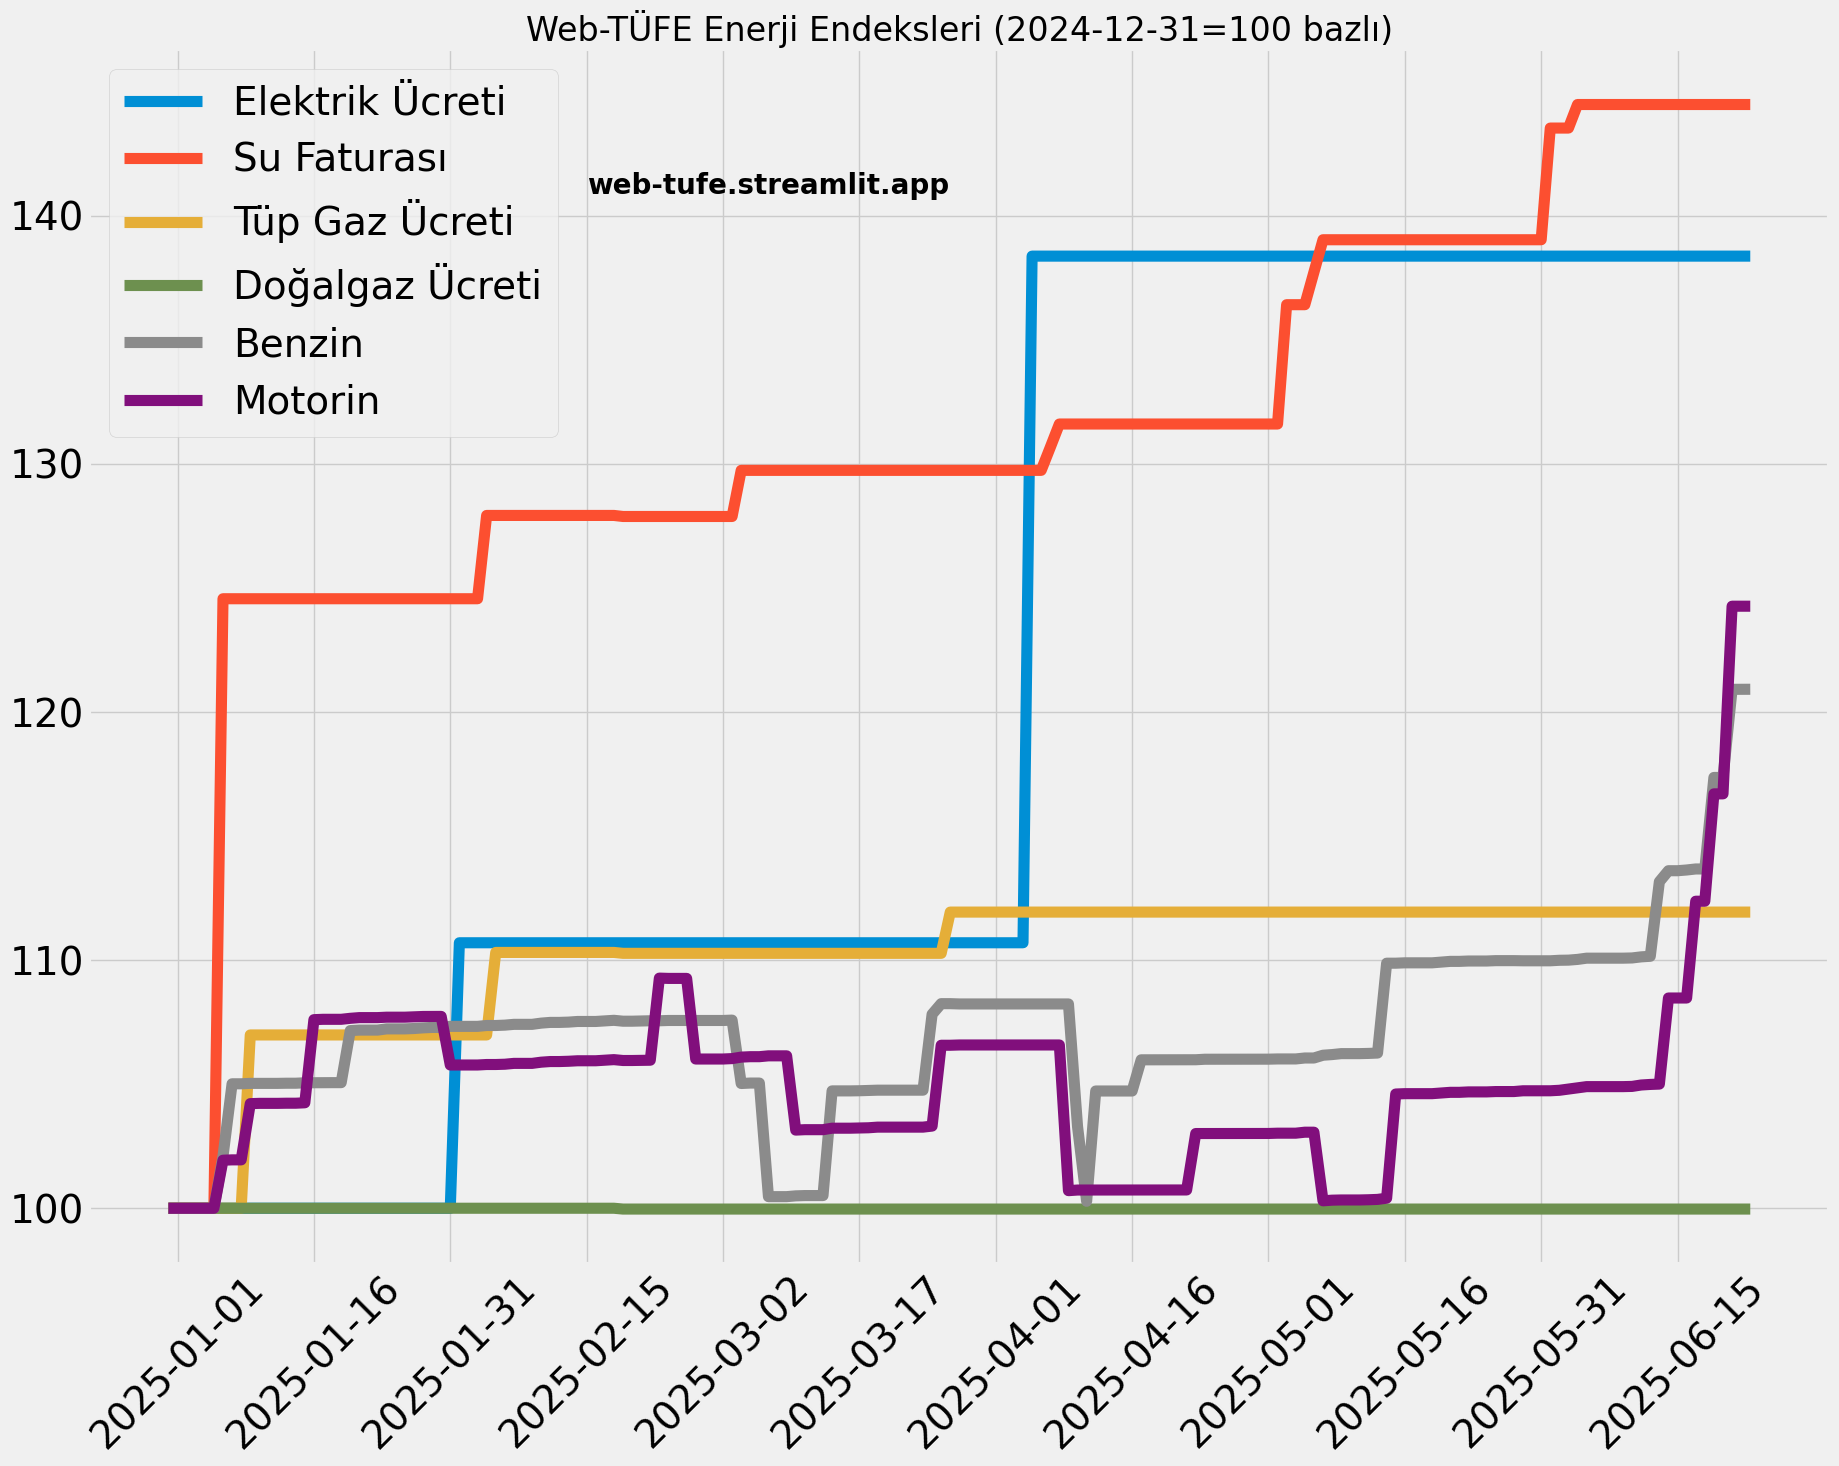

In [15]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20,15))
plt.title("Web-TÃœFE Enerji Endeksleri (2024-12-31=100 bazlÄ±)",fontsize=24)
plt.text(x=pd.to_datetime("2025-02-15"),y=140.9,s="web-tufe.streamlit.app",fontdict={"size":20,"weight":"bold"})
plt.plot(endeksler["Elektrik Ãœcreti"],label="Elektrik Ãœcreti",linewidth=8)
plt.plot(endeksler["Su FaturasÄ±"],label="Su FaturasÄ±",linewidth=8)
plt.plot(endeksler["TÃ¼p Gaz Ãœcreti"],label="TÃ¼p Gaz Ãœcreti",linewidth=8)
plt.plot(endeksler["DoÄŸalgaz Ãœcreti"],label="DoÄŸalgaz Ãœcreti",linewidth=8)
plt.plot(endeksler["Benzin"],label="Benzin",linewidth=8)
plt.plot(endeksler["Motorin"],label="Motorin",linewidth=8)
plt.legend(fontsize=28)
plt.xticks(Ã¶zelgÃ¶stergeler.index[::15],rotation=45,fontsize=28)
plt.yticks(fontsize=28)

(array([ 98., 100., 102., 104., 106., 108., 110., 112., 114., 116.]),
 [Text(0, 98.0, '98'),
  Text(0, 100.0, '100'),
  Text(0, 102.0, '102'),
  Text(0, 104.0, '104'),
  Text(0, 106.0, '106'),
  Text(0, 108.0, '108'),
  Text(0, 110.0, '110'),
  Text(0, 112.0, '112'),
  Text(0, 114.0, '114'),
  Text(0, 116.0, '116')])

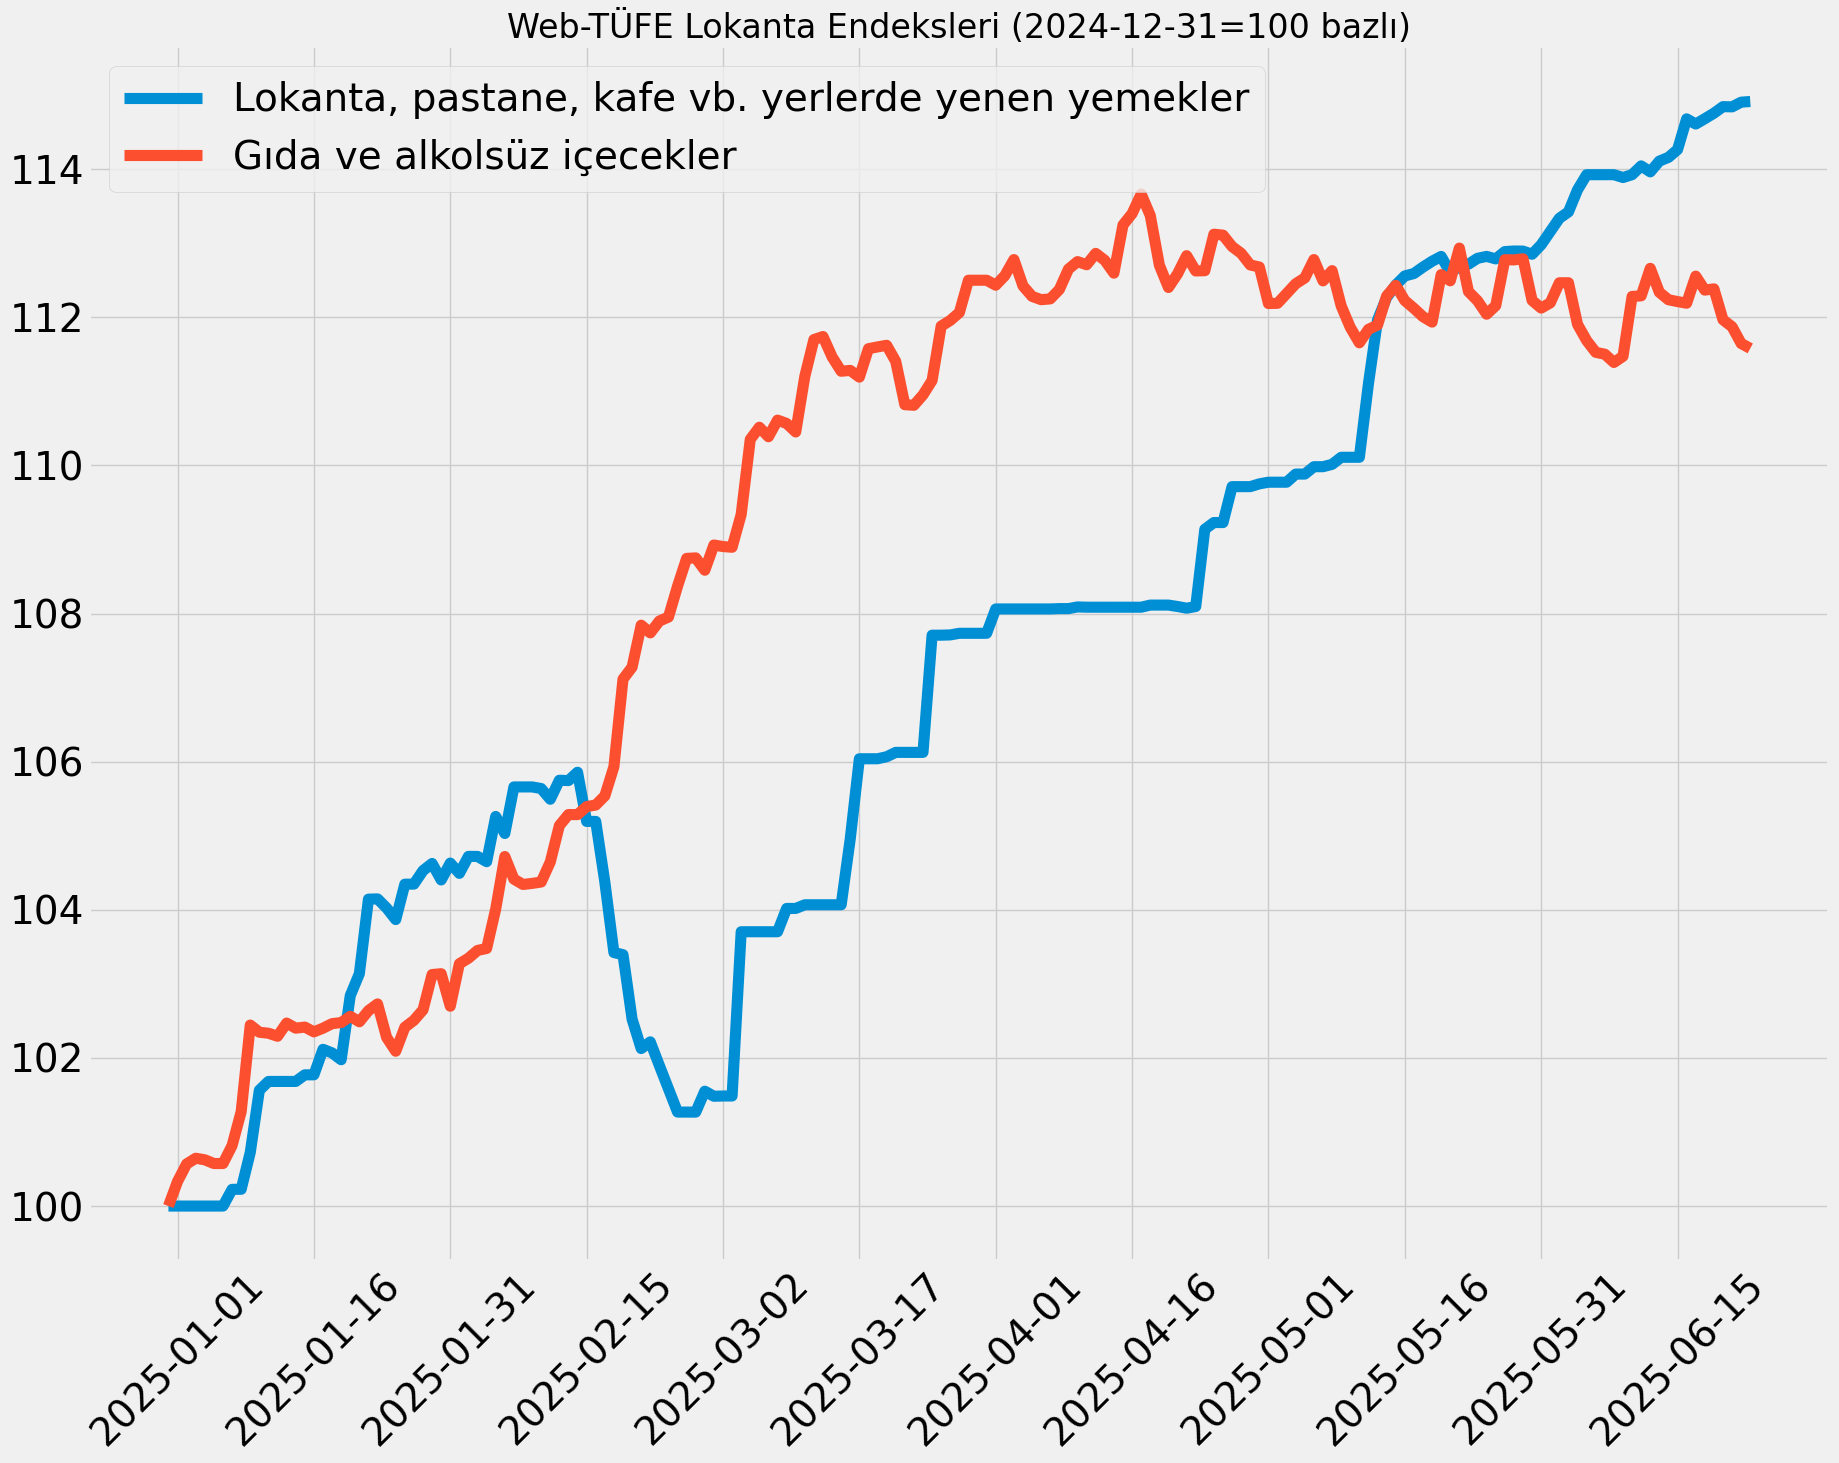

In [16]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20,15))
plt.title("Web-TÃœFE Lokanta Endeksleri (2024-12-31=100 bazlÄ±)",fontsize=24)
plt.plot(harcama_gruplarÄ±["Lokanta, pastane, kafe vb. yerlerde yenen yemekler"],label="Lokanta, pastane, kafe vb. yerlerde yenen yemekler",linewidth=8)
plt.plot(gruplar["GÄ±da ve alkolsÃ¼z iÃ§ecekler"],label="GÄ±da ve alkolsÃ¼z iÃ§ecekler",linewidth=8)


plt.legend(fontsize=28)
plt.xticks(Ã¶zelgÃ¶stergeler.index[::15],rotation=45,fontsize=28)
plt.yticks(fontsize=28)

(array([ 90., 100., 110., 120., 130., 140., 150., 160., 170.]),
 [Text(0, 90.0, '90'),
  Text(0, 100.0, '100'),
  Text(0, 110.0, '110'),
  Text(0, 120.0, '120'),
  Text(0, 130.0, '130'),
  Text(0, 140.0, '140'),
  Text(0, 150.0, '150'),
  Text(0, 160.0, '160'),
  Text(0, 170.0, '170')])

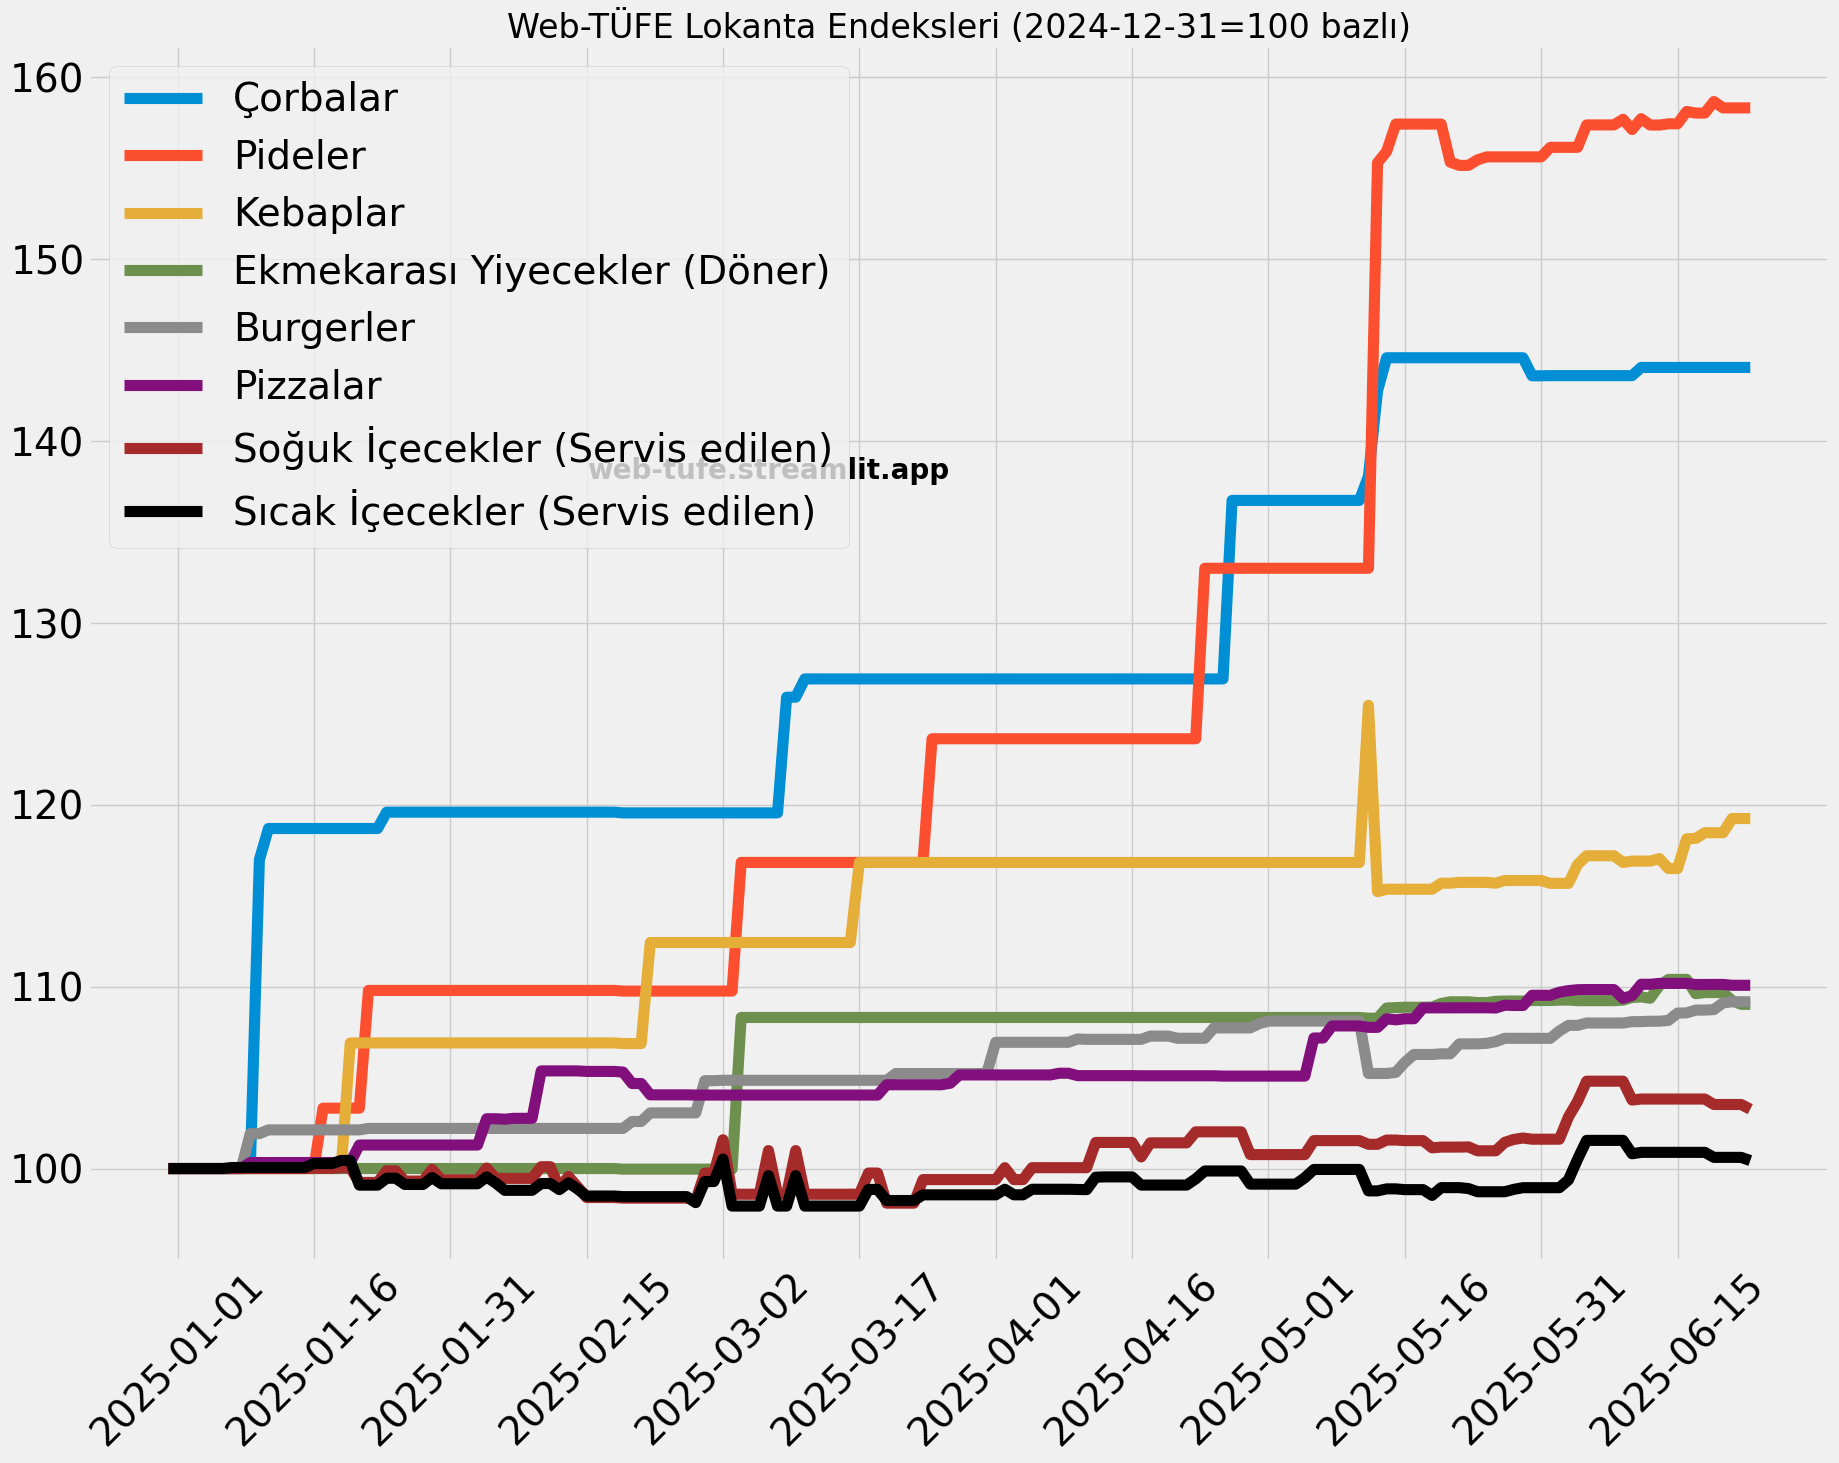

In [17]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20,15))
plt.title("Web-TÃœFE Lokanta Endeksleri (2024-12-31=100 bazlÄ±)",fontsize=24)
plt.text(x=pd.to_datetime("2025-02-15"),y=137.9,s="web-tufe.streamlit.app",fontdict={"size":20,"weight":"bold"})
plt.plot(endeksler["Ã‡orbalar"],label="Ã‡orbalar",linewidth=8)
plt.plot(endeksler["Pideler"],label="Pideler",linewidth=8)
plt.plot(endeksler["Kebaplar"],label="Kebaplar",linewidth=8)
plt.plot(endeksler["EkmekarasÄ± Yiyecekler (DÃ¶ner)"],label="EkmekarasÄ± Yiyecekler (DÃ¶ner)",linewidth=8)
plt.plot(endeksler["Burgerler"],label="Burgerler",linewidth=8)

plt.plot(endeksler["Pizzalar"],label="Pizzalar",linewidth=8)


plt.plot(endeksler["SoÄŸuk Ä°Ã§ecekler (Servis edilen)"],label="SoÄŸuk Ä°Ã§ecekler (Servis edilen)",linewidth=8,color="brown")
plt.plot(endeksler["SÄ±cak Ä°Ã§ecekler (Servis edilen)"],label="SÄ±cak Ä°Ã§ecekler (Servis edilen)",linewidth=8,color="black")

plt.legend(fontsize=28)
plt.xticks(Ã¶zelgÃ¶stergeler.index[::15],rotation=45,fontsize=28)
plt.yticks(fontsize=28)

(array([ 60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160'),
  Text(0, 180.0, '180')])

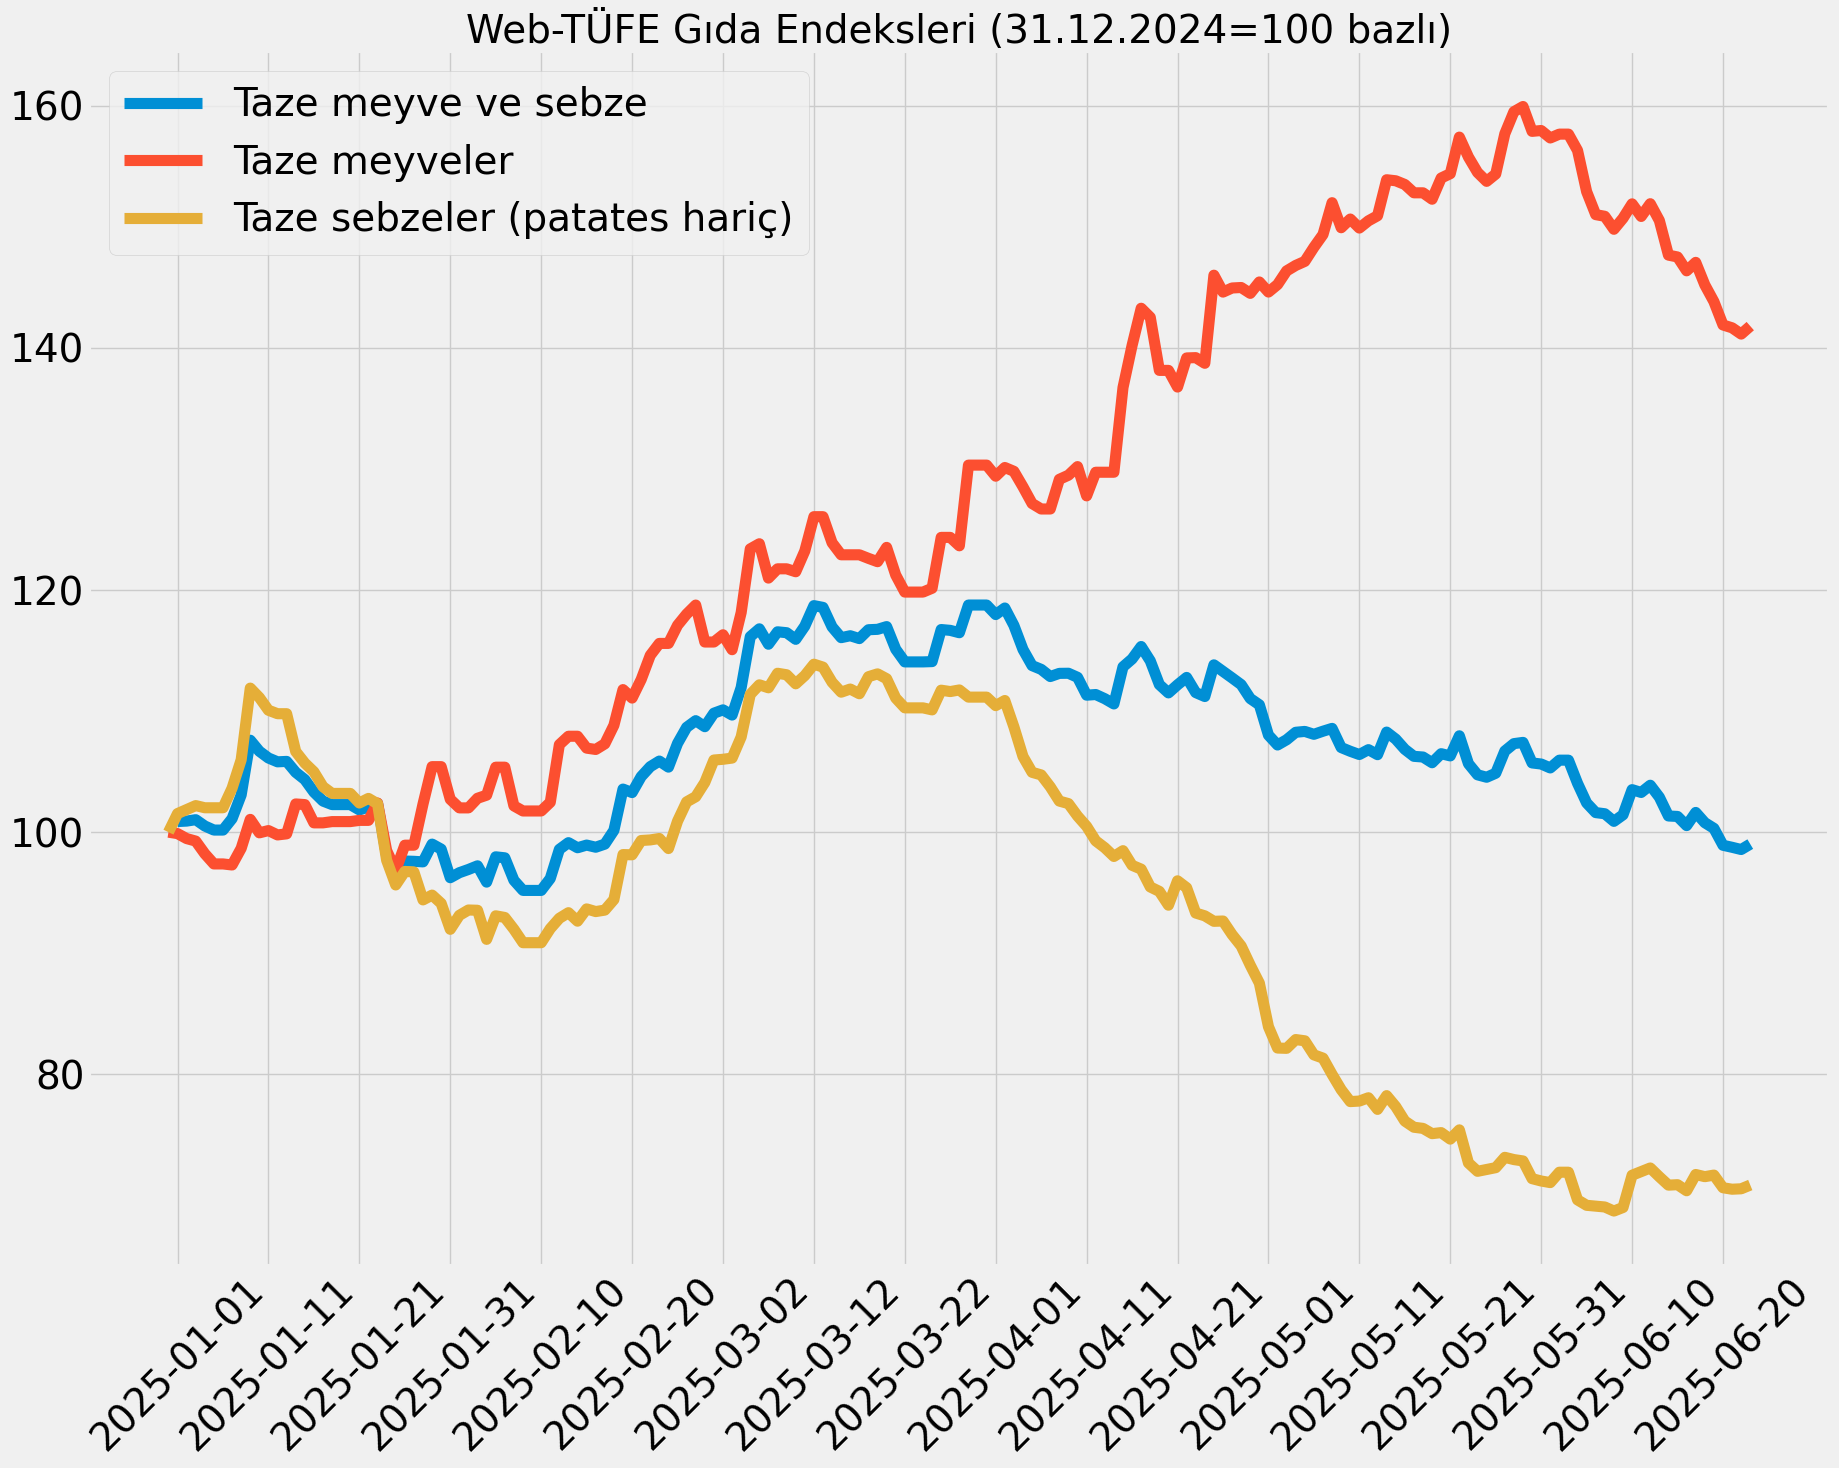

In [18]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20,15))
plt.title("Web-TÃœFE GÄ±da Endeksleri (31.12.2024=100 bazlÄ±)",fontsize=28)
plt.plot(Ã¶zelgÃ¶stergeler["Taze meyve ve sebze"],label="Taze meyve ve sebze",linewidth=8)
plt.plot(harcama_gruplarÄ±["Taze meyveler"],label="Taze meyveler",linewidth=8)
plt.plot(harcama_gruplarÄ±["Taze sebzeler (patates hariÃ§)"],label="Taze sebzeler (patates hariÃ§)",linewidth=8)

plt.legend(fontsize=28)
plt.xticks(Ã¶zelgÃ¶stergeler.index[::10],rotation=45,fontsize=28)
plt.yticks(fontsize=28)

In [ ]:
"""import requests
import pandas as pd
import time
import json

# Åžehirlerin koordinatlarÄ±nÄ± JSON dosyasÄ±ndan al
with open("cities_of_turkey.json", "r", encoding="utf-8") as f:
    cities_data = json.load(f)

cities = {city["name"]: (city["latitude"], city["longitude"]) for city in cities_data}

def get_historical_weather(lat, lon, start_date, end_date, retries=3, delay=30):
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": start_date,
        "end_date": end_date,
        "daily": "temperature_2m_min",
        "timezone": "Europe/Istanbul"
    }

    for attempt in range(retries):
        try:
            response = requests.get(url, params=params, timeout=30)
            response.raise_for_status()
            data = response.json()
            return pd.DataFrame({
                "date": data["daily"]["time"],
                "mean_temp": data["daily"]["temperature_2m_min"]
            })
        except requests.exceptions.RequestException as e:
            print(f"[{lat}, {lon}] Hata: {e}, tekrar deneniyor... ({attempt+1}/{retries})")
            time.sleep(delay)
    print(f"[{lat}, {lon}] TÃ¼m denemeler baÅŸarÄ±sÄ±z oldu.")
    return None

def get_turkey_average_temperature(cities, start_date, end_date):
    all_temps = []
    for name, (lat, lon) in cities.items():
        df = get_historical_weather(lat, lon, start_date, end_date)
        if df is not None:
            df = df.rename(columns={"mean_temp": name})
            all_temps.append(df.set_index("date"))
        else:
            print(f"{name} iÃ§in veri alÄ±namadÄ±.")

    all_data = pd.concat(all_temps, axis=1)
    all_data.index = pd.to_datetime(all_data.index)
    all_data["Turkey_Avg_Temp"] = all_data.mean(axis=1)
    return all_data.reset_index()

# Tarih aralÄ±ÄŸÄ±nÄ± belirle
start_date = "2025-01-01"
end_date = "2025-04-15"

# Ortalama sÄ±caklÄ±ÄŸÄ± al
df_avg = get_turkey_average_temperature(cities, start_date, end_date)

# SonuÃ§larÄ± kontrol et
print(df_avg.head())
"""

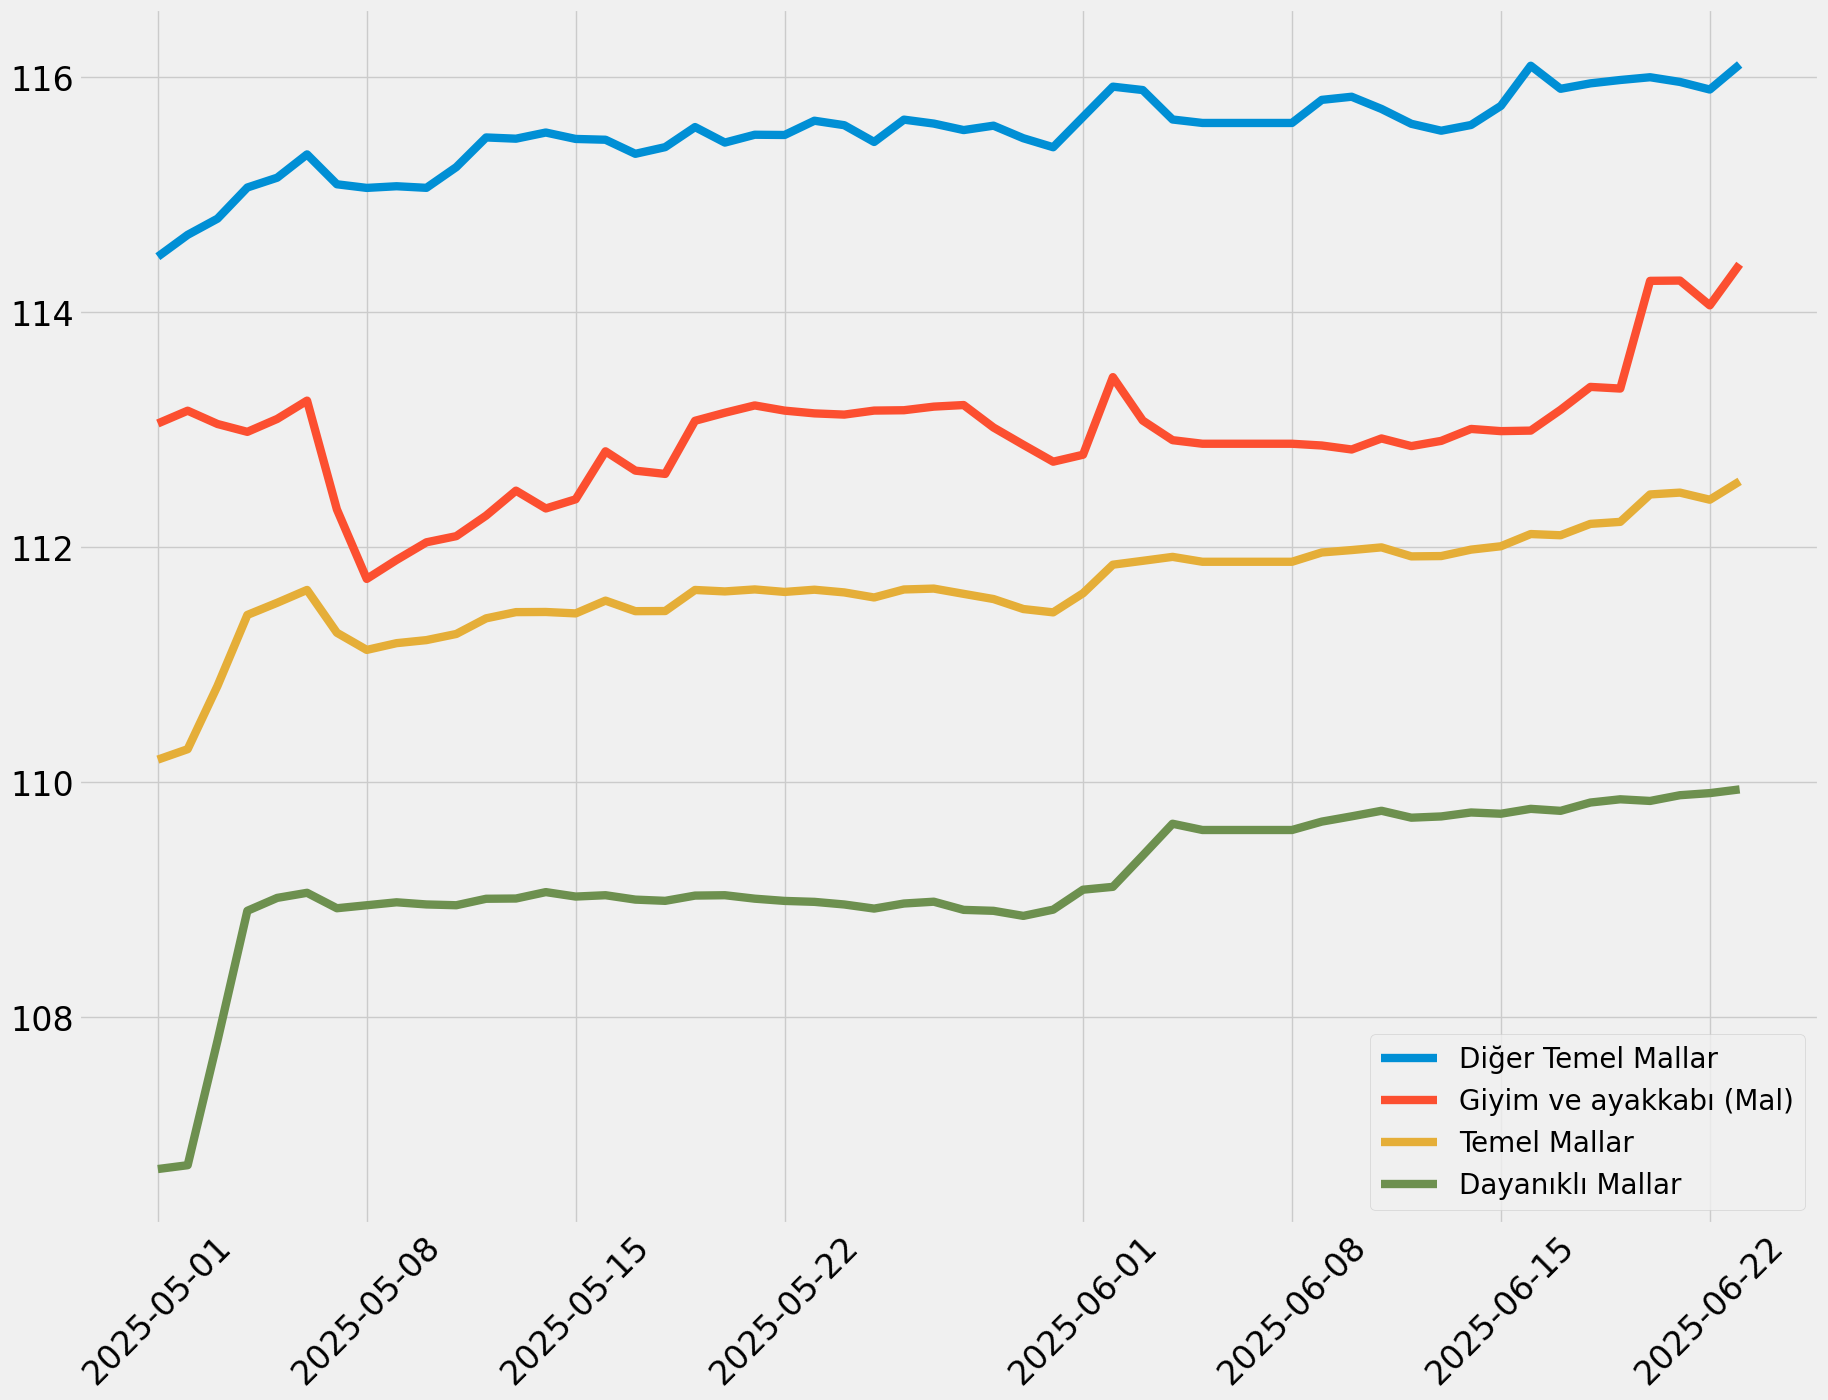

In [19]:

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20,15))
plt.plot(Ã¶zelgÃ¶stergeler["DiÄŸer Temel Mallar"].loc["2025-05":],label="DiÄŸer Temel Mallar",linewidth=6)
plt.plot(Ã¶zelgÃ¶stergeler["Giyim ve ayakkabÄ±"].loc["2025-05":],label="Giyim ve ayakkabÄ± (Mal)",linewidth=6)

plt.plot(Ã¶zelgÃ¶stergeler["Temel mallar"].loc["2025-05":],label="Temel Mallar",linewidth=6)
plt.plot(Ã¶zelgÃ¶stergeler["DayanÄ±klÄ± Mallar (altÄ±n hariÃ§)"].loc["2025-05":],label="DayanÄ±klÄ± Mallar",linewidth=6)

plt.xticks(fontsize=24,rotation=45)
plt.yticks(fontsize=24)

plt.legend(fontsize=20)

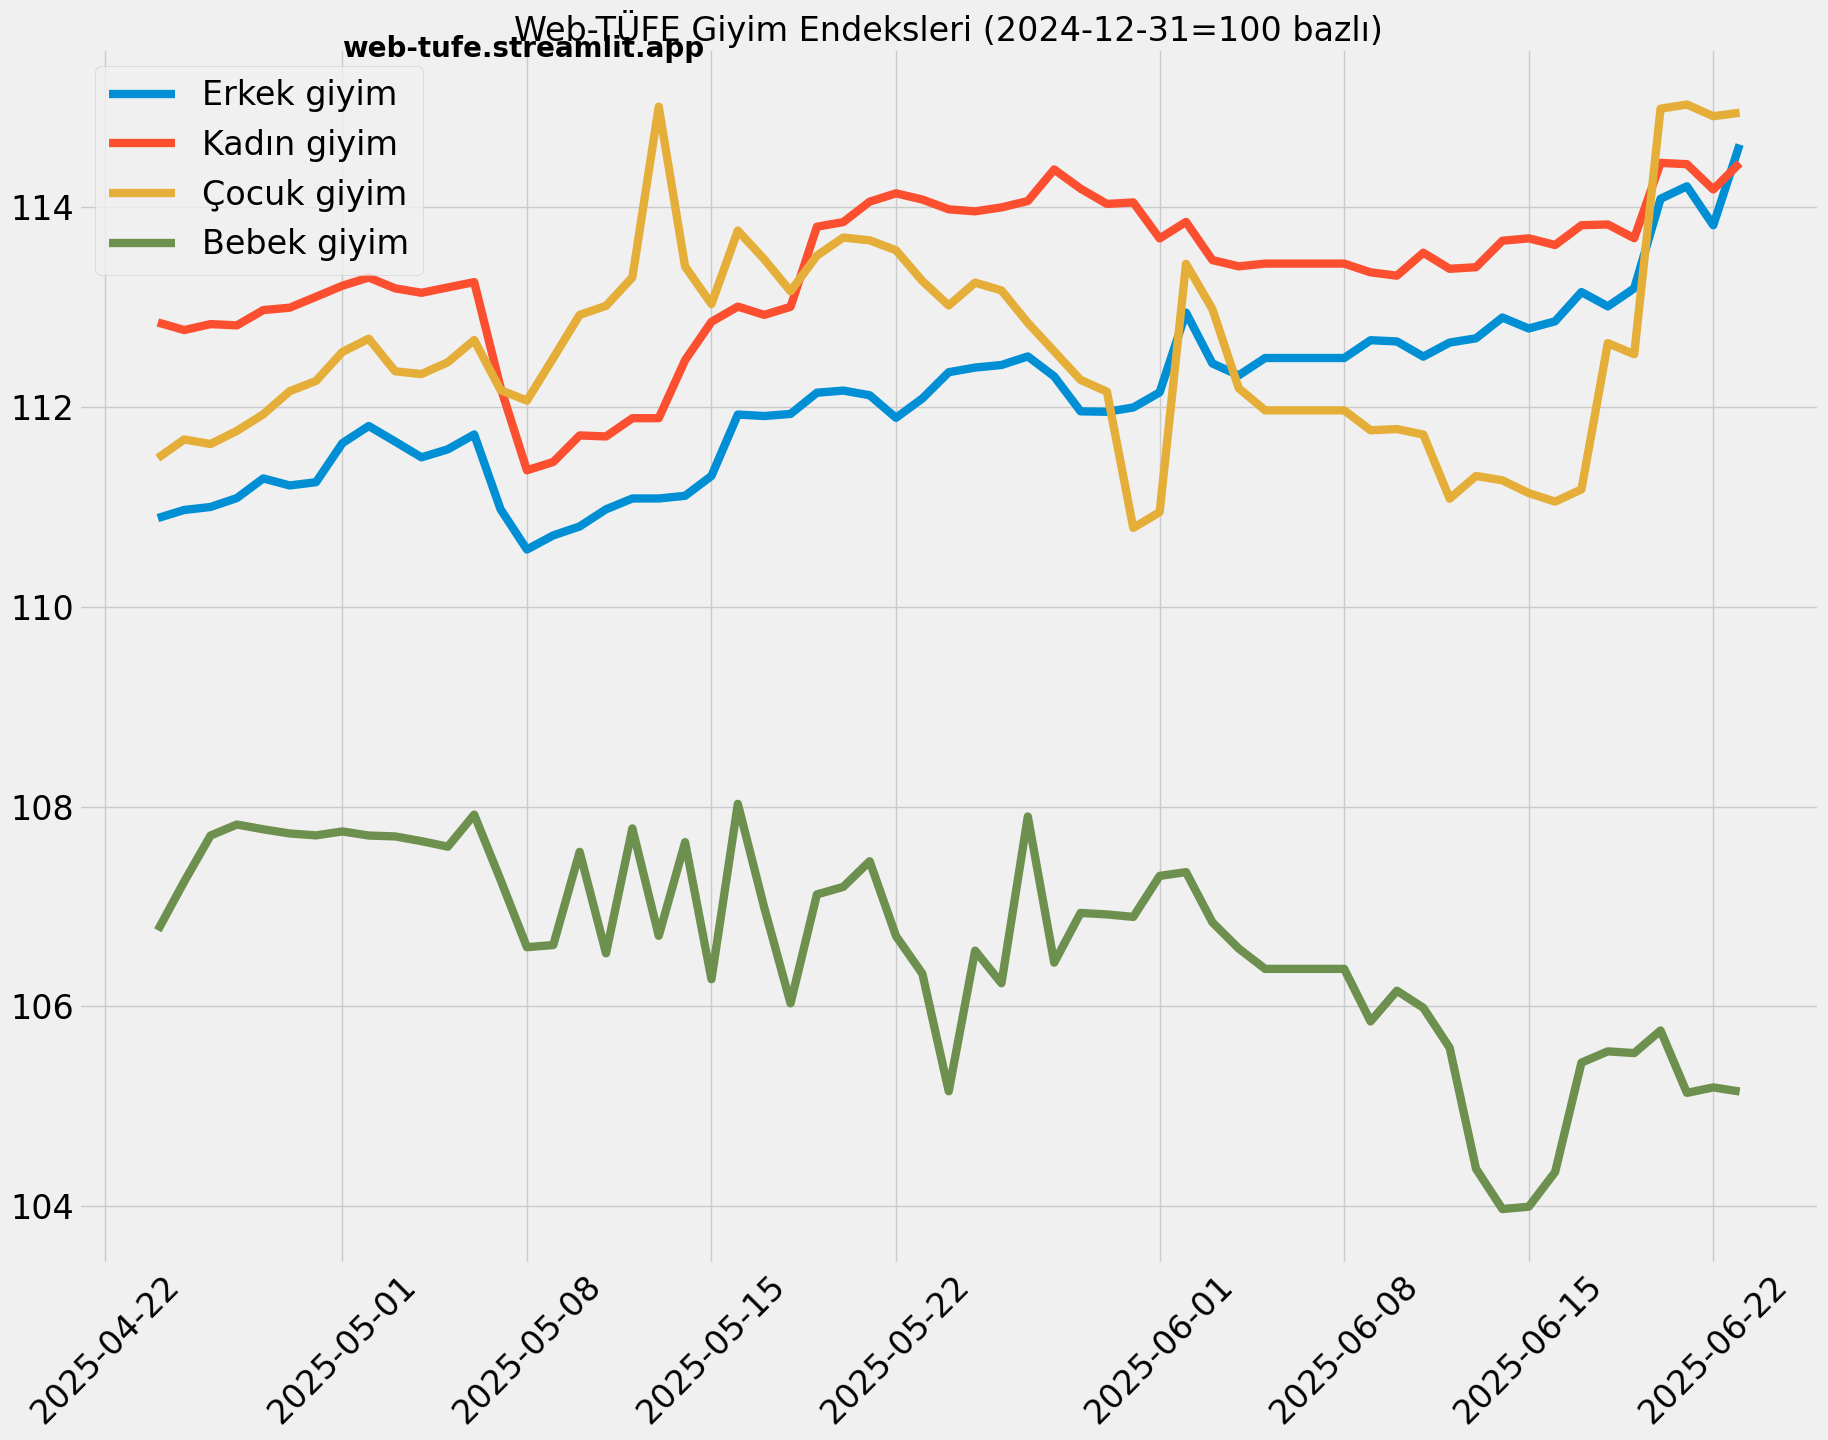

In [20]:

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

plt.figure(figsize=(20,15))
plt.title("Web-TÃœFE Giyim Endeksleri (2024-12-31=100 bazlÄ±)",fontsize=24)
plt.text(x=pd.to_datetime("2025-05-01"),y=115.5,s="web-tufe.streamlit.app",fontdict={"size":20,"weight":"bold"})
plt.plot(harcama_gruplarÄ±["Erkek giyim"].loc["2025-04-24":],label="Erkek giyim",linewidth=6)
plt.plot(harcama_gruplarÄ±["KadÄ±n giyim"].loc["2025-04-24":],label="KadÄ±n giyim",linewidth=6)
plt.plot(harcama_gruplarÄ±["Ã‡ocuk giyim"].loc["2025-04-24":],label="Ã‡ocuk giyim",linewidth=6)

plt.plot(harcama_gruplarÄ±["Bebek giyim"].loc["2025-04-24":],label="Bebek giyim",linewidth=6)


"""plt.axvline(x=Ã¶zelgÃ¶stergeler.index[78],linestyle="--",color="black")
plt.text(Ã¶zelgÃ¶stergeler.index[83], 111, "19 Mart Kur artÄ±ÅŸÄ±", 
         horizontalalignment='center', verticalalignment='top', 
         fontsize=20, color="black", fontweight="bold")"""
plt.xticks(fontsize=24,rotation=45)
plt.yticks(fontsize=24)

plt.legend(fontsize=24)

In [21]:
aÄŸÄ±rlÄ±klar1=pd.read_csv("aÄŸÄ±rlÄ±klartÃ¼fe.csv",index_col=0)
ana_aÄŸÄ±rlÄ±k=aÄŸÄ±rlÄ±klar1.groupby("Ana Grup")["AÄŸÄ±rlÄ±k"].sum()
ana_aÄŸÄ±rlÄ±k=pd.DataFrame(ana_aÄŸÄ±rlÄ±k)
ana_aÄŸÄ±rlÄ±k["AÄŸÄ±rlÄ±k"]=ana_aÄŸÄ±rlÄ±k["AÄŸÄ±rlÄ±k"]/ana_aÄŸÄ±rlÄ±k["AÄŸÄ±rlÄ±k"].sum()
ana_aÄŸÄ±rlÄ±k

AÄŸÄ±rlÄ±k
Ana Grup                            
AlkollÃ¼ iÃ§ecekler ve tÃ¼tÃ¼n  0.039770
Ev eÅŸyasÄ±                   0.081589
EÄŸitim                      0.022641
EÄŸlence ve kÃ¼ltÃ¼r           0.020511
Giyim ve ayakkabÄ±           0.079920
GÄ±da ve alkolsÃ¼z iÃ§ecekler  0.281840
HaberleÅŸme                  0.038924
Konut                       0.160474
Lokanta ve oteller          0.087696
SaÄŸlÄ±k                      0.015334
UlaÅŸtÄ±rma                   0.134288
Ã‡eÅŸitli mal ve hizmetler    0.037013

In [22]:
katkÄ±lar=pd.DataFrame(columns=ana_aÄŸÄ±rlÄ±k.index.values)
for grup in gruplar.drop("TÃœFE",axis=1).columns:
    aÄŸÄ±rlÄ±klÄ±=hareketli_aylik_ortalama((gruplar[grup]*ana_aÄŸÄ±rlÄ±k["AÄŸÄ±rlÄ±k"].loc[grup]))["AylÄ±k Ortalama"].fillna(method="ffill").resample("M").last().iloc[1:].diff().dropna()
    aÄŸÄ±rlÄ±klÄ±.loc["2025-06"]=gruplar[grup].loc["2025-06"].mean()*ana_aÄŸÄ±rlÄ±k["AÄŸÄ±rlÄ±k"].loc[grup]-gruplar[grup].loc["2025-05":"2025-05-22"].mean()*ana_aÄŸÄ±rlÄ±k["AÄŸÄ±rlÄ±k"].loc[grup]
    katkÄ±=100*aÄŸÄ±rlÄ±klÄ±/hareketli_aylik_ortalama(tÃ¼fe["TÃœFE"])["AylÄ±k Ortalama"].fillna(method="ffill").resample("M").last().shift(1).dropna()[1:]
    katkÄ±lar[grup]=katkÄ±
    

In [23]:
katkÄ±_paylarÄ±=katkÄ±lar.copy()
katkÄ±_paylarÄ±["TOPLAM"] = katkÄ±_paylarÄ±.sum(axis=1)

katkÄ±_paylarÄ±.diff().round(2).iloc[-1].sort_values()

Ev eÅŸyasÄ±                    -0.09
TOPLAM                       -0.08
Lokanta ve oteller           -0.07
Konut                        -0.06
EÄŸlence ve kÃ¼ltÃ¼r            -0.03
AlkollÃ¼ iÃ§ecekler ve tÃ¼tÃ¼n    0.00
EÄŸitim                        0.00
HaberleÅŸme                   -0.00
SaÄŸlÄ±k                       -0.00
Ã‡eÅŸitli mal ve hizmetler      0.01
Giyim ve ayakkabÄ±             0.04
GÄ±da ve alkolsÃ¼z iÃ§ecekler    0.06
UlaÅŸtÄ±rma                     0.07
Name: 2025-06-30 00:00:00, dtype: float64

In [ ]:
import pandas as pd

# Gruplar TÃœFE hariÃ§
alt_gruplar = gruplar.drop(columns=["TÃœFE"])

# AÄŸÄ±rlÄ±klar
weights = ana_aÄŸÄ±rlÄ±k["AÄŸÄ±rlÄ±k"]

# 30 gÃ¼n Ã¶nceki TÃœFE
tufe_30_once = gruplar["TÃœFE"].shift(30)

# 30 gÃ¼nlÃ¼k deÄŸiÅŸim (her grup iÃ§in)
degisim_30_gun = (alt_gruplar - alt_gruplar.shift(30)) / tufe_30_once.values.reshape(-1,1) * 100

# KatkÄ±lar (deÄŸiÅŸim Ã— aÄŸÄ±rlÄ±k)
katkÄ±_paylarÄ± = degisim_30_gun * weights.values

# SonuÃ§ olarak katkÄ±lar DataFrame'ini al, NaN satÄ±rlarÄ±nÄ± at
katkÄ±_paylarÄ± = katkÄ±_paylarÄ±.dropna()
katkÄ±_paylarÄ±["TOPLAM"] = katkÄ±_paylarÄ±.sum(axis=1)
katkÄ±_paylarÄ±


In [ ]:
import pandas as pd

# Gruplar TÃœFE hariÃ§
alt_gruplar = gruplar.drop(columns=["TÃœFE"])

# AÄŸÄ±rlÄ±klar
weights = ana_aÄŸÄ±rlÄ±k["AÄŸÄ±rlÄ±k"]

# 30 gÃ¼n Ã¶nceki TÃœFE
tufe_30_once = gruplar["TÃœFE"].shift(30)

# 30 gÃ¼nlÃ¼k deÄŸiÅŸim (her grup iÃ§in)
degisim_30_gun = (alt_gruplar - alt_gruplar.shift(30)) / tufe_30_once.values.reshape(-1,1) * 100

# KatkÄ±lar (deÄŸiÅŸim Ã— aÄŸÄ±rlÄ±k)
katkÄ±_paylarÄ± = degisim_30_gun * weights.values

# SonuÃ§ olarak katkÄ±lar DataFrame'ini al, NaN satÄ±rlarÄ±nÄ± at
katkÄ±_paylarÄ± = katkÄ±_paylarÄ±.dropna()
katkÄ±_paylarÄ±["TOPLAM"] = katkÄ±_paylarÄ±.sum(axis=1)



katkÄ±_paylarÄ±=katkÄ±_paylarÄ±.dropna()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter




# Kategoriler listesi (TÃœFE hariÃ§)
kategoriler = [col for col in gruplar.columns if col != "TÃœFE"]

# Renkler
renkler = plt.cm.tab10(np.linspace(0, 1, len(kategoriler)))


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
plt.style.use("fivethirtyeight")
# FigÃ¼r boyutunu belirle
plt.figure(figsize=(25, 15))
if len(gruplar.index[1:]) > 500:
    katkÄ±_paylarÄ±_aylÄ±k = katkÄ±_paylarÄ±.resample('M').mean()
    tarihler = katkÄ±_paylarÄ±_aylÄ±k.index
    katkÄ±_deÄŸerleri = katkÄ±_paylarÄ±_aylÄ±k
else:
    tarihler = katkÄ±_paylarÄ±.index
    katkÄ±_deÄŸerleri = katkÄ±_paylarÄ±

# Kategori renkleri
renk_haritalama = {
    "GÄ±da ve alkolsÃ¼z iÃ§ecekler": "#FF6B6B",
    "AlkollÃ¼ iÃ§ecekler ve tÃ¼tÃ¼n": "#4A90E2",
    "Giyim ve ayakkabÄ±": "#50E3C2",
    "Konut": "#F5A623",
    "Ev eÅŸyasÄ±": "#FFCE56",
    "SaÄŸlÄ±k": "#BA68C8",
    "UlaÅŸtÄ±rma": "#66BB6A",
    "HaberleÅŸme": "magenta",  # "black" yerine renkli yaptÄ±m, negatif deÄŸerler iÃ§in gÃ¶rÃ¼nÃ¼rlÃ¼ÄŸÃ¼ artÄ±rmak iÃ§in
    "EÄŸlence ve kÃ¼ltÃ¼r": "blue",
    "EÄŸitim": "#AB47BC",
    "Lokanta ve oteller": "#8D6E63",
    "Ã‡eÅŸitli mal ve hizmetler": "#78909C"
}

# Ã‡ubuklarÄ±n geniÅŸliÄŸi
width = 20 if len(tarihler) > 1000 else 0.8

# Kategori listesini pozitif ve negatif olarak ayÄ±r
# Her tarih noktasÄ± iÃ§in, her kategorinin deÄŸerini kontrol et
# (Bu ÅŸekilde, bir kategori bazÄ± tarihlerde pozitif, bazÄ±larÄ±nda negatif olabilir)
bottom_pos = np.zeros(len(tarihler))
bottom_neg = np.zeros(len(tarihler))

# Ã–nce tÃ¼m kategorileri Ã§iz
for i, kategori in enumerate(kategoriler):
    if kategori in renk_haritalama:
        renk = renk_haritalama[kategori]
    else:
        renk = plt.cm.tab10(i % 10)
    
    # Pozitif ve negatif deÄŸerler iÃ§in maskeleme yap
    pozitif_deÄŸerler = katkÄ±_paylarÄ±[kategori].values.copy()
    negatif_deÄŸerler = katkÄ±_paylarÄ±[kategori].values.copy()
    
    # Pozitif ve negatif deÄŸerleri ayÄ±r
    pozitif_deÄŸerler[pozitif_deÄŸerler < 0] = 0
    negatif_deÄŸerler[negatif_deÄŸerler > 0] = 0
    
    # Pozitif deÄŸerleri Ã§iz
    plt.bar(tarihler, pozitif_deÄŸerler, bottom=bottom_pos, 
            width=width, color=renk, label=kategori, 
            edgecolor='white', linewidth=0.2)
    
    # Negatif deÄŸerleri Ã§iz
    plt.bar(tarihler, negatif_deÄŸerler, bottom=bottom_neg, 
            width=width, color=renk, 
            edgecolor='white', linewidth=0.2)
    
    # Sonraki kategori iÃ§in bottom deÄŸerlerini gÃ¼ncelle
    bottom_pos += pozitif_deÄŸerler
    bottom_neg += negatif_deÄŸerler

# Toplam TÃœFE deÄŸerini Ã§izgi grafiÄŸi olarak Ã§izdir
plt.plot(tarihler, katkÄ±_paylarÄ±["TOPLAM"], color="black", 
         linewidth=4, label="TOPLAM")

# SÄ±fÄ±r Ã§izgisi ekle
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)



# Eksen etiketleri ve baÅŸlÄ±k
plt.ylabel("Enflasyon KatkÄ±sÄ± (%)", fontsize=20)
plt.title("Web-TÃœFE 30 GÃ¼nlÃ¼k DeÄŸiÅŸimi (%)", fontsize=25)



# Y ekseni formatÄ±
def yÃ¼zde_formatÄ±(x, pos):
    return f"{x:.2f}%"

plt.gca().yaxis.set_major_formatter(FuncFormatter(yÃ¼zde_formatÄ±))

# Efsane/Lejant
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), 
           ncol=min(6, len(kategoriler) + 1), frameon=False, fontsize=22)

min_y=katkÄ±_paylarÄ±.min().min()
plt.ylim(katkÄ±_paylarÄ±.min().min()-0.1,katkÄ±_paylarÄ±.max().max()+0.1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# Arka plan ve kenar ayarlarÄ±
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# GrafiÄŸi gÃ¶ster
plt.tight_layout()
plt.show()

In [ ]:
Ã¼rÃ¼nler=Ã¼rÃ¼nler.reset_index(drop=False)

In [ ]:
enerji=["Elektrik","DoÄŸalgaz ve ilgili abonelik Ã¼cretleri","TÃ¼pgaz (ev tÃ¼pÃ¼)","KatÄ± yakÄ±tlar (odun, kÃ¶mÃ¼r)",
                 "KiÅŸisel ulaÅŸtÄ±rma araÃ§larÄ±nÄ±n yakÄ±t ve yaÄŸlarÄ± (benzin, motorin, motor yaÄŸÄ±)","Su (ÅŸebeke suyu)"
       ]
enerji=Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(enerji)].drop_duplicates()
enerji["AÄŸÄ±rlÄ±k"]=enerji["AÄŸÄ±rlÄ±k"]/enerji["AÄŸÄ±rlÄ±k"].sum()
enerji=enerji.drop_duplicates()

iÅŸlenmemiÅŸ_gÄ±da=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","BalÄ±k","Konserve BalÄ±k","Yumurta",'Portakal', 'ÃœzÃ¼m', 'Armut', 'Ayva', 'Ã‡ilek', 'Elma', 'Karpuz',
    'Kavun', 'Kivi', 'Limon', 'Mandalina', 'Muz', 'Nar', 'Åžeftali','Ã‡arliston Biber', 'DolmalÄ±k Biber', 'Sivri Biber', 'Dereotu',
    'Domates', 'Taze Fasulye', 'HavuÃ§', 'Ispanak', 'Kabak',
    'Karnabahar', 'Kuru SoÄŸan', 'Beyaz Lahana', 'KÄ±rmÄ±zÄ± Lahana',
    'Mantar', 'KÄ±vÄ±rcÄ±k', 'Maydanoz', 'Nane', 'PatlÄ±can', 'PÄ±rasa',
    'Roka', 'SalatalÄ±k', 'SarÄ±msak', 'KÄ±rmÄ±zÄ± Turp','Patates']
iÅŸlenmemiÅŸ_gÄ±da=Ã¼rÃ¼nler[Ã¼rÃ¼nler["ÃœrÃ¼n"].isin(iÅŸlenmemiÅŸ_gÄ±da)].drop_duplicates()
iÅŸlenmemiÅŸ_gÄ±da["AÄŸÄ±rlÄ±k"]=iÅŸlenmemiÅŸ_gÄ±da["AÄŸÄ±rlÄ±k"]/iÅŸlenmemiÅŸ_gÄ±da["AÄŸÄ±rlÄ±k"].sum()
iÅŸlenmemiÅŸ_gÄ±da=iÅŸlenmemiÅŸ_gÄ±da.drop_duplicates()

iÅŸlenmiÅŸ_gÄ±da=['Antep FÄ±stÄ±ÄŸÄ±', 'Ay Ã‡ekirdeÄŸi', 'Ayran', 'AyÃ§iÃ§ek YaÄŸÄ±',
    'Badem Ä°Ã§i', 'Baharat', 'Baklava', 'Bal',
    'Bebek SÃ¼tÃ¼ (Toz KarÄ±ÅŸÄ±m)', 'Beyaz Peynir', 'BiskÃ¼vi',
    'Bitki ve Meyve Ã‡ayÄ± (PoÅŸet)', 'Bulgur', 'BuÄŸday Unu', 'Ceviz Ä°Ã§i',
    'Cipsler', 'Dondurma', 'Ekmek', 'Ekmek Hamuru (Yufka)',
    'FÄ±ndÄ±k Ezmesi', 'FÄ±ndÄ±k Ä°Ã§i', 'Gazoz Meyveli', 'Gofret',
    'HazÄ±r Et Yemekleri', 'HazÄ±r Kahve',
    'HazÄ±r Pakette Toz TatlÄ±lar (Puding)', 'HazÄ±r SÃ¼tlÃ¼ TatlÄ±lar',
    'HazÄ±r Ã‡orbalar', 'Kabak Ã‡ekirdeÄŸi', 'Kabartma Maddeleri', 'Kahve',
    'Kakao', 'Kakaolu Toz Ä°Ã§ecekler', 'KaÄŸÄ±tlÄ± Åžeker', 'KaÅŸar Peyniri',
    'Kek', 'Kesme Åžeker', 'KetÃ§ap', 'Kola', 'Konserveler', 'Kraker',
    'Krem Peynir', 'Kuru Fasulye', 'Kuru KayÄ±sÄ±', 'Kuru ÃœzÃ¼m',
    'Leblebi', 'Lokum', 'Maden Suyu ve SodasÄ±', 'Makarna', 'Margarin',
    'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta',
    'Pekmez', 'PirinÃ§', 'ReÃ§el', 'SakÄ±z', 'Salam', 'SalÃ§a', 'Sirke',
    'Sosis', 'SoÄŸuk Ã‡ay', 'Su', 'Sucuk', 'SÃ¼t', 'Tahin',
    'Tahin HelvasÄ±', 'TahÄ±l GevreÄŸi', 'TereyaÄŸÄ± (KahvaltÄ±lÄ±k)',
    'Toz Åžeker', 'Tulum Peyniri', 'TurÅŸu', 'Tuz', 'Yer FÄ±stÄ±ÄŸÄ±',
    'YoÄŸurt', 'Zeytin', 'ZeytinyaÄŸÄ±', 'Ã‡ay', 'Ã‡ikolata Krem',
    'Ã‡ikolata Tablet', 'Åžehriye']
iÅŸlenmiÅŸ_gÄ±da=Ã¼rÃ¼nler[Ã¼rÃ¼nler["ÃœrÃ¼n"].isin(iÅŸlenmiÅŸ_gÄ±da)].drop_duplicates()
iÅŸlenmiÅŸ_gÄ±da["AÄŸÄ±rlÄ±k"]=iÅŸlenmiÅŸ_gÄ±da["AÄŸÄ±rlÄ±k"]/iÅŸlenmiÅŸ_gÄ±da["AÄŸÄ±rlÄ±k"].sum()
iÅŸlenmiÅŸ_gÄ±da=iÅŸlenmiÅŸ_gÄ±da.drop_duplicates()
temelmallar=['Ã‡eÅŸitli kÃ¼Ã§Ã¼k aksesuarlar (pil, ampul vb.)',
       'FÄ±rÄ±n, ocak ve fÄ±rÄ±nlÄ± ocak', 'Erkek ayakkabÄ±sÄ±',
       'KadÄ±n ayakkabÄ±sÄ±', 'Ã‡ocuk ve bebek ayakkabÄ±sÄ±',
       'AyakkabÄ± bakÄ±m ve tamiri',
       'KiÅŸisel hijyen ve bakÄ±m iÃ§in kullanÄ±lan Ã¼rÃ¼nler, kozmetikler',
       'Konutun bakÄ±m ve onarÄ±mÄ± iÃ§in malzemeler', 'Ev tekstili',
       'BaÅŸka yerde sÄ±nÄ±flandÄ±rÄ±lmamÄ±ÅŸ diÄŸer kiÅŸisel aksesuarlar',
       'Bebek giyim', 'Bilgisayar ve ekipmanlarÄ±', 'Bisikletler',
       'Ev ile ilgili diÄŸer temizlik malzemeleri (bulaÅŸÄ±k sÃ¼ngeri, Ã§Ã¶p torbasÄ± vb.)',
       'Ã‡amaÅŸÄ±r ve bulaÅŸÄ±k makineleri',
       'Ev ile ilgili temizlik malzemeleri (deterjan, yumuÅŸatÄ±cÄ± vb.)',
       'Cam, porselen, seramik vb. mutfak eÅŸyalarÄ±', 'Erkek giyim',
       'KadÄ±n giyim', 'Klima ve Ä±sÄ±tÄ±cÄ±lar', 'BuzdolabÄ±, derin dondurucu',
       'Kitaplar', 'Ã‡ocuk giyim', 'Elektrikli kÃ¼Ã§Ã¼k ev aletleri',
       'KiÅŸisel bakÄ±mda kullanÄ±lan elektrikli aletler',
       'DiÄŸer bÃ¼yÃ¼k ev aletleri (elektrikli sÃ¼pÃ¼rge vb.)',
       'Evcil hayvanlar ile ilgili Ã¼rÃ¼nler',
       'DiÄŸer giyim eÅŸyalarÄ± ve aksesuarlarÄ±\xa0(kravat, kemer, eÅŸarp vb.)',
       'Yatak odasÄ± mobilyalarÄ±', 'HalÄ±', 'KÄ±rtasiye malzemeleri',
       'Evle ilgili kÃ¼Ã§Ã¼k bakÄ±m-tamir mal ve hizmetleri',
       'Ã‡atal-bÄ±Ã§ak takÄ±mÄ±', 'Giyim eÅŸyalarÄ±nÄ±n temizlenmesi ve tadilatÄ±',
       'Motosikletler',
       'MÃ¼zik enstrÃ¼manlarÄ±',
       'Seyahat malzemeleri ve diÄŸer kiÅŸisel aksesuarlar',
       'Benzinli ve elektrikli otomobiller (sÄ±fÄ±r km)',
       'Dizel otomobiller (sÄ±fÄ±r km)',
       'Yemek odasÄ± ve oturma odasÄ± mobilyalarÄ±',
       'Oyunlar, oyuncaklar ve hobiler',
       'Elektriksiz mutfak eÅŸyalarÄ± ve ev gereÃ§leri (tencere, tava, Ã§aydanlÄ±k vb.)',
       'Spor, kamp ve aÃ§Ä±k hava eÄŸlence malzemeleri',
       'Mutfak mobilyalarÄ±', 'Televizyonlar','Mobil telefon, ekipman ve aksesuarlarÄ±']
temelmallar=Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(temelmallar)].drop_duplicates()
temelmallar["AÄŸÄ±rlÄ±k"]=temelmallar["AÄŸÄ±rlÄ±k"]/temelmallar["AÄŸÄ±rlÄ±k"].sum()
temelmallar=temelmallar.drop_duplicates()

hizmet=['KiÅŸisel ulaÅŸtÄ±rma araÃ§larÄ±nÄ±n bakÄ±m ve onarÄ±mÄ±',
       'BaÅŸka yerde sÄ±nÄ±flandÄ±rÄ±lmayan diÄŸer mali hizmetler (para havale Ã¼creti vb.)',
       'Erkekler iÃ§in kuafÃ¶rlÃ¼k hizmetleri',
       'Ev iÃ§i hizmetler (gÃ¼ndelikÃ§i Ã¼creti)',
       'Ev eÅŸyalarÄ±nÄ±n yÄ±kanmasÄ± ve temizlenmesi hizmetleri',
       'KadÄ±nlar iÃ§in kuafÃ¶rlÃ¼k hizmetleri',
       'Evcil hayvanlarla ilgili veterinerlik ve diÄŸer hizmetler',
       'Orta Ã¶ÄŸretim', 'Ãœniversite eÄŸitimi',
       'Okul Ã¶ncesi eÄŸitim ve ilkÃ¶ÄŸretim',
       'Telefon (mobil ve sabit hat) ve internet Ã¼cretleri', 'GerÃ§ek kira',
       'Lokanta, pastane, kafe vb. yerlerde iÃ§ilen iÃ§ecekler',
       'Lokanta, pastane, kafe vb. yerlerde yenen yemekler',
       'Otel, pansyion vb. yerlerde konaklama hizmetleri',
       'KiÅŸisel ulaÅŸtÄ±rma araÃ§larÄ± ile ilgili diÄŸer hizmetler (kÃ¶prÃ¼ ve otoban geÃ§iÅŸ Ã¼cretleri dahil)',
       'Demiryolu ile ÅŸehir iÃ§i yolcu taÅŸÄ±macÄ±lÄ±ÄŸÄ±',
       'OtobÃ¼s ile ÅŸehir iÃ§i yolcu taÅŸÄ±macÄ±lÄ±ÄŸÄ±',
       'DiÄŸer satÄ±n alÄ±nan ulaÅŸtÄ±rma hizmetleri (nakliye, kargo vb.)']
hizmet=Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(hizmet)]



enerjim=Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(enerji["Grup"].values)]
enerjim.index=["Enerji"]*len(enerjim)


gÄ±dam=pd.concat([Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(iÅŸlenmemiÅŸ_gÄ±da["Grup"].unique())],Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(iÅŸlenmiÅŸ_gÄ±da["Grup"].unique())]],axis=0)
gÄ±dam.index=["GÄ±da ve alkolsÃ¼z iÃ§ecekler"]*len(gÄ±dam)
gÄ±dam=gÄ±dam.drop_duplicates()

temelmallarÄ±m=Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(temelmallar["Grup"].values)]
temelmallarÄ±m.index=["Temel mallar"]*len(temelmallarÄ±m)

altÄ±nÄ±m=Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(["MÃ¼cevheratlar, saat ve kol saatleri"])]
altÄ±nÄ±m.index=["AltÄ±n"]*len(altÄ±nÄ±m)


hizmetim=Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(hizmet["Grup"].unique())]
hizmetim.index=["Hizmet"]*len(hizmetim)
Ã¶zelim=pd.concat([hizmetim,altÄ±nÄ±m,temelmallarÄ±m,gÄ±dam,enerjim],axis=0)
Ã¶zelaÄŸÄ±rlÄ±k=Ã¶zelim.groupby(level=0)["AÄŸÄ±rlÄ±k"].sum()/Ã¶zelim.groupby(level=0)["AÄŸÄ±rlÄ±k"].sum().sum()

Ã¶zelgÃ¶stergeler=Ã¶zelgÃ¶stergeler.rename(columns={"AlkollÃ¼ iÃ§ecekler, tÃ¼tÃ¼n ve altÄ±n":"AltÄ±n"})
katkÄ±_paylarÄ± = pd.DataFrame(index=["2025-02","2025-03","2025-04","2025-05","2025-06"])

    # Ä°lk gÃ¼ne gÃ¶re deÄŸiÅŸimlerle katkÄ± paylarÄ±nÄ± hesaplama
# FormÃ¼l: ((gÃ¼ncel/ilk)-1)*100*aÄŸÄ±rlÄ±k
katkÄ±lar=pd.DataFrame(columns=Ã¶zelaÄŸÄ±rlÄ±k.index)
for col in Ã¶zelaÄŸÄ±rlÄ±k.index:
    katkÄ±lar[col]=hareketli_aylik_ortalama(Ã¶zelgÃ¶stergeler[col])["AylÄ±k Ortalama"].fillna(method="ffill").resample("M").last().diff().dropna()
    katkÄ±lar[col].loc["2025-06"]=(Ã¶zelgÃ¶stergeler[col].loc["2025-06"].mean()-Ã¶zelgÃ¶stergeler[col].loc["2025-05":"2025-05-22"].mean())
for i in range(len(katkÄ±lar)):
    for kategori in Ã¶zelaÄŸÄ±rlÄ±k.index:
        if kategori != "TÃœFE":  # TÃœFE sÃ¼tununu atlayalÄ±m
            aÄŸÄ±rlÄ±k = Ã¶zelaÄŸÄ±rlÄ±k.loc[Ã¶zelaÄŸÄ±rlÄ±k.index == kategori].values[0]
            katkÄ±_paylarÄ±.loc[katkÄ±_paylarÄ±.index[i], kategori] = katkÄ±lar[kategori].iloc[i] * aÄŸÄ±rlÄ±k




In [ ]:
tÃ¼fe_ort=hareketli_aylik_ortalama(tÃ¼fe["TÃœFE"])["AylÄ±k Ortalama"].fillna(method="ffill").resample("M").last().iloc[1:].shift(1).dropna()
tÃ¼fe_ort.index=katkÄ±_paylarÄ±.index
katkÄ±_paylarÄ±=100*katkÄ±_paylarÄ±.div(tÃ¼fe_ort,axis=0)
katkÄ±_paylarÄ±["TOPLAM"]=katkÄ±_paylarÄ±.sum(axis=1)
katkÄ±_paylarÄ±

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter




# Kategoriler listesi (TÃœFE hariÃ§)
kategoriler = [col for col in katkÄ±_paylarÄ±.columns if col != "TOPLAM"]

# Renkler
renkler = plt.cm.tab10(np.linspace(0, 1, len(kategoriler)))


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
plt.style.use("fivethirtyeight")
# FigÃ¼r boyutunu belirle
plt.figure(figsize=(20, 10))
if len(gruplar.index[1:]) > 500:
    katkÄ±_paylarÄ±_aylÄ±k = katkÄ±_paylarÄ±.resample('M').mean()
    tarihler = katkÄ±_paylarÄ±_aylÄ±k.index
    katkÄ±_deÄŸerleri = katkÄ±_paylarÄ±_aylÄ±k
else:
    tarihler = katkÄ±_paylarÄ±.index
    katkÄ±_deÄŸerleri = katkÄ±_paylarÄ±

# Kategori renkleri
renk_haritalama = {
    "Hizmet": "red",
    "AltÄ±n": "blue",
    "Temel mallar": "orange",
    "GÄ±da ve alkolsÃ¼z iÃ§ecekler": "pink",
    "Enerji": "magenta",
   
}

# Ã‡ubuklarÄ±n geniÅŸliÄŸi
width = 20 if len(tarihler) > 1 else 0.8

# Kategori listesini pozitif ve negatif olarak ayÄ±r
# Her tarih noktasÄ± iÃ§in, her kategorinin deÄŸerini kontrol et
# (Bu ÅŸekilde, bir kategori bazÄ± tarihlerde pozitif, bazÄ±larÄ±nda negatif olabilir)
bottom_pos = np.zeros(len(tarihler))
bottom_neg = np.zeros(len(tarihler))

# Ã–nce tÃ¼m kategorileri Ã§iz
for i, kategori in enumerate(kategoriler):
    if kategori in renk_haritalama:
        renk = renk_haritalama[kategori]
    else:
        renk = plt.cm.tab10(i % 10)
    
    # Pozitif ve negatif deÄŸerler iÃ§in maskeleme yap
    pozitif_deÄŸerler = katkÄ±_paylarÄ±[kategori].values.copy()
    negatif_deÄŸerler = katkÄ±_paylarÄ±[kategori].values.copy()
    
    # Pozitif ve negatif deÄŸerleri ayÄ±r
    pozitif_deÄŸerler[pozitif_deÄŸerler < 0] = 0
    negatif_deÄŸerler[negatif_deÄŸerler > 0] = 0
    
    # Pozitif deÄŸerleri Ã§iz
    plt.bar(tarihler, pozitif_deÄŸerler, bottom=bottom_pos, 
            width=width, color=renk, label=kategori, 
            edgecolor='white', linewidth=0.05)
    
    # Negatif deÄŸerleri Ã§iz
    plt.bar(tarihler, negatif_deÄŸerler, bottom=bottom_neg, 
            width=width, color=renk, 
            edgecolor='white', linewidth=0.05)
    
    # Sonraki kategori iÃ§in bottom deÄŸerlerini gÃ¼ncelle
    bottom_pos += pozitif_deÄŸerler
    bottom_neg += negatif_deÄŸerler

# Toplam TÃœFE deÄŸerini Ã§izgi grafiÄŸi olarak Ã§izdir
plt.plot(tarihler, katkÄ±_paylarÄ±["TOPLAM"], color="black", 
         linewidth=4, label="TOPLAM")

# SÄ±fÄ±r Ã§izgisi ekle
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)



# Eksen etiketleri ve baÅŸlÄ±k
plt.ylabel("Enflasyon KatkÄ±sÄ± (%)", fontsize=20)
plt.title("Web-TÃœFE, AylÄ±k DeÄŸiÅŸim", fontsize=25)



# Y ekseni formatÄ±
def yÃ¼zde_formatÄ±(x, pos):
    return f"{x:.2f}%"

plt.gca().yaxis.set_major_formatter(FuncFormatter(yÃ¼zde_formatÄ±))

# Efsane/Lejant
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), 
           ncol=min(6, len(kategoriler) + 1), frameon=False, fontsize=22)

min_y=katkÄ±_paylarÄ±.min().min()
plt.ylim(katkÄ±_paylarÄ±.min().min()-0.1,katkÄ±_paylarÄ±.max().max()+0.1)
plt.xticks(tarihler,fontsize=20)
plt.yticks(fontsize=20)
# Arka plan ve kenar ayarlarÄ±
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# GrafiÄŸi gÃ¶ster
plt.tight_layout()
plt.show()

In [ ]:
katkÄ±_paylarÄ± = pd.DataFrame(index=Ã¶zelgÃ¶stergeler.index)

# Her gÃ¼n iÃ§in katkÄ± paylarÄ±nÄ± hesaplayalÄ±m
for t in range(30,len(Ã¶zelgÃ¶stergeler.index)):
    # Ä°lk gÃ¼ne gÃ¶re deÄŸiÅŸimlerle katkÄ± paylarÄ±nÄ± hesaplama
    # FormÃ¼l: ((gÃ¼ncel/ilk)-1)*100*aÄŸÄ±rlÄ±k
    katkÄ±lar = ((Ã¶zelgÃ¶stergeler[Ã¶zelaÄŸÄ±rlÄ±k.index].iloc[t] / Ã¶zelgÃ¶stergeler[Ã¶zelaÄŸÄ±rlÄ±k.index].iloc[t-30]) - 1) * 100
    
    # Her kategori iÃ§in aÄŸÄ±rlÄ±klarla Ã§arpÄ±p katkÄ± payÄ±nÄ± hesaplayalÄ±m
    for kategori in Ã¶zelaÄŸÄ±rlÄ±k.index:
        if kategori != "TÃœFE":  # TÃœFE sÃ¼tununu atlayalÄ±m
            aÄŸÄ±rlÄ±k = Ã¶zelaÄŸÄ±rlÄ±k.loc[Ã¶zelaÄŸÄ±rlÄ±k.index == kategori].values[0]
            katkÄ±_paylarÄ±.loc[Ã¶zelgÃ¶stergeler[Ã¶zelaÄŸÄ±rlÄ±k.index].index[t], kategori] = katkÄ±lar[kategori] * aÄŸÄ±rlÄ±k

# Toplam TÃœFE katkÄ±sÄ±nÄ± ekleyelim
katkÄ±_paylarÄ±["TOPLAM"] = katkÄ±_paylarÄ±.sum(axis=1)

katkÄ±_paylarÄ±=katkÄ±_paylarÄ±.dropna().loc["2025-01-08":]

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# FigÃ¼r boyutunu belirle
plt.figure(figsize=(24, 15))
if len(gruplar.index[7:]) > 500:
    katkÄ±_paylarÄ±_aylÄ±k = katkÄ±_paylarÄ±.resample('M').mean()
    tarihler = katkÄ±_paylarÄ±_aylÄ±k.index
    katkÄ±_deÄŸerleri = katkÄ±_paylarÄ±_aylÄ±k
else:
    tarihler = katkÄ±_paylarÄ±.index
    katkÄ±_deÄŸerleri = katkÄ±_paylarÄ±
kategoriler = [col for col in Ã¶zelaÄŸÄ±rlÄ±k.index if col != "TÃœFE"]
# Kategori renkleri
renk_haritalama = {
    "GÄ±da ve alkolsÃ¼z iÃ§ecekler": "#FF6B6B",
    "AltÄ±n": "#4A90E2",
    "Enerji": "#50E3C2",
    "Hizmet": "magenta",
    "Temel mallar": "#FFCE56",

}

# Ã‡ubuklarÄ±n geniÅŸliÄŸi
width = 20 if len(tarihler) > 1000 else 0.9

# Kategori listesini pozitif ve negatif olarak ayÄ±r
# Her tarih noktasÄ± iÃ§in, her kategorinin deÄŸerini kontrol et
# (Bu ÅŸekilde, bir kategori bazÄ± tarihlerde pozitif, bazÄ±larÄ±nda negatif olabilir)
bottom_pos = np.zeros(len(tarihler))
bottom_neg = np.zeros(len(tarihler))

# Ã–nce tÃ¼m kategorileri Ã§iz
for i, kategori in enumerate(kategoriler):
    if kategori in renk_haritalama:
        renk = renk_haritalama[kategori]
    else:
        renk = plt.cm.tab10(i % 10)
    
    # Pozitif ve negatif deÄŸerler iÃ§in maskeleme yap
    pozitif_deÄŸerler = katkÄ±_paylarÄ±[kategori].values.copy()
    negatif_deÄŸerler = katkÄ±_paylarÄ±[kategori].values.copy()
    
    # Pozitif ve negatif deÄŸerleri ayÄ±r
    pozitif_deÄŸerler[pozitif_deÄŸerler < 0] = 0
    negatif_deÄŸerler[negatif_deÄŸerler > 0] = 0
    
    # Pozitif deÄŸerleri Ã§iz
    plt.bar(tarihler, pozitif_deÄŸerler, bottom=bottom_pos, 
            width=width, color=renk, label=kategori, 
            edgecolor='white', linewidth=1.8)
    
    # Negatif deÄŸerleri Ã§iz
    plt.bar(tarihler, negatif_deÄŸerler, bottom=bottom_neg, 
            width=width, color=renk, 
            edgecolor='white', linewidth=1.8)
    
    # Sonraki kategori iÃ§in bottom deÄŸerlerini gÃ¼ncelle
    bottom_pos += pozitif_deÄŸerler
    bottom_neg += negatif_deÄŸerler

# Toplam TÃœFE deÄŸerini Ã§izgi grafiÄŸi olarak Ã§izdir
plt.plot(tarihler, katkÄ±_paylarÄ±["TOPLAM"], color="black", 
         linewidth=5, label="TOPLAM")

# SÄ±fÄ±r Ã§izgisi ekle



# Eksen etiketleri ve baÅŸlÄ±k
plt.ylabel("Enflasyon KatkÄ±sÄ± (%)")
plt.title("Web-TÃœFE 30 GÃ¼nlÃ¼k DeÄŸiÅŸimi (%)", fontsize=30)


plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
# Y ekseni formatÄ±
def yÃ¼zde_formatÄ±(x, pos):
    return f"{x:.2f}%"

plt.gca().yaxis.set_major_formatter(FuncFormatter(yÃ¼zde_formatÄ±))

# Efsane/Lejant
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), 
           ncol=min(6, len(kategoriler) + 1), frameon=False, fontsize=25)

min_y=katkÄ±_paylarÄ±.min().min()
plt.ylim(katkÄ±_paylarÄ±.min().min()-0.5,katkÄ±_paylarÄ±.max().max()+0.5)

# Arka plan ve kenar ayarlarÄ±
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# GrafiÄŸi gÃ¶ster
plt.tight_layout()
plt.show()

In [ ]:
gÄ±da=endeksler[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Ana Grup"]=="GÄ±da ve alkolsÃ¼z iÃ§ecekler"]["ÃœrÃ¼n"].values].loc["2025-05"].mean()/endeksler[Ã¼rÃ¼nler[Ã¼rÃ¼nler["Ana Grup"]=="GÄ±da ve alkolsÃ¼z iÃ§ecekler"]["ÃœrÃ¼n"].values].loc["2025-04":"2025-04-24"].mean()
gÄ±da=(gÄ±da-1)*100
encok=gÄ±da.sort_values(ascending=True)
encok=pd.concat([encok.head(15),encok.tail(15)],axis=0)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,12))

bars=plt.barh(y=encok.index,width=encok.values)


for bar in bars:
    plt.text(
        bar.get_width(),        # X coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y coordinate (center of the bar)
        f'{bar.get_width():.2f}',  # Text label (bar width with 2 decimal points)
        va='center',            # Vertical alignment to center
        ha='center',              # Horizontal alignment to the left of the bar end
        fontsize=15,
        fontdict={'family': 'Century Gothic', 'weight': 'bold'}            # Font size for the labels
    )


plt.tight_layout()
plt.title("MayÄ±s ayÄ±nda fiyatÄ± en Ã§ok deÄŸiÅŸen 15'er gÄ±da Ã¼rÃ¼nÃ¼")
plt.show()


In [2]:
data=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
data=data.iloc[1:,17:].drop([3],axis=0)
data.columns=data.iloc[0,:]
data=data.drop(1,axis=0)
data=data.drop(2,axis=0)
data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))

aÄŸÄ±rlÄ±k=pd.read_excel("D:/Enflasyon-SATRIM/tuketici fiyat endeksi ana grup ve temel baslik agirliklari2025.xls")


aÄŸÄ±rlÄ±k=aÄŸÄ±rlÄ±k.iloc[:,[0,1,3]]
aÄŸÄ±rlÄ±k=aÄŸÄ±rlÄ±k.dropna()
aÄŸÄ±rlÄ±k=aÄŸÄ±rlÄ±k.iloc[1:]
aÄŸÄ±rlÄ±k.columns=["Kod","Madde","AÄŸÄ±rlÄ±k"]
data=data[aÄŸÄ±rlÄ±k["Kod"].values]
data.columns=aÄŸÄ±rlÄ±k["Madde"].values
"""data=data[harcama_gruplarÄ±.columns].loc["2016":]
data.loc[pd.to_datetime("2025-03-31")]=(harcama_gruplarÄ±.loc["2025-03"].mean()/harcama_gruplarÄ±.loc["2025-02-01":"2025-02-24"].mean())*data.loc[pd.to_datetime("2025-02-28")]"""
data=data.sort_index()
from scipy import interpolate

for col in data.isna().sum().sort_values().index[-2:].values:

    valid_data = data[col].dropna()

    # x (geÃ§erli tarihlerin indeksleri) ve y (geÃ§erli deÄŸerler) verilerini alÄ±yoruz
    x = np.array((valid_data.index - valid_data.index.min()).days)  # GÃ¼n cinsinden
    y = valid_data.values

    # Lineer interpolasyon fonksiyonu oluÅŸturuyoruz
    interp_func = interpolate.interp1d(x, y, fill_value='extrapolate')

    # TÃ¼m tarihleri kullanarak NaN deÄŸerlerini dolduruyoruz
    all_x = np.array((data[col].index - valid_data.index.min()).days)  # TÃ¼m tarihlerin gÃ¼n cinsinden indeksleri
    data[col] = interp_func(all_x)

C:\Users\Bora\AppData\Local\Temp\ipykernel_13996\1106134485.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))


In [3]:
cols=pd.read_excel("EVDS (2).xlsx").columns[1:].values
cols=[s.replace(" ", ".") for s in cols]
cols.append("TP.FG.J0")

In [4]:
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
import warnings
from datetime import date
import time
warnings.filterwarnings("ignore")
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2005",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])
   

    return seri
    

series_list=cols
data=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    time.sleep(0.5)
    data=pd.concat([data,veri],axis=1)


tarih=data.iloc[:,0]



data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
del data["Tarih"]
#data=data.dropna()
for col in data.columns:
    data[col]=data[col].astype(float)

In [ ]:
series_list=["TP.FG.J0"]
data=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    time.sleep(0.5)
    data=pd.concat([data,veri],axis=1)


tarih=data.iloc[:,0]



data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
del data["Tarih"]
#data=data.dropna()
for col in data.columns:
    data[col]=data[col].astype(float)

In [ ]:
gfe=pd.read_csv("C:/Users/Bora/Documents/GitHub/streamlit-gfe/gfe.csv",index_col=0)
gfe.index=pd.to_datetime(gfe.index)

In [ ]:

data=data.loc["2024-12-31":]
data[data.columns[0]]=data[data.columns[0]].astype(float)
data=(data/data.iloc[0])*100
lokanta=gruplar[["TÃœFE"]]
lokanta["TÃœÄ°K"]=data[data.columns[0]]
lokanta=lokanta.fillna(method="ffill")
lokanta=lokanta.fillna(100)
lokanta

In [ ]:
plt.figure(figsize=(20,15))
plt.title("TÃœÄ°K vs Web-TÃœFE",fontsize=25)
plt.plot(lokanta["TÃœFE"],label="Web-TÃœFE",linewidth=6)
plt.plot(lokanta["TÃœÄ°K"],label="TÃœÄ°K TÃœFE",linewidth=6)

plt.xticks(fontsize=24,rotation=45)
plt.yticks(fontsize=24)
plt.legend(fontsize=20)


In [5]:
gÄ±da=pd.DataFrame(columns=["Taze meyve ve sebze","DiÄŸer iÅŸlenmemiÅŸ gÄ±da","Ä°ÅŸlenmemiÅŸ gÄ±da","Ä°ÅŸlenmiÅŸ GÄ±da","GÄ±da ve alkolsÃ¼z iÃ§ecekler"])
for col in gÄ±da.columns:
    gÄ±da[col]=hareketli_aylik_ortalama(Ã¶zelgÃ¶stergeler[col])["AylÄ±k Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna()*100
gÄ±da.index=pd.to_datetime(gÄ±da.index).strftime("%Y-%m")
gÄ±da.loc["2024-11"]=[9.08,4.54,6.8,1.92,3.94]
gÄ±da.loc["2024-12"]=[7.3,2.92,5.08,2.12,3.37]
gÄ±da.loc["2025-01"]=[6.14,3.24,4.71,2.44,3.41]
gÄ±da=gÄ±da.sort_index()
gÄ±da = gÄ±da.T  # Transpose: kategoriler x eksenine gelecek


In [6]:
Ã¶zelgÃ¶stergeler=Ã¶zelgÃ¶stergeler.rename(columns={"AltÄ±n":"AlkollÃ¼ iÃ§ecekler, tÃ¼tÃ¼n ve altÄ±n"})

In [7]:
data.columns=["Mevsimlik ÃœrÃ¼nler HariÃ§ TÃœFE",'TÃœFE B', 'TÃœFE C', 'TÃœFE D','TÃœFE E', 'TÃœFE F','Mallar', 'Enerji', 'GÄ±da ve alkolsÃ¼z iÃ§ecekler',
       'Ä°ÅŸlenmemiÅŸ gÄ±da','Taze meyve ve sebze','DiÄŸer iÅŸlenmemiÅŸ gÄ±da','Ä°ÅŸlenmiÅŸ GÄ±da','Ekmek ve tahÄ±llar','DiÄŸer iÅŸlenmiÅŸ gÄ±da','Enerji ve gÄ±da dÄ±ÅŸÄ± mallar', 'Temel mallar', 'Giyim ve ayakkabÄ±',
       'DayanÄ±klÄ± Mallar (altÄ±n hariÃ§)', 'DiÄŸer Temel Mallar',
       'AlkollÃ¼ iÃ§ecekler, tÃ¼tÃ¼n ve altÄ±n', 'Hizmet', 'Kira',
       'Lokanta ve oteller', 'UlaÅŸtÄ±rma hizmetleri', 'HaberleÅŸme hizmetleri',
       'DiÄŸer hizmetler','TÃœFE']
data=data[Ã¶zelgÃ¶stergeler.columns]

In [8]:
tÃ¼ikÃ¶zel=data.copy()
(tÃ¼ikÃ¶zel.pct_change().loc["2025-02":]*100).to_csv("tÃ¼ikÃ¶zelgÃ¶stergeler.csv")

In [9]:
data.index=pd.to_datetime(data.index)
data.loc["2025-02-28"]=(data.loc["2025-01-31"]*(Ã¶zelgÃ¶stergeler.loc["2025-02-01":"2025-02-24"].mean()/Ã¶zelgÃ¶stergeler.loc["2025-01-01":"2025-01-24"].mean())).values
data.loc["2025-03-31"]=(data.loc["2025-02-28"]*(Ã¶zelgÃ¶stergeler.loc["2025-03-01":"2025-03-24"].mean()/Ã¶zelgÃ¶stergeler.loc["2025-02-01":"2025-02-24"].mean())).values
data.loc[pd.to_datetime("2025-04-30")]=(data.loc["2025-03-31"]*(Ã¶zelgÃ¶stergeler.loc["2025-04-01":"2025-04-24"].mean()/Ã¶zelgÃ¶stergeler.loc["2025-03-01":"2025-03-24"].mean())).values
data.loc[pd.to_datetime("2025-05-31")]=(data.loc["2025-04-30"]*(Ã¶zelgÃ¶stergeler.loc["2025-05-01":"2025-05-24"].mean()/Ã¶zelgÃ¶stergeler.loc["2025-04-01":"2025-04-24"].mean())).values
data.loc[pd.to_datetime("2025-06-30")]=(data.loc["2025-05-31"]*(Ã¶zelgÃ¶stergeler.loc["2025-06-01":"2025-06-24"].mean()/Ã¶zelgÃ¶stergeler.loc["2025-05-01":"2025-05-22"].mean()))


In [10]:
data.loc["2024-11-30", ["Taze meyve ve sebze", "DiÄŸer iÅŸlenmemiÅŸ gÄ±da"]] = \
    data.loc["2024-10-31", ["Taze meyve ve sebze", "DiÄŸer iÅŸlenmemiÅŸ gÄ±da"]] * (1 + gÄ±da.iloc[:2].T.iloc[0].values / 100)
data.loc["2024-12-31", ["Taze meyve ve sebze", "DiÄŸer iÅŸlenmemiÅŸ gÄ±da"]] = \
    data.loc["2024-11-30", ["Taze meyve ve sebze", "DiÄŸer iÅŸlenmemiÅŸ gÄ±da"]] * (1 + gÄ±da.iloc[:2].T.iloc[1].values / 100)
data.loc["2025-01-31", ["Taze meyve ve sebze", "DiÄŸer iÅŸlenmemiÅŸ gÄ±da"]] = \
    data.loc["2024-12-31", ["Taze meyve ve sebze", "DiÄŸer iÅŸlenmemiÅŸ gÄ±da"]] * (1 + gÄ±da.iloc[:2].T.iloc[2].values / 100)


In [11]:
data.index=pd.to_datetime(data.index)
data.loc["2016-12":].to_excel("tÃ¼ik.xlsx")

In [ ]:
"""tÃ¼ik=evds_vericek("TP.FG.J03",5)
tÃ¼ik=tÃ¼ik.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(tÃ¼ik)))
del tÃ¼ik["Tarih"]
tÃ¼ik.columns=["TÃœFE"]
tÃ¼ik=tÃ¼ik.loc["2024-12-31":]
tÃ¼ik["TÃœFE"]=tÃ¼ik["TÃœFE"].astype(float)
tÃ¼ik=(tÃ¼ik/tÃ¼ik.iloc[0])*100
"""

In [ ]:
from bayes_opt import BayesianOptimization
import numpy as np

# Objective function
def hata_fonksiyonu(w1):


    w2 = 1 - w1
    tahmin = (
        data["Mallar"].loc["2025"].pct_change().dropna() * 100 * w1 +
        data["Hizmet"].loc["2025"].pct_change().dropna() * 100 * w2 

    )

    gerÃ§ek = data["TÃœFE"].loc["2025"].pct_change().dropna() * 100
    hata = abs(tahmin - gerÃ§ek).mean()
    return -hata  # minimize etmek iÃ§in negatif

# Optimize et
optimizer = BayesianOptimization(
    f=hata_fonksiyonu,
    pbounds={"w1": (0.001, 0.998)

             },
    random_state=42,
)

optimizer.maximize(init_points=5, n_iter=200)

# En iyi sonucu yazdÄ±r
en_iyi_w1 = optimizer.max["params"]["w1"]
en_iyi_w2 = 1 - en_iyi_w1
en_iyi_hata = -optimizer.max["target"]

print(f"En iyi w1: {en_iyi_w1:.4f}, w2: {en_iyi_w2:.4f} Ortalama Hata: {en_iyi_hata:.4f}")


In [12]:
import pandas as pd


def aylik_degisim_serisi(df):
    aylik_degisim = []

    for tarih in df.index:
        gun = tarih.day
        ay = tarih.month
        yil = tarih.year

        # Bu ay ve geÃ§en ay iÃ§in veri filtrele
        bu_ay = df[(df.index.month == ay) & (df.index.year == yil)]
        if ay == 1:
            onceki_ay = df[(df.index.month == 12) & (df.index.year == yil - 1)]
        else:
            onceki_ay = df[(df.index.month == ay - 1) & (df.index.year == yil)]

        if gun <= 24:
            ort_bu = bu_ay.iloc[:gun]['TÃœFE'].mean()
            ort_onceki = onceki_ay.iloc[:gun]['TÃœFE'].mean()

            if pd.notna(ort_bu) and pd.notna(ort_onceki) and ort_onceki != 0:
                oran = (ort_bu / ort_onceki) - 1
                aylik_degisim.append(oran*100)
            else:
                aylik_degisim.append(None)
        else:
            # 24. gÃ¼nÃ¼n indeksini bul ve onun deÄŸerini al
            try:
                tarih_24 = bu_ay.index[23]  # 0-based indexing
                oran_24 = aylik_degisim[df.index.get_loc(tarih_24)]
                aylik_degisim.append(oran_24)
            except:
                aylik_degisim.append(None)

    return pd.Series(aylik_degisim[-gun:], index=df.index[-gun:], name="AylÄ±k_DeÄŸiÅŸim")

# Uygulama
aylik_degisim = aylik_degisim_serisi(tÃ¼fe)


In [13]:
kirama=pd.read_excel("kirama.xlsx",index_col=0)
kirama.index=pd.date_range(start="2016-12-31",freq="M",periods=len(kirama))

lokantama=pd.read_excel("lokantama.xlsx",index_col=0)
lokantama.index=pd.date_range(start="2016-12-31",freq="M",periods=len(lokantama))

ulaÅŸtÄ±rmama=pd.read_excel("ulaÅŸtÄ±rmama.xlsx",index_col=0)
ulaÅŸtÄ±rmama.index=pd.date_range(start="2016-12-31",freq="M",periods=len(ulaÅŸtÄ±rmama))

diÄŸerhizmetler=pd.read_excel("diÄŸerhizmetlerma.xlsx",index_col=0)
diÄŸerhizmetler.index=pd.date_range(start="2016-12-31",freq="M",periods=len(diÄŸerhizmetler))

hizmetma=(kirama["Seasonally adjusted"].loc["2024":].pct_change().dropna()*100*0.1765+lokantama["Seasonally adjusted"].loc["2024":].pct_change().dropna()*100*0.0011+ulaÅŸtÄ±rmama["Seasonally adjusted"].loc["2024":].pct_change().dropna()*100*0.1021+data["HaberleÅŸme hizmetleri"].loc["2024":].pct_change().dropna()*100*0.212985+diÄŸerhizmetler["Seasonally adjusted"].loc["2024":].pct_change().dropna()*100*0.507271)

In [14]:
Ã¶zel=Ã¶zel[Ã¶zel.columns[Ã¶zel.columns.notna()]]
w=Ã¶zel[Ã¶zel["4.En Ãœst GÃ¶sterge"]=="Hizmet"].groupby("3.Ãœst GÃ¶sterge")["AÄŸÄ±rlÄ±k"].sum()/Ã¶zel[Ã¶zel["4.En Ãœst GÃ¶sterge"]=="Hizmet"].groupby("3.Ãœst GÃ¶sterge")["AÄŸÄ±rlÄ±k"].sum().sum()

In [15]:
zincirli_hizmet=pd.DataFrame()
zincirli_hizmet["Kira"]=kirama["Seasonally adjusted"].loc["2025"]/kirama["Seasonally adjusted"].loc["2024-12-31"]
zincirli_hizmet["Lokanta ve oteller"]=lokantama["Seasonally adjusted"].loc["2025"]/lokantama["Seasonally adjusted"].loc["2024-12-31"]
zincirli_hizmet["UlaÅŸtÄ±rma Hizmetleri"]=ulaÅŸtÄ±rmama["Seasonally adjusted"].loc["2025"]/ulaÅŸtÄ±rmama["Seasonally adjusted"].loc["2024-12-31"]
zincirli_hizmet["HaberleÅŸme Hizmetleri"]=data["HaberleÅŸme hizmetleri"].loc["2025"]/data["HaberleÅŸme hizmetleri"].loc["2024-12-31"]
zincirli_hizmet["DiÄŸer Hizmetler"]=diÄŸerhizmetler["Seasonally adjusted"].loc["2025"]/diÄŸerhizmetler["Seasonally adjusted"].loc["2024-12-31"]
hizmetma=(zincirli_hizmet*w).sum(axis=1).pct_change().dropna()*100

In [16]:
giyimma=pd.read_excel("giyimma.xlsx",index_col=0)
giyimma.index=pd.date_range(start="2016-12-31",freq="M",periods=len(giyimma))
w=Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="Temel mallar"].groupby("1.Alt GÃ¶sterge")["AÄŸÄ±rlÄ±k"].sum()/Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="Temel mallar"].groupby("1.Alt GÃ¶sterge")["AÄŸÄ±rlÄ±k"].sum().sum()
zincirli_temelmallar=pd.DataFrame()
zincirli_temelmallar["Giyim ve ayakkabÄ±"] = giyimma["Seasonally adjusted"].loc["2025"] / giyimma["Seasonally adjusted"].loc["2024-12-31"]
zincirli_temelmallar["DayanÄ±klÄ± Mallar (altÄ±n hariÃ§)"] = data["DayanÄ±klÄ± Mallar (altÄ±n hariÃ§)"].loc["2025"] / data["DayanÄ±klÄ± Mallar (altÄ±n hariÃ§)"].loc["2024-12-31"]
zincirli_temelmallar["DiÄŸer Temel Mallar"] = data["DiÄŸer Temel Mallar"].loc["2025"] / data["DiÄŸer Temel Mallar"].loc["2024-12-31"]
zincirli_temelmallar.columns=["DayanÄ±klÄ± mallar (AltÄ±n hariÃ§)","DiÄŸer temel mallar","Giyim ve ayakkabÄ±(4)"]
temelmallarma=(zincirli_temelmallar*w).sum(axis=1).pct_change().dropna()*100
temelmallarma

2025-02-28    3.939685
2025-03-31    2.929565
2025-04-30    1.451116
2025-05-31    0.769300
2025-06-30    1.428385
Freq: ME, dtype: float64

In [17]:
tÃ¼ikma=pd.read_excel("mevsim etkisinden arindirilmis tufe gostergeleri.xls")
temelmal_tÃ¼ik=tÃ¼ikma.iloc[21:22,3:].T
temelmal_tÃ¼ik=temelmal_tÃ¼ik.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(temelmal_tÃ¼ik)))
temelmal_tÃ¼ik.columns=["Temel mallar"]
temelmal_tÃ¼ik=temelmal_tÃ¼ik.pct_change()+1
temelmal_tÃ¼ik["Temel mallar"].loc["2025-02":]=(temelmallarma/100)+1
temelmal_tÃ¼ik.loc[pd.to_datetime("2025-06-30")] = np.nan
temelmal_tÃ¼ik["Temel mallar"].loc[pd.to_datetime("2025-06-30")]=(temelmallarma.iloc[-1]/100)+1
temelmal_tÃ¼ik=np.cumprod(temelmal_tÃ¼ik.fillna(1.0833))*100
temelmal_tÃ¼ik

Temel mallar
2005-01-31    108.330000
2005-02-28    108.800000
2005-03-31    108.660000
2005-04-30    108.820000
2005-05-31    108.970000
...                  ...
2025-02-28   1540.770712
2025-03-31   1585.908592
2025-04-30   1608.921963
2025-05-31   1621.299401
2025-06-30   1644.457805

[246 rows x 1 columns]

In [18]:
tÃ¼ikma=pd.read_excel("mevsim etkisinden arindirilmis tufe gostergeleri.xls")
hizmet_tÃ¼ik=tÃ¼ikma.iloc[27:28,3:].T
hizmet_tÃ¼ik=hizmet_tÃ¼ik.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(hizmet_tÃ¼ik)))
hizmet_tÃ¼ik.columns=["Hizmet"]
hizmet_tÃ¼ik=hizmet_tÃ¼ik.pct_change()+1
hizmet_tÃ¼ik["Hizmet"].loc["2025-02":]=(hizmetma/100)+1
hizmet_tÃ¼ik.loc[pd.to_datetime("2025-06-30")] = np.nan
hizmet_tÃ¼ik["Hizmet"].loc[pd.to_datetime("2025-06-30")]=(hizmetma.iloc[-1]/100)+1
hizmet_tÃ¼ik=np.cumprod(hizmet_tÃ¼ik.fillna(1.2318))*100
hizmet_tÃ¼ik

Hizmet
2005-01-31   123.180000
2005-02-28   124.270000
2005-03-31   125.710000
2005-04-30   126.530000
2005-05-31   127.750000
...                 ...
2025-02-28  3307.884193
2025-03-31  3406.350900
2025-04-30  3507.829717
2025-05-31  3623.170548
2025-06-30  3755.765980

[246 rows x 1 columns]

In [19]:
w=Ã¶zel[Ã¶zel["3.Ãœst GÃ¶sterge"]=="Enerji ve gÄ±da dÄ±ÅŸÄ± mallar"].groupby("2.Orta GÃ¶sterge")["AÄŸÄ±rlÄ±k"].sum()/Ã¶zel[Ã¶zel["3.Ãœst GÃ¶sterge"]=="Enerji ve gÄ±da dÄ±ÅŸÄ± mallar"].groupby("2.Orta GÃ¶sterge")["AÄŸÄ±rlÄ±k"].sum().sum()
zincirli_enerjivegÄ±dadÄ±ÅŸÄ±mallar=pd.DataFrame()
zincirli_enerjivegÄ±dadÄ±ÅŸÄ±mallar["AlkollÃ¼ iÃ§ecekler, tÃ¼tÃ¼n ve altÄ±n"] = data["AlkollÃ¼ iÃ§ecekler, tÃ¼tÃ¼n ve altÄ±n"].loc["2025"] / data["AlkollÃ¼ iÃ§ecekler, tÃ¼tÃ¼n ve altÄ±n"].loc["2024-12-31"]
zincirli_enerjivegÄ±dadÄ±ÅŸÄ±mallar["Temel mallar"] = temelmal_tÃ¼ik["Temel mallar"].loc["2025"] / temelmal_tÃ¼ik["Temel mallar"].loc["2024-12-31"]
enerjivegÄ±dadÄ±ÅŸÄ±mallarma=(zincirli_enerjivegÄ±dadÄ±ÅŸÄ±mallar*w).sum(axis=1).pct_change().dropna()*100
enerjivegÄ±dadÄ±ÅŸÄ±mallarma

2025-02-28    3.581310
2025-03-31    3.660163
2025-04-30    1.427202
2025-05-31    0.758127
2025-06-30    1.287398
dtype: float64

In [20]:
b_zincir=pd.DataFrame()
b_zincir["Temel mallar"]=temelmal_tÃ¼ik["Temel mallar"].loc["2025"]/temelmal_tÃ¼ik["Temel mallar"].loc["2024-12-31"]
b_zincir["Hizmet"]=hizmet_tÃ¼ik["Hizmet"].loc["2025"]/hizmet_tÃ¼ik["Hizmet"].loc["2024-12-31"]
b_zincir["Ä°ÅŸlenmiÅŸ gÄ±da"]=data["Ä°ÅŸlenmiÅŸ GÄ±da"].loc["2025"]/data["Ä°ÅŸlenmiÅŸ GÄ±da"].loc["2024-12-31"]
w=Ã¶zel[(Ã¶zel["2.Orta GÃ¶sterge"]=="Temel mallar") | (Ã¶zel["4.En Ãœst GÃ¶sterge"]=="Hizmet") | (Ã¶zel["2.Orta GÃ¶sterge"]=="Ä°ÅŸlenmiÅŸ gÄ±da")].groupby("2.Orta GÃ¶sterge")["AÄŸÄ±rlÄ±k"].sum()/Ã¶zel[(Ã¶zel["2.Orta GÃ¶sterge"]=="Temel mallar") | (Ã¶zel["4.En Ãœst GÃ¶sterge"]=="Hizmet") | (Ã¶zel["2.Orta GÃ¶sterge"]=="Ä°ÅŸlenmiÅŸ gÄ±da")].groupby("2.Orta GÃ¶sterge")["AÄŸÄ±rlÄ±k"].sum().sum()
w.loc["Hizmet"]=w.loc[["DiÄŸer Hizmetler","HaberleÅŸme Hizmetleri","Kira","Lokanta ve oteller","UlaÅŸtÄ±rma Hizmetleri"]].sum()
w=w.drop(["DiÄŸer Hizmetler","HaberleÅŸme Hizmetleri","Kira","Lokanta ve oteller","UlaÅŸtÄ±rma Hizmetleri"])
tÃ¼feb_ma=(b_zincir*w).sum(axis=1).pct_change().dropna()*100
tÃ¼feb_ma

2025-02-28    3.891435
2025-03-31    2.720829
2025-04-30    2.174993
2025-05-31    1.840632
2025-06-30    2.198889
dtype: float64

In [21]:
w=Ã¶zel[(Ã¶zel["2.Orta GÃ¶sterge"]=="Temel mallar") | (Ã¶zel["4.En Ãœst GÃ¶sterge"]=="Hizmet")].groupby("2.Orta GÃ¶sterge")["AÄŸÄ±rlÄ±k"].sum()/Ã¶zel[(Ã¶zel["2.Orta GÃ¶sterge"]=="Temel mallar") | (Ã¶zel["4.En Ãœst GÃ¶sterge"]=="Hizmet")].groupby("2.Orta GÃ¶sterge")["AÄŸÄ±rlÄ±k"].sum().sum()

w.loc["Hizmet"]=w.loc[["DiÄŸer Hizmetler","HaberleÅŸme Hizmetleri","Kira","Lokanta ve oteller","UlaÅŸtÄ±rma Hizmetleri"]].sum()
w=w.drop(["DiÄŸer Hizmetler","HaberleÅŸme Hizmetleri","Kira","Lokanta ve oteller","UlaÅŸtÄ±rma Hizmetleri"])

c_zincir=pd.DataFrame()
c_zincir["Temel mallar"]=temelmal_tÃ¼ik["Temel mallar"].loc["2025"]/temelmal_tÃ¼ik["Temel mallar"].loc["2024-12-31"]
c_zincir["Hizmet"]=hizmet_tÃ¼ik["Hizmet"].loc["2025"]/hizmet_tÃ¼ik["Hizmet"].loc["2024-12-31"]
tÃ¼fec_ma=(c_zincir*w).sum(axis=1).pct_change().dropna()*100
tÃ¼fec_ma

2025-02-28    3.389868
2025-03-31    2.953799
2025-04-30    2.236443
2025-05-31    2.073266
2025-06-30    2.597247
dtype: float64

In [22]:
tazemeyvesebze=pd.read_excel("tazemeyvesebzema.xlsx",index_col=0)
tazemeyvesebze.index=pd.date_range(start="2016-12-31",freq="M",periods=len(tazemeyvesebze))

diÄŸeriÅŸlenmemiÅŸ=pd.read_excel("diÄŸeriÅŸlenmemiÅŸma.xlsx",index_col=0)
diÄŸeriÅŸlenmemiÅŸ.index=pd.date_range(start="2016-12-31",freq="M",periods=len(diÄŸeriÅŸlenmemiÅŸ))

w=Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="Ä°ÅŸlenmemiÅŸ gÄ±da"].groupby("1.Alt GÃ¶sterge")["AÄŸÄ±rlÄ±k"].sum()/Ã¶zel[Ã¶zel["2.Orta GÃ¶sterge"]=="Ä°ÅŸlenmemiÅŸ gÄ±da"].groupby("1.Alt GÃ¶sterge")["AÄŸÄ±rlÄ±k"].sum().sum()
zincirli_iÅŸlenmemiÅŸ=pd.DataFrame()
zincirli_iÅŸlenmemiÅŸ["DiÄŸer iÅŸlenmemiÅŸ gÄ±da"] = diÄŸeriÅŸlenmemiÅŸ["Seasonally adjusted"].loc["2025"] / diÄŸeriÅŸlenmemiÅŸ["Seasonally adjusted"].loc["2024-12-31"]
zincirli_iÅŸlenmemiÅŸ["Taze meyve ve sebze"] = tazemeyvesebze["Seasonally adjusted"].loc["2025"] / tazemeyvesebze["Seasonally adjusted"].loc["2024-12-31"]


iÅŸlenmemiÅŸma=(zincirli_iÅŸlenmemiÅŸ*w).sum(axis=1).pct_change().dropna()*100
iÅŸlenmemiÅŸma

2025-02-28   -5.477319
2025-03-31    7.989560
2025-04-30    0.263634
2025-05-31    2.617077
2025-06-30    2.262419
Freq: ME, dtype: float64

In [23]:
tÃ¼ikma=pd.read_excel("mevsim etkisinden arindirilmis tufe gostergeleri.xls")
iÅŸlenmemiÅŸ_tÃ¼ik=tÃ¼ikma.iloc[14:15,3:].T
iÅŸlenmemiÅŸ_tÃ¼ik=iÅŸlenmemiÅŸ_tÃ¼ik.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(iÅŸlenmemiÅŸ_tÃ¼ik)))
iÅŸlenmemiÅŸ_tÃ¼ik.columns=["Ä°ÅŸlenmemiÅŸ gÄ±da"]
iÅŸlenmemiÅŸ_tÃ¼ik=iÅŸlenmemiÅŸ_tÃ¼ik.pct_change()+1
iÅŸlenmemiÅŸ_tÃ¼ik["Ä°ÅŸlenmemiÅŸ gÄ±da"].loc["2025-02":]=(iÅŸlenmemiÅŸma/100)+1
iÅŸlenmemiÅŸ_tÃ¼ik.loc[pd.to_datetime("2025-06-30")] = np.nan
iÅŸlenmemiÅŸ_tÃ¼ik["Ä°ÅŸlenmemiÅŸ gÄ±da"].loc[pd.to_datetime("2025-06-30")]=(iÅŸlenmemiÅŸma.iloc[-1]/100)+1
iÅŸlenmemiÅŸ_tÃ¼ik=np.cumprod(iÅŸlenmemiÅŸ_tÃ¼ik.fillna(1.0651))*100
iÅŸlenmemiÅŸ_tÃ¼ik

Ä°ÅŸlenmemiÅŸ gÄ±da
2005-01-31       106.510000
2005-02-28       105.520000
2005-03-31       105.020000
2005-04-30       104.190000
2005-05-31       107.430000
...                     ...
2025-02-28      4374.452953
2025-03-31      4723.952500
2025-04-30      4736.406449
2025-05-31      4860.361842
2025-06-30      4970.323582

[246 rows x 1 columns]

In [24]:
gÄ±da_zincir=pd.DataFrame()
gÄ±da_zincir["Ä°ÅŸlenmemiÅŸ gÄ±da"] = iÅŸlenmemiÅŸ_tÃ¼ik["Ä°ÅŸlenmemiÅŸ gÄ±da"].loc["2025"] / iÅŸlenmemiÅŸ_tÃ¼ik["Ä°ÅŸlenmemiÅŸ gÄ±da"].loc["2024-12-31"]
gÄ±da_zincir["Ä°ÅŸlenmiÅŸ gÄ±da"] = data["Ä°ÅŸlenmiÅŸ GÄ±da"].loc["2025"] / data["Ä°ÅŸlenmiÅŸ GÄ±da"].loc["2024-12-31"]
w=Ã¶zel[Ã¶zel["3.Ãœst GÃ¶sterge"]=="GÄ±da ve alkolsÃ¼z iÃ§ecekler"].groupby("2.Orta GÃ¶sterge")["AÄŸÄ±rlÄ±k"].sum()/Ã¶zel[Ã¶zel["3.Ãœst GÃ¶sterge"]=="GÄ±da ve alkolsÃ¼z iÃ§ecekler"].groupby("2.Orta GÃ¶sterge")["AÄŸÄ±rlÄ±k"].sum().sum()
gÄ±da_ma=(gÄ±da_zincir*w).sum(axis=1).pct_change().dropna()*100
gÄ±da_ma

2025-02-28    1.570438
2025-03-31    3.997903
2025-04-30    1.321756
2025-05-31    1.540360
2025-06-30    1.220331
dtype: float64

In [25]:
tÃ¼ikma=pd.read_excel("mevsim etkisinden arindirilmis tufe gostergeleri.xls")
gÄ±da_tÃ¼ik=tÃ¼ikma.iloc[13:14,3:].T
gÄ±da_tÃ¼ik=gÄ±da_tÃ¼ik.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(gÄ±da_tÃ¼ik)))
gÄ±da_tÃ¼ik.columns=["GÄ±da ve alkolsÃ¼z iÃ§ecekler"]
gÄ±da_tÃ¼ik=gÄ±da_tÃ¼ik.pct_change()+1
gÄ±da_tÃ¼ik["GÄ±da ve alkolsÃ¼z iÃ§ecekler"].loc["2025-02":]=(gÄ±da_ma/100)+1
gÄ±da_tÃ¼ik.loc[pd.to_datetime("2025-06-30")] = np.nan
gÄ±da_tÃ¼ik["GÄ±da ve alkolsÃ¼z iÃ§ecekler"].loc[pd.to_datetime("2025-06-30")]=(gÄ±da_ma.iloc[-1]/100)+1
gÄ±da_tÃ¼ik=np.cumprod(gÄ±da_tÃ¼ik.fillna(tÃ¼ikma.iloc[13:14,3:].T.iloc[0,0]/100))*100
gÄ±da_tÃ¼ik

GÄ±da ve alkolsÃ¼z iÃ§ecekler
2005-01-31                  110.330000
2005-02-28                  110.140000
2005-03-31                  110.100000
2005-04-30                  109.810000
2005-05-31                  111.380000
...                                ...
2025-02-28                 3987.340518
2025-03-31                 4146.750531
2025-04-30                 4201.560474
2025-05-31                 4266.279618
2025-06-30                 4318.342348

[246 rows x 1 columns]

In [26]:
tÃ¼ikma=pd.read_excel("mevsim etkisinden arindirilmis tufe gostergeleri.xls")
enerjivegÄ±dadÄ±ÅŸÄ±mallar_tÃ¼ik=tÃ¼ikma.iloc[20:21,3:].T
enerjivegÄ±dadÄ±ÅŸÄ±mallar_tÃ¼ik=enerjivegÄ±dadÄ±ÅŸÄ±mallar_tÃ¼ik.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(enerjivegÄ±dadÄ±ÅŸÄ±mallar_tÃ¼ik)))
enerjivegÄ±dadÄ±ÅŸÄ±mallar_tÃ¼ik.columns=["Ä°ÅŸlenmemiÅŸ gÄ±da"]
enerjivegÄ±dadÄ±ÅŸÄ±mallar_tÃ¼ik=enerjivegÄ±dadÄ±ÅŸÄ±mallar_tÃ¼ik.pct_change()+1
enerjivegÄ±dadÄ±ÅŸÄ±mallar_tÃ¼ik["Ä°ÅŸlenmemiÅŸ gÄ±da"].loc["2025-02":]=(enerjivegÄ±dadÄ±ÅŸÄ±mallarma/100)+1
enerjivegÄ±dadÄ±ÅŸÄ±mallar_tÃ¼ik.loc[pd.to_datetime("2025-06-30")] = np.nan
enerjivegÄ±dadÄ±ÅŸÄ±mallar_tÃ¼ik["Ä°ÅŸlenmemiÅŸ gÄ±da"].loc[pd.to_datetime("2025-06-30")]=(enerjivegÄ±dadÄ±ÅŸÄ±mallarma.iloc[-1]/100)+1
enerjivegÄ±dadÄ±ÅŸÄ±mallar_tÃ¼ik=np.cumprod(enerjivegÄ±dadÄ±ÅŸÄ±mallar_tÃ¼ik.fillna(tÃ¼ikma.iloc[20:21,3:].T.iloc[0,0]/100))*100
enerjivegÄ±dadÄ±ÅŸÄ±mallar_tÃ¼ik

Ä°ÅŸlenmemiÅŸ gÄ±da
2005-01-31       110.360000
2005-02-28       110.830000
2005-03-31       110.860000
2005-04-30       111.130000
2005-05-31       111.250000
...                     ...
2025-02-28      1969.184292
2025-03-31      2041.259648
2025-04-30      2070.392545
2025-05-31      2086.088760
2025-06-30      2112.945015

[246 rows x 1 columns]

In [27]:
mallar_zincir=pd.DataFrame()
mallar_zincir["Enerji ve gÄ±da dÄ±ÅŸÄ± mallar"] = enerjivegÄ±dadÄ±ÅŸÄ±mallar_tÃ¼ik["Ä°ÅŸlenmemiÅŸ gÄ±da"].loc["2025"] / enerjivegÄ±dadÄ±ÅŸÄ±mallar_tÃ¼ik["Ä°ÅŸlenmemiÅŸ gÄ±da"].loc["2024-12-31"]
mallar_zincir["GÄ±da ve alkolsÃ¼z iÃ§ecekler"]=gÄ±da_tÃ¼ik["GÄ±da ve alkolsÃ¼z iÃ§ecekler"].loc["2025"] / gÄ±da_tÃ¼ik["GÄ±da ve alkolsÃ¼z iÃ§ecekler"].loc["2024-12-31"]
mallar_zincir["Enerji"]= data["Enerji"].loc["2025"] / data["Enerji"].loc["2024-12-31"]
w=Ã¶zel[Ã¶zel["4.En Ãœst GÃ¶sterge"]=="Mallar"].groupby("3.Ãœst GÃ¶sterge")["AÄŸÄ±rlÄ±k"].sum()/Ã¶zel[Ã¶zel["4.En Ãœst GÃ¶sterge"]=="Mallar"].groupby("3.Ãœst GÃ¶sterge")["AÄŸÄ±rlÄ±k"].sum().sum()
mallar_ma=(mallar_zincir*w).sum(axis=1).pct_change().dropna()*100
mallar_ma

2025-02-28    3.027232
2025-03-31    3.221032
2025-04-30    1.811712
2025-05-31    1.242403
2025-06-30    1.370464
dtype: float64

In [28]:
tÃ¼ikma=pd.read_excel("mevsim etkisinden arindirilmis tufe gostergeleri.xls")
mallar_tÃ¼ik=tÃ¼ikma.iloc[11:12,3:].T
mallar_tÃ¼ik=mallar_tÃ¼ik.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(mallar_tÃ¼ik)))
mallar_tÃ¼ik.columns=["Mallar"]
mallar_tÃ¼ik=mallar_tÃ¼ik.pct_change()+1
mallar_tÃ¼ik["Mallar"].loc["2025-02":]=(mallar_ma/100)+1
mallar_tÃ¼ik.loc[pd.to_datetime("2025-06-30")] = np.nan
mallar_tÃ¼ik["Mallar"].loc[pd.to_datetime("2025-06-30")]=(mallar_ma.iloc[-1]/100)+1
mallar_tÃ¼ik=np.cumprod(mallar_tÃ¼ik.fillna(tÃ¼ikma.iloc[11:12,3:].T.iloc[0,0]/100))*100
mallar_tÃ¼ik

Mallar
2005-01-31   110.920000
2005-02-28   111.090000
2005-03-31   111.380000
2005-04-30   111.660000
2005-05-31   112.090000
...                 ...
2025-02-28  2693.853029
2025-03-31  2780.622903
2025-04-30  2830.999770
2025-05-31  2866.172207
2025-06-30  2905.452059

[246 rows x 1 columns]

In [29]:
tÃ¼fe_zincir=pd.DataFrame()
tÃ¼fe_zincir["Mallar"] = mallar_tÃ¼ik["Mallar"].loc["2025"] / mallar_tÃ¼ik["Mallar"].loc["2024-12-31"]
tÃ¼fe_zincir["Hizmet"] = hizmet_tÃ¼ik["Hizmet"].loc["2025"] / hizmet_tÃ¼ik["Hizmet"].loc["2024-12-31"]
w=Ã¶zel.groupby("4.En Ãœst GÃ¶sterge")["AÄŸÄ±rlÄ±k"].sum()/Ã¶zel.groupby("4.En Ãœst GÃ¶sterge")["AÄŸÄ±rlÄ±k"].sum().sum()
tÃ¼fe_ma=(tÃ¼fe_zincir*w).sum(axis=1).pct_change().dropna()*100
tÃ¼fe_ma

2025-02-28    2.979324
2025-03-31    3.144222
2025-04-30    2.178150
2025-05-31    1.889569
2025-06-30    2.104600
dtype: float64

In [36]:
giyimma

Seasonally adjusted
2016-12-31           188.485606
2017-01-31           189.763391
2017-02-28           192.037982
2017-03-31           194.430250
2017-04-30           196.189295
...                         ...
2025-02-28           735.646236
2025-03-31           761.658973
2025-04-30           769.284697
2025-05-31           761.833368
2025-06-30           779.614068

[103 rows x 1 columns]

In [56]:
magÃ¶stergeler=pd.concat([kirama.pct_change().dropna().loc["2025-02":]*100,lokantama.pct_change().dropna().loc["2025-02":]*100,diÄŸerhizmetler.pct_change().dropna().loc["2025-02":]*100,ulaÅŸtÄ±rmama.pct_change().dropna().loc["2025-02":]*100,hizmetma.loc["2025-02":],gÄ±da_ma,iÅŸlenmemiÅŸma,tazemeyvesebze.pct_change().dropna().loc["2025-02":]*100,diÄŸeriÅŸlenmemiÅŸ.pct_change().dropna().loc["2025-02":]*100,giyimma.pct_change().dropna().loc["2025-02":]*100,temelmallarma,enerjivegÄ±dadÄ±ÅŸÄ±mallarma,mallar_ma,tÃ¼feb_ma.loc["2025-02":],tÃ¼fec_ma.loc["2025-02":],tÃ¼fe_ma.loc["2025-02":]],axis=1).dropna()
magÃ¶stergeler.columns=["Kira","Lokanta ve oteller","DiÄŸer hizmetler","UlaÅŸtÄ±rma hizmetleri","Hizmet","GÄ±da ve alkolsÃ¼z iÃ§ecekler","Ä°ÅŸlenmemiÅŸ gÄ±da","Taze meyve ve sebze","DiÄŸer iÅŸlenmemiÅŸ gÄ±da","Giyim ve ayakkabÄ±","Temel mallar","Enerji ve gÄ±da dÄ±ÅŸÄ± mallar","Mallar","TÃœFE B","TÃœFE C","TÃœFE"]

magÃ¶stergeler.index=magÃ¶stergeler.index.strftime("%Y-%m")
magÃ¶stergeler.index=(magÃ¶stergeler.index.astype(str))
magÃ¶stergeler=magÃ¶stergeler.T
magÃ¶stergeler=magÃ¶stergeler.round(2)
magÃ¶stergeler

2025-02  2025-03  2025-04  2025-05  2025-06
Kira                           4.78     4.42     5.00     4.67     4.81
Lokanta ve oteller             2.60     1.87     2.96     3.19     3.33
DiÄŸer hizmetler                1.88     3.44     2.62     2.54     2.79
UlaÅŸtÄ±rma hizmetleri           5.03     4.62     3.81     4.37     5.87
Hizmet                         2.88     2.98     2.98     3.29     3.66
GÄ±da ve alkolsÃ¼z iÃ§ecekler     1.57     4.00     1.32     1.54     1.22
Ä°ÅŸlenmemiÅŸ gÄ±da               -5.48     7.99     0.26     2.62     2.26
Taze meyve ve sebze          -11.07    15.10    -1.24     3.68     0.83
DiÄŸer iÅŸlenmemiÅŸ gÄ±da         -0.01     1.81     1.74     1.61     3.65
Giyim ve ayakkabÄ±              3.70     3.54     1.00    -0.97     2.33
Temel mallar                   3.94     2.93     1.45     0.77     1.43
Enerji ve gÄ±da dÄ±ÅŸÄ± mallar     3.58     3.66     1.43     0.76     1.29
Mallar                         3.03     3.22     1.81     1.24     1.37
TÃœFE B                         3.89     2.72     2.17     1.84     2.20
TÃœFE C                         3.39     2.95     2.24     2.07     2.60
TÃœFE                           2.98     3.14     2.18     1.89     2.10

In [57]:
ham=pd.DataFrame(index=data.loc["2025-02":].index,columns=data.columns)
for tarih in ham.index:
    ham.loc[tarih]=data[data.drop("TÃœFE",axis=1).columns].pct_change().loc[tarih]*100
ham["TÃœFE"]=data["TÃœFE"].pct_change().loc["2025-02":]*100



ham_ma=pd.concat([ham.iloc[-1],magÃ¶stergeler.T.iloc[-1]],axis=1)
ham_ma.columns=["Ham","MA"]


In [58]:
ham_ma=ham_ma.fillna(method="ffill",axis=1)
ham_ma=ham_ma.drop(index=["Mevsimlik ÃœrÃ¼nler HariÃ§ TÃœFE","TÃœFE D","TÃœFE F"])
ham_ma=ham_ma.dropna()

In [59]:
ham_ma=ham_ma.drop(["Enerji","Ä°ÅŸlenmiÅŸ GÄ±da","Ekmek ve tahÄ±llar","DiÄŸer iÅŸlenmiÅŸ gÄ±da","DayanÄ±klÄ± Mallar (altÄ±n hariÃ§)","DiÄŸer Temel Mallar","AlkollÃ¼ iÃ§ecekler, tÃ¼tÃ¼n ve altÄ±n","HaberleÅŸme hizmetleri","TÃœFE E"],axis=0)

In [60]:

magÃ¶stergeler["GÃ¶sterge"]=magÃ¶stergeler.index


magÃ¶stergeler=magÃ¶stergeler.reset_index(drop=True)

cols=["GÃ¶sterge"]
cols.extend(magÃ¶stergeler.columns[:-1])
magÃ¶stergeler=magÃ¶stergeler[cols]
magÃ¶stergeler.to_excel("ma.xlsx")

In [61]:
ma=pd.read_excel("ma.xlsx",index_col=1)
del ma["Unnamed: 0"]


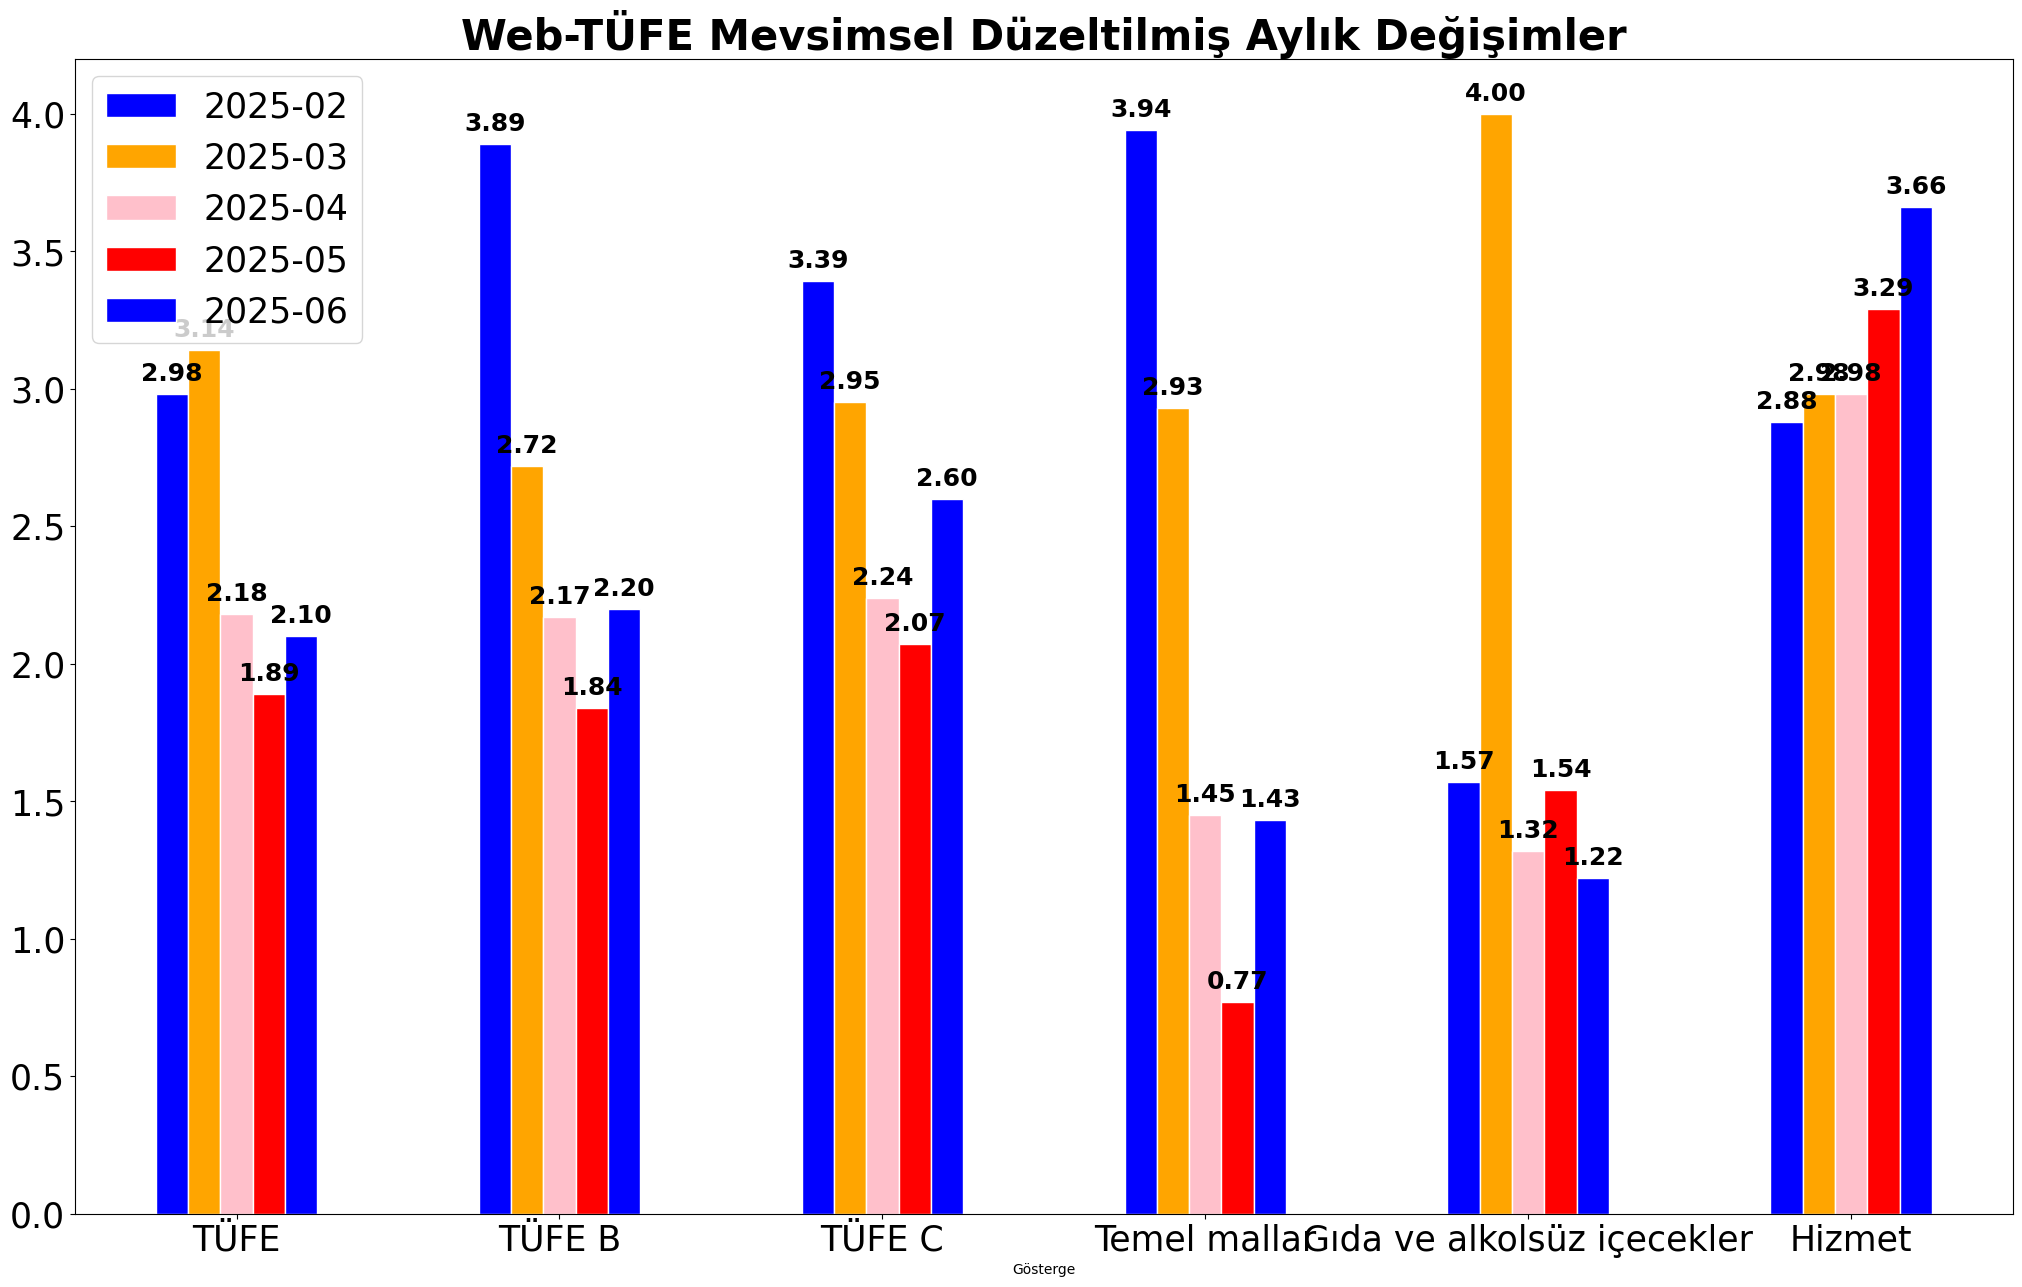

In [45]:
import matplotlib.pyplot as plt

ax = ma.loc[["TÃœFE","TÃœFE B","TÃœFE C", "Temel mallar", "GÄ±da ve alkolsÃ¼z iÃ§ecekler", "Hizmet"]].plot(
    kind="bar",
    figsize=(25, 15),
    color=["blue", "orange", "pink", "red"],
    edgecolor="white",
    linewidth=1,
    fontsize=25
)
ax.set_title(
    "Web-TÃœFE Mevsimsel DÃ¼zeltilmiÅŸ AylÄ±k DeÄŸiÅŸimler",
    fontsize=30,  # Ä°stediÄŸin bÃ¼yÃ¼klÃ¼k
    fontweight="bold"  # Ä°stersen baÅŸlÄ±ÄŸÄ± da kalÄ±n yaparÄ±z
)
plt.xticks(fontsize=25, rotation=0)
plt.legend(fontsize=25)
# BarlarÄ±n Ã¼stÃ¼ne deÄŸerleri bold ÅŸekilde yaz
for container in ax.containers:
    ax.bar_label(
        container, 
        labels=[f"{v:.2f}" for v in container.datavalues],  # Ä°stersen sadece `f"{v:.2f}"` yazmayabilirsin
        label_type='edge',
        padding=6,
        fontsize=18,
        fontweight='bold'
    )

plt.show()


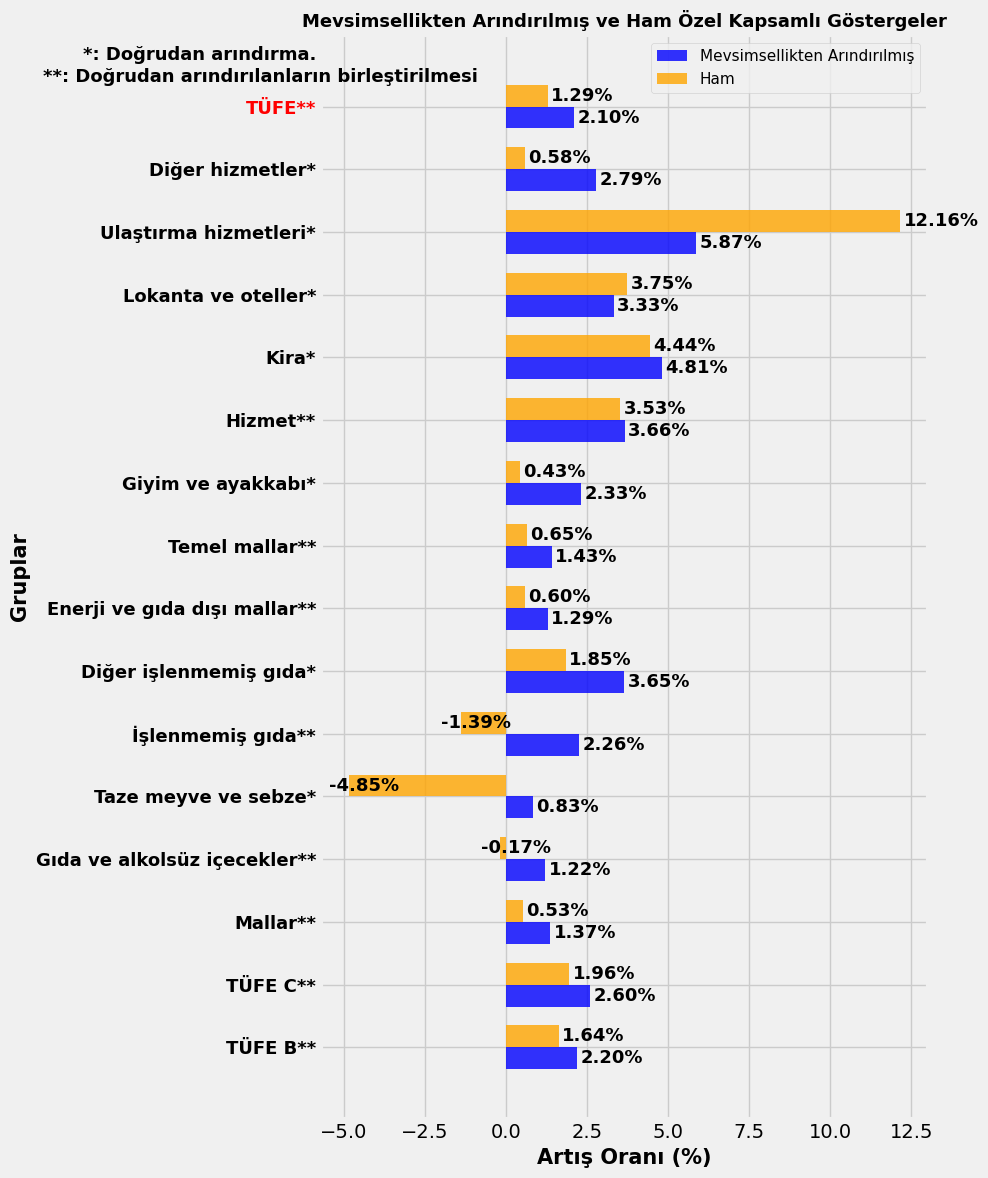

In [63]:
plt.style.use("fivethirtyeight")

index_labels = [
    f"{i}**" if i in ["Mallar", "Temel mallar","Enerji ve gÄ±da dÄ±ÅŸÄ± mallar","GÄ±da ve alkolsÃ¼z iÃ§ecekler","Ä°ÅŸlenmemiÅŸ gÄ±da","Hizmet","TÃœFE","TÃœFE B","TÃœFE C"]
    else f"{i}*" if i in ["Lokanta ve oteller", "Kira", "DiÄŸer hizmetler", "UlaÅŸtÄ±rma hizmetleri", "DiÄŸer iÅŸlenmemiÅŸ gÄ±da", "Taze meyve ve sebze", "Giyim ve ayakkabÄ±"]
    else i
    for i in ham_ma.index
]
colors = ['red' if label == 'TÃœFE**' else 'blue' for label in ham_ma.index]

text_colors_mevsim = ["red" if label == "TÃœFE**" else "black" for label in index_labels]
text_colors_ham = ["red" if label == "TÃœFE**" else "black" for label in index_labels]

# Ä°lk 42 karakteri almak iÃ§in index etiketlerini kÄ±saltma
shortened_index = [label[:42] for label in ham_ma.index]
y_tick_colors = ["red" if "TÃœFE**" in label else "black" for label in index_labels]

# Yatay Ã§ubuk grafiÄŸi
fig, ax = plt.subplots(figsize=(10, 12))
bar_width = 0.35  # Ã‡ubuk geniÅŸliÄŸi

# Ã‡ubuklarÄ±n yerleÅŸimi
y = np.arange(len(index_labels))  # Y ekseni konumlarÄ±

bars2 = ax.barh(
    y - bar_width / 2, 
    ham_ma["MA"].values,  # Mevsimsellikten ArÄ±ndÄ±rÄ±lmÄ±ÅŸ Veriler
    bar_width, 
    label="Mevsimsellikten ArÄ±ndÄ±rÄ±lmÄ±ÅŸ",
    alpha=0.8,
    color="blue"
)

bars1 = ax.barh(
    y + bar_width / 2, 
    ham_ma["Ham"].values,  # Ham Veriler
    bar_width, 
    label="Ham",
    alpha=0.8,
    color="orange"
)

# Ã‡ubuklarÄ±n Ã¼stÃ¼ne etiket ekleme
for bar, value in zip(bars2, ham_ma["MA"]):
    if value<0:
        ax.text(
        bar.get_width() -0.6,  # Ã‡ubuÄŸun saÄŸ tarafÄ±na biraz boÅŸluk ekle
        bar.get_y() + bar.get_height() / 2, 
        f"{value:.2f}%", 
        va='center', 
        ha='left', 
        fontweight='bold',
        fontsize=13
    )
    else:
        ax.text(
        bar.get_width() + 0.1,  # Ã‡ubuÄŸun saÄŸ tarafÄ±na biraz boÅŸluk ekle
        bar.get_y() + bar.get_height() / 2, 
        f"{value:.2f}%", 
        va='center', 
        ha='left', 
        fontweight='bold',
        fontsize=13
    )

for bar, value in zip(bars1, ham_ma["Ham"]):
    
    if value<0:
        ax.text(
        bar.get_width() -0.6,  # Ã‡ubuÄŸun saÄŸ tarafÄ±na biraz boÅŸluk ekle
        bar.get_y() + bar.get_height() / 2, 
        f"{value:.2f}%", 
        va='center', 
        ha='left', 
        fontweight='bold',
        fontsize=13
    )
    else:
        ax.text(
        bar.get_width() + 0.1,  # Ã‡ubuÄŸun saÄŸ tarafÄ±na biraz boÅŸluk ekle
        bar.get_y() + bar.get_height() / 2, 
        f"{value:.2f}%", 
        va='center', 
        ha='left', 
        fontweight='bold',
        fontsize=13
    )

# BaÅŸlÄ±k ve etiketler

ax.set_title(
    f"Mevsimsellikten ArÄ±ndÄ±rÄ±lmÄ±ÅŸ ve Ham Ã–zel KapsamlÄ± GÃ¶stergeler", 
    fontsize=13, 
    fontweight='bold'
)
ax.set_ylabel("Gruplar", fontsize=15, fontweight='bold')
ax.set_xlabel("ArtÄ±ÅŸ OranÄ± (%)", fontsize=15, fontweight='bold')

# Y ekseni etiketleri ayarÄ±
ax.set_yticks(y)
ax.set_yticklabels(index_labels)  # Y ekseni etiketleri

# TÃœFE iÃ§in Ã¶zel renk ve tÃ¼m etiketler iÃ§in bold ve kÃ¼Ã§Ã¼k boyutlu font
y_tick_colors = ["red" if label == "TÃœFE**" else "black" for label in index_labels]
for tick_label, color in zip(ax.get_yticklabels(), y_tick_colors):
    tick_label.set_color(color)  # Renk deÄŸiÅŸikliÄŸi
    tick_label.set_fontweight('bold')  # KalÄ±n yazÄ± tipi
    tick_label.set_fontsize(13)  # YazÄ± boyutunu kÃ¼Ã§Ã¼lt

ax.text(
    -0.2, 0.99, 
    "*: DoÄŸrudan arÄ±ndÄ±rma.", 
    fontsize=13,
    fontweight="bold" ,
    ha='center', 
    va='top', 
    transform=ax.transAxes
)
ax.text(
    -0.1, 0.97, 
    "**: DoÄŸrudan arÄ±ndÄ±rÄ±lanlarÄ±n birleÅŸtirilmesi", 
    fontsize=13,
    fontweight="bold" ,
    ha='center', 
    va='top', 
    transform=ax.transAxes
)

# Efsane ve dÃ¼zenleme
ax.legend(loc=0,fontsize=11)
plt.tight_layout()
plt.savefig("maÃ¶zelgÃ¶stergelernisan.png")
plt.show()


In [ ]:

maddelerim=endeksler.T
maddelerim=maddelerim.reset_index()
maddelerim=maddelerim.rename(columns={"index":"Madde"})

In [ ]:

def hareketli_aylik_ortalama(df):
        deÄŸer = df.name  # Kolon ismi
        df = pd.DataFrame(df)
        df["Tarih"] = pd.to_datetime(df.index)  # Tarih sÃ¼tununu datetime formatÄ±na Ã§evir
        df["GÃ¼n SÄ±rasÄ±"] = df.groupby(df["Tarih"].dt.to_period("M")).cumcount() + 1  # Her ay iÃ§in gÃ¼n sÄ±rasÄ±nÄ± oluÅŸtur
        
        # Her ay iÃ§in ilk 24 gÃ¼nÃ¼ sÄ±nÄ±rla ve hareketli ortalama hesapla
        df["AylÄ±k Ortalama"] = (
            df[df["GÃ¼n SÄ±rasÄ±"] <= 24]
            .groupby(df["Tarih"].dt.to_period("M"))[deÄŸer]
            .expanding()
            .mean()
            .reset_index(level=0, drop=True)
        )
        
        # Orijinal indeksi geri yÃ¼kle
        df.index = pd.to_datetime(df.index)
        return df

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Ã‡izgi grafikleri ve scatterlar
plt.plot(gÄ±da.loc["Ä°ÅŸlenmiÅŸ GÄ±da"], label="Ä°ÅŸlenmiÅŸ gÄ±da")
plt.scatter(x=gÄ±da.columns, y=gÄ±da.loc["Ä°ÅŸlenmiÅŸ GÄ±da"], color="black", zorder=3, s=50)

plt.plot(gÄ±da.loc["Ä°ÅŸlenmemiÅŸ gÄ±da"], label="Ä°ÅŸlenmemiÅŸ gÄ±da")
plt.scatter(x=gÄ±da.columns, y=gÄ±da.loc["Ä°ÅŸlenmemiÅŸ gÄ±da"], color="black", zorder=3, s=50)

# Bar grafiÄŸi
bar_values = gÄ±da.loc["GÄ±da ve alkolsÃ¼z iÃ§ecekler"]
bars = plt.bar(x=gÄ±da.columns, height=bar_values, color="gray", label="GÄ±da ve alkolsÃ¼z iÃ§ecekler")

# BarlarÄ±n Ã¼zerine bold text olarak deÄŸerleri yaz
for i, value in enumerate(bar_values):
    plt.text(gÄ±da.columns[i], value + 0.05, f"{value:.2f}", ha='center', va='bottom', fontweight='bold')

# DiÄŸer ayarlar
plt.legend()
plt.xticks(gÄ±da.columns, rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Ã‡izgi grafikleri ve scatterlar
plt.plot(gÄ±da.loc["Taze meyve ve sebze"], label="Taze meyve ve sebze")
plt.scatter(x=gÄ±da.columns, y=gÄ±da.loc["Taze meyve ve sebze"], color="black", zorder=3, s=50)

plt.plot(gÄ±da.loc["DiÄŸer iÅŸlenmemiÅŸ gÄ±da"], label="DiÄŸer iÅŸlenmemiÅŸ gÄ±da")
plt.scatter(x=gÄ±da.columns, y=gÄ±da.loc["DiÄŸer iÅŸlenmemiÅŸ gÄ±da"], color="black", zorder=3, s=50)

# Bar grafiÄŸi
bar_values = gÄ±da.loc["Ä°ÅŸlenmemiÅŸ gÄ±da"]
bars = plt.bar(x=gÄ±da.columns, height=bar_values, color="gray", label="Ä°ÅŸlenmemiÅŸ gÄ±da")

# BarlarÄ±n Ã¼zerine bold text olarak deÄŸerleri yaz
for i, value in enumerate(bar_values):
    plt.text(gÄ±da.columns[i], value + 0.05, f"{value:.2f}", ha='center', va='bottom', fontweight='bold')

# DiÄŸer ayarlar
plt.legend()
plt.xticks(gÄ±da.columns, rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
gÄ±da=pd.DataFrame(columns=["Taze meyve ve sebze","DiÄŸer iÅŸlenmemiÅŸ gÄ±da","Ä°ÅŸlenmemiÅŸ gÄ±da","Ä°ÅŸlenmiÅŸ GÄ±da","GÄ±da ve alkolsÃ¼z iÃ§ecekler"])
for col in gÄ±da.columns:
    gÄ±da[col]=hareketli_aylik_ortalama(Ã¶zelgÃ¶stergeler[col])["AylÄ±k Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna()*100
gÄ±da.index=pd.to_datetime(gÄ±da.index).strftime("%Y-%m")
gÄ±da.loc["2024-11"]=[9.08,4.54,6.8,1.92,3.94]
gÄ±da.loc["2024-12"]=[7.3,2.92,5.08,2.12,3.37]
gÄ±da.loc["2025-01"]=[6.14,3.24,4.71,2.44,3.41]
gÄ±da=gÄ±da.sort_index()
gÄ±da = gÄ±da.T  # Transpose: kategoriler x eksenine gelecek
gÄ±da=gÄ±da.iloc[:,[-2,-1]]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use("fivethirtyeight")

# Grafik Ã§izimi
fig, ax = plt.subplots(figsize=(25, 15))

kategoriler = gÄ±da.index
aylar = gÄ±da.columns
x = np.arange(len(kategoriler))
width = 0.2

# Her ay iÃ§in bar Ã§izimi
for i, ay in enumerate(aylar):
    values = gÄ±da[ay].values
    bar_positions = x + (i - len(aylar)/2) * width + width/2
    bars = ax.bar(bar_positions, values, width, label=ay)

    # Bar Ã¼stÃ¼ne kalÄ±n text
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.05 if height >= 0 else height - 0.1,
            f"{height:.2f}",
            ha='center',
            va='bottom' if height >= 0 else 'top',
            fontweight='bold',
            fontsize=30
        )

# Eksen ve etiket ayarlarÄ±
ax.set_xticks(x)
ax.set_xticklabels(kategoriler, rotation=0,fontsize=25)
ax.tick_params(axis='y', labelsize=25)  # Y ekseni sayÄ±larÄ±na font bÃ¼yÃ¼klÃ¼ÄŸÃ¼

ax.set_ylabel("YÃ¼zde DeÄŸiÅŸim",fontsize=25)
ax.set_title("GÄ±da Kategorilerinin AylÄ±k DeÄŸiÅŸimi",fontsize=30)
ax.legend(title="Ay",fontsize=25, title_fontsize=25)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Veriyi oluÅŸtur
ma = pd.DataFrame(columns=["2025-02","2025-03","2025-04","2025-05"])
ma.loc["TÃœFE (m.a)"] = (tÃ¼fema.loc["2025-02":]).values

ma=ma.T

# Grafik Ã§izimi
fig, ax = plt.subplots(figsize=(6, 6))

kategoriler = ma.index
aylar = ma.columns
x = np.arange(len(kategoriler))
width = 0.75

# Her ay iÃ§in bar Ã§izimi
for i, ay in enumerate(aylar):
    values = ma[ay].values
    bar_positions = x + (i - len(aylar)/2) * width + width/2
    bars = ax.bar(bar_positions, values, width, label=ay)

    # Bar Ã¼stÃ¼ne kalÄ±n text
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01 if height >= 0 else height - 0.01,
            f"{height:.2f}",
            ha='center',
            fontsize=16,
            va='bottom' if height >= 0 else 'top',
            fontweight='bold',
        )

# Eksen ve etiket ayarlarÄ±
ax.set_xticks(x)
ax.set_xticklabels(kategoriler, rotation=0)
ax.set_ylabel("YÃ¼zde DeÄŸiÅŸim")
ax.legend(loc=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Veriyi oluÅŸtur
bc = pd.DataFrame(columns=["2025-02","2025-03","2025-04","2025-05"])
bc.loc["B (m.a)"] = tÃ¼feb_ma.loc["2025-02":].values
bc.loc["C (m.a)"] = tÃ¼fec_ma.loc["2025-02":].values
bc=bc.T

# Grafik Ã§izimi
fig, ax = plt.subplots(figsize=(6, 6))

kategoriler = bc.index
aylar = bc.columns
x = np.arange(len(kategoriler))
width = 0.3

# Her ay iÃ§in bar Ã§izimi
for i, ay in enumerate(aylar):
    values = bc[ay].values
    bar_positions = x + (i - len(aylar)/2) * width + width/2
    bars = ax.bar(bar_positions, values, width, label=ay)

    # Bar Ã¼stÃ¼ne kalÄ±n text
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01 if height >= 0 else height - 0.05,
            f"{height:.2f}",
            ha='center',
            fontsize=14,
            va='bottom' if height >= 0 else 'top',
            fontweight='bold',
        )

# Eksen ve etiket ayarlarÄ±
ax.set_xticks(x)
ax.set_xticklabels(kategoriler, rotation=0)
ax.set_ylabel("YÃ¼zde DeÄŸiÅŸim")
ax.legend(loc=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
gÄ±da=pd.DataFrame(columns=["Taze meyve ve sebze","DiÄŸer iÅŸlenmemiÅŸ gÄ±da","Ä°ÅŸlenmemiÅŸ gÄ±da","Ä°ÅŸlenmiÅŸ GÄ±da","GÄ±da ve alkolsÃ¼z iÃ§ecekler"])
for col in gÄ±da.columns:
    gÄ±da[col]=hareketli_aylik_ortalama(Ã¶zelgÃ¶stergeler[col])["AylÄ±k Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna()*100
gÄ±da.index=pd.to_datetime(gÄ±da.index).strftime("%Y-%m")
gÄ±da.loc["2024-11"]=[9.08,4.54,6.8,1.92,3.94]
gÄ±da.loc["2024-12"]=[7.3,2.92,5.08,2.12,3.37]
gÄ±da.loc["2025-01"]=[6.14,3.24,4.71,2.44,3.41]
gÄ±da=gÄ±da.sort_index()
gÄ±da = gÄ±da.T  # Transpose: kategoriler x eksenine gelecek


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Veriyi oluÅŸtur
hiz = pd.DataFrame(columns=["2025-04","2025-05"])
hiz.loc["Hizmet (m.a)"] = hizmetma.loc["2025-04":].values
hiz.loc["Temel mallar (m.a)"] = temelmalma.loc["2025-04":].values
hiz.loc["Ä°ÅŸlenmiÅŸ gÄ±da"] = gÄ±da.loc["Ä°ÅŸlenmiÅŸ GÄ±da"].values[-2:]

# Grafik Ã§izimi
fig, ax = plt.subplots(figsize=(6, 6))

kategoriler = hiz.index
aylar = hiz.columns
x = np.arange(len(kategoriler))
width = 0.3

# Her ay iÃ§in bar Ã§izimi
for i, ay in enumerate(aylar):
    values = hiz[ay].values
    bar_positions = x + (i - len(aylar)/2) * width + width/2
    bars = ax.bar(bar_positions, values, width, label=ay)

    # Bar Ã¼stÃ¼ne kalÄ±n text
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01 if height >= 0 else height - 0.01,
            f"{height:.2f}",
            ha='center',
            fontsize=16,
            va='bottom' if height >= 0 else 'top',
            fontweight='bold',
        )

# Eksen ve etiket ayarlarÄ±
ax.set_xticks(x)
ax.set_xticklabels(kategoriler, rotation=0)
ax.set_ylabel("YÃ¼zde DeÄŸiÅŸim")
ax.legend(loc=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
from datetime import datetime,timedelta
import pytz
from dateutil.relativedelta import relativedelta
tÃ¼fe=pd.read_csv("C:/Users/Bora/Documents/GitHub/web-tufe-streamlit/tÃ¼fe.csv",index_col=0)
tÃ¼fe.index=pd.to_datetime(tÃ¼fe.index)

gruplar=pd.read_csv("C:/Users/Bora/Documents/GitHub/web-tufe-streamlit/gruplar_int.csv",index_col=0)
gruplar.index=pd.to_datetime(gruplar.index)
gruplar["TÃœFE"]=tÃ¼fe["TÃœFE"]
gruplar.to_csv("C:/Users/Bora/Documents/GitHub/web-tufe-streamlit/gruplar_int.csv")

gfe1=tÃ¼fe.copy()
gfe1["Date"]=pd.to_datetime(gfe1.index)
gfe1["Ay"]=gfe1["Date"].dt.month
gfe1["YÄ±l"]=gfe1["Date"].dt.year    
month = gfe1["Ay"].iloc[-1]
year=gfe1["YÄ±l"].iloc[-1] 
oncekiyear=gfe1["YÄ±l"].iloc[-1] 
tarihim=pd.to_datetime(gfe1.index[-1]).day
if tarihim>24:
    tarihim=24
if tarihim<10:
    tarihim="0"+str(tarihim)

from datetime import datetime,timedelta
tarih=datetime.now().strftime("%Y-%m")
onceki=(datetime.now()-relativedelta(months=1)).strftime("%Y-%m")

harcama_artÄ±s=pd.Series(index=gruplar.columns)
for col in gruplar.columns:
    harcama_artÄ±s.loc[col]=(((hareketli_aylik_ortalama(gruplar[col])["AylÄ±k Ortalama"].fillna(method="ffill").iloc[-1]/hareketli_aylik_ortalama(gruplar[col])["AylÄ±k Ortalama"].fillna(method="ffill").loc[f"{onceki}-21"])-1)*100)
harcama_artÄ±s=harcama_artÄ±s.sort_values()

colors = ['red' if label == 'TÃœFE' else 'blue' for label in harcama_artÄ±s.index]

# Ä°lk 42 karakteri almak iÃ§in index etiketlerini kÄ±saltma
shortened_index = [label[:42] for label in harcama_artÄ±s.index]



colors = ['red' if label == 'TÃœFE' else 'blue' for label in harcama_artÄ±s.keys()]
shortened_index = [label[:42] for label in harcama_artÄ±s.keys()]
values = list(harcama_artÄ±s)

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 12))
bars = ax.barh(shortened_index, values, color=colors)

# Etiket ekleme
for bar, value in zip(bars, values):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01 if value >= 0 else xpos +0.5,
        bar.get_y() + bar.get_height() / 2,
        f'{value:.2f}%',
        va='center',
        ha='left' if value >= 0 else 'right',
        fontsize=20,
        fontweight='bold',
        color='black',
        bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.3')
    )

# FiveThirtyEight tarzÄ± ayarlar
ax.set_facecolor('whitesmoke')  # Grafik arka planÄ±
fig.patch.set_facecolor('white')  # DÄ±ÅŸ Ã§erÃ§eve arka planÄ±
ax.grid(axis='x', color='lightgray', linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

# BaÅŸlÄ±k ve eksen ayarlarÄ±
ax.set_title(f'Web-TÃœFE Ana Gruplar Haziran AyÄ± ArtÄ±ÅŸ OranlarÄ±', fontsize=20, fontweight='bold', loc='center', pad=20)
ax.set_xlabel('ArtÄ±ÅŸ OranÄ± (%)', fontsize=20, fontweight='bold')
ax.set_ylabel('Grup', fontsize=20, fontweight='bold')
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)

# Filigran ekleme
fig.text(0.55, 0.93, 'GeliÅŸtirici: Bora Kaya', ha='center', va='center', fontsize=20, color='black', alpha=0.7, rotation=0)

# Ã‡ubuklar arasÄ±ndaki boÅŸluk azaltma
plt.subplots_adjust(left=0.35, right=0.95)
plt.tight_layout()
plt.savefig("anagruplar.png", dpi=300)

plt.show()



In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6,6))
plt.plot(tÃ¼fe.loc[:"2025-06-24"],label="Web TÃœFE",linewidth=6)
plt.plot(Ã¶zelgÃ¶stergeler["TÃœFE B"].loc[:"2025-06-24"],label="B",linewidth=5)
plt.plot(Ã¶zelgÃ¶stergeler["TÃœFE C"].loc[:"2025-06-24"],label="C",linewidth=5)
plt.legend(fontsize=16)
plt.grid(True)
plt.xticks(rotation=45,fontsize=16)
plt.savefig("tÃ¼fe.png", dpi=300)

In [ ]:
Ã¶zelgÃ¶stergeler.loc[pd.to_datetime("2024-12-31")]=100
Ã¶zelgÃ¶stergeler=Ã¶zelgÃ¶stergeler.sort_index()
plt.figure(figsize=(12,8))
plt.title("Web-TÃœFE Ã–zel KapsamlÄ± GÃ¶stergeler")

plt.plot(Ã¶zelgÃ¶stergeler["Hizmet"].loc[:"2025-05-24"],label="Hizmet",linewidth=4)
plt.plot(Ã¶zelgÃ¶stergeler["Enerji"].loc[:"2025-05-24"],label="Enerji",linewidth=4)
plt.plot(Ã¶zelgÃ¶stergeler["Temel mallar"].loc[:"2025-05-24"],label="Temel mallar",linewidth=4)
plt.plot(Ã¶zelgÃ¶stergeler["GÄ±da ve alkolsÃ¼z iÃ§ecekler"].loc[:"2025-05-24"],label="GÄ±da ve alkolsÃ¼z iÃ§ecekler",linewidth=4)

plt.legend()
plt.grid(True)
plt.xticks(Ã¶zelgÃ¶stergeler.loc[:"2025-05-24"].index[::10],rotation=45)
plt.tight_layout()
plt.savefig("Ã¶zelgÃ¶stergeler_nisan.png", dpi=300)

In [ ]:
tarih="2025-06"
onceki="2025-05"

In [ ]:
harcama_gruplarÄ±=harcama_gruplarÄ±.sort_index()
veri=pd.concat([(((harcama_gruplarÄ±.loc[f"{tarih}"].mean()/harcama_gruplarÄ±.loc[f"{onceki}":f"{onceki}-05"].mean())-1)*100).sort_values().head(5),(((harcama_gruplarÄ±.loc[f"{tarih}"].mean()/harcama_gruplarÄ±.loc[f"{onceki}":f"{onceki}-05"].mean())-1)*100).sort_values().tail(19)],axis=0)
veri.loc["Web-TÃœFE"]=(((tÃ¼fe.loc[f"{tarih}"].mean()/tÃ¼fe.loc[f"{onceki}":f"{onceki}-05"].mean())-1)*100).values[0]
veri=veri.sort_values()

colors = ['red' if label == 'Web-TÃœFE' else 'blue' for label in veri.index]

# Ä°lk 42 karakteri almak iÃ§in index etiketlerini kÄ±saltma
shortened_index = [label[:100] for label in veri.index]



shortened_index = [label[:100] for label in veri.keys()]
values = list(veri)

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 12))
bars = ax.barh(shortened_index, values, color=colors)

# Etiket ekleme
for bar, value in zip(bars, values):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01 if value >= 0 else xpos +3,
        bar.get_y() + bar.get_height() / 2,
        f'{value:.2f}%',
        va='center',
        ha='left' if value >= 0 else 'right',
        fontsize=12,
        fontweight='bold',
        color='black',
        bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.3')
    )

# FiveThirtyEight tarzÄ± ayarlar
ax.set_facecolor('whitesmoke')  # Grafik arka planÄ±
fig.patch.set_facecolor('white')  # DÄ±ÅŸ Ã§erÃ§eve arka planÄ±
ax.grid(axis='x', color='lightgray', linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

# BaÅŸlÄ±k ve eksen ayarlarÄ±
ax.set_title(f'Web-TÃœFE En Ã‡ok DeÄŸiÅŸim YaÅŸanan Temel BaÅŸlÄ±klar', fontsize=12, fontweight='bold', loc='center', pad=12)
ax.set_xlabel('ArtÄ±ÅŸ OranÄ± (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Grup', fontsize=12, fontweight='bold')
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

# Filigran ekleme
fig.text(0.7, 0.93, 'GeliÅŸtirici: Bora Kaya (@mborathe)', ha='center', va='center', fontsize=12, color='black', alpha=0.7, rotation=0)

# Ã‡ubuklar arasÄ±ndaki boÅŸluk azaltma
plt.subplots_adjust(left=0.35, right=0.95)
plt.tight_layout()

plt.savefig("temelbaÅŸlÄ±klar_nisan.png", dpi=300)



In [ ]:
endeksler.index=pd.to_datetime(endeksler.index)

In [ ]:
endeksler=endeksler.sort_index()
veri=pd.concat([(((endeksler.loc[f"{tarih}":f"{tarih}-24"].mean()/endeksler.loc[f"{onceki}":f"{onceki}-15"].mean())-1)*100).sort_values().head(15),(((endeksler.loc[f"{tarih}":f"{tarih}-24"].mean()/endeksler.loc[f"{onceki}":f"{onceki}-15"].mean())-1)*100).sort_values().tail(15)],axis=0)
veri.loc["Web-TÃœFE"]=(((tÃ¼fe.loc[f"{tarih}":f"{tarih}-24"].mean()/tÃ¼fe.loc[f"{onceki}":f"{onceki}-15"].mean())-1)*100).values[0]
veri=veri.sort_values()

colors = ['red' if label == 'Web-TÃœFE' else 'blue' for label in veri.index]

# Ä°lk 42 karakteri almak iÃ§in index etiketlerini kÄ±saltma
shortened_index = [label[:100] for label in veri.index]



shortened_index = [label[:100] for label in veri.keys()]
values = list(veri)

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 12))
bars = ax.barh(shortened_index, values, color=colors)

# Etiket ekleme
for bar, value in zip(bars, values):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01 if value >= 0 else xpos +1,
        bar.get_y() + bar.get_height() / 2,
        f'{value:.2f}%',
        va='center',
        ha='left' if value >= 0 else 'right',
        fontsize=12,
        fontweight='bold',
        color='black',
        bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.1')
    )

# FiveThirtyEight tarzÄ± ayarlar
ax.set_facecolor('whitesmoke')  # Grafik arka planÄ±
fig.patch.set_facecolor('white')  # DÄ±ÅŸ Ã§erÃ§eve arka planÄ±
ax.grid(axis='x', color='lightgray', linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

# BaÅŸlÄ±k ve eksen ayarlarÄ±
ax.set_title(f'Web-TÃœFE En Ã‡ok DeÄŸiÅŸim YaÅŸanan Maddeler', fontsize=12, fontweight='bold', loc='center', pad=12)
ax.set_xlabel('ArtÄ±ÅŸ OranÄ± (%)', fontsize=12, fontweight='bold')
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

# Filigran ekleme
fig.text(0.62, 0.93, 'GeliÅŸtirici: Bora Kaya (@mborathe)', ha='center', va='center', fontsize=12, color='black', alpha=0.7, rotation=0)

# Ã‡ubuklar arasÄ±ndaki boÅŸluk azaltma
plt.subplots_adjust(left=0.35, right=0.95)
plt.tight_layout()

plt.savefig("maddeler_nisan.png", dpi=300)



In [ ]:
Ã¶zelgÃ¶stergeler=Ã¶zelgÃ¶stergeler.sort_index()
veri=pd.concat([(((Ã¶zelgÃ¶stergeler.loc["2025-03":"2025-03-24"].mean()/Ã¶zelgÃ¶stergeler.loc["2025-02-01":"2025-02-24"].mean())-1)*100).sort_values().head(15),(((Ã¶zelgÃ¶stergeler.loc["2025-03":"2025-03-24"].mean()/Ã¶zelgÃ¶stergeler.loc["2025-02-01":"2025-02-24"].mean())-1)*100).sort_values().tail(15)],axis=0)
veri.loc["Web-TÃœFE"]=(((tÃ¼fe.loc["2025-03":"2025-03-24"].mean()/tÃ¼fe.loc["2025-02-01":"2025-02-24"].mean())-1)*100).values[0]
veri=veri.sort_values()

colors = ['red' if label == 'Web-TÃœFE' else 'blue' for label in veri.index]

# Ä°lk 42 karakteri almak iÃ§in index etiketlerini kÄ±saltma
shortened_index = [label[:100] for label in veri.index]



shortened_index = [label[:100] for label in veri.keys()]
values = list(veri)

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 12))
bars = ax.barh(shortened_index, values, color=colors)

# Etiket ekleme
for bar, value in zip(bars, values):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01 if value >= 0 else xpos +1,
        bar.get_y() + bar.get_height() / 2,
        f'{value:.2f}%',
        va='center',
        ha='left' if value >= 0 else 'right',
        fontsize=12,
        fontweight='bold',
        color='black',
        bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.1')
    )

# FiveThirtyEight tarzÄ± ayarlar
ax.set_facecolor('whitesmoke')  # Grafik arka planÄ±
fig.patch.set_facecolor('white')  # DÄ±ÅŸ Ã§erÃ§eve arka planÄ±
ax.grid(axis='x', color='lightgray', linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

# BaÅŸlÄ±k ve eksen ayarlarÄ±
ax.set_title(f'Web-TÃœFE Ã–zel KapsamlÄ± GÃ¶stergeler ArtÄ±ÅŸ OranlarÄ±', fontsize=12, fontweight='bold', loc='center', pad=12)
ax.set_xlabel('ArtÄ±ÅŸ OranÄ± (%)', fontsize=12, fontweight='bold')
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

# Filigran ekleme
fig.text(0.62, 0.95, 'GeliÅŸtirici: Bora Kaya (@mborathe)', ha='center', va='center', fontsize=12, color='black', alpha=0.7, rotation=0)

# Ã‡ubuklar arasÄ±ndaki boÅŸluk azaltma
plt.subplots_adjust(left=0.35, right=0.95)
plt.tight_layout()

plt.savefig("Ã¶zelgÃ¶stergelerartÄ±ÅŸ.png", dpi=300)



In [ ]:

Ã¶zelgÃ¶stergeler=Ã¶zelgÃ¶stergeler[['Mevsimlik ÃœrÃ¼nler HariÃ§ TÃœFE', 'TÃœFE B', 'TÃœFE C', 'TÃœFE D','TÃœFE E', 'TÃœFE F',
       'Mallar', 'Enerji', 'GÄ±da ve alkolsÃ¼z iÃ§ecekler','Ä°ÅŸlenmemiÅŸ gÄ±da', 'Taze meyve ve sebze', 'DiÄŸer iÅŸlenmemiÅŸ gÄ±da',
        'Ä°ÅŸlenmiÅŸ GÄ±da',
       'Ekmek ve tahÄ±llar', 'DiÄŸer iÅŸlenmiÅŸ gÄ±da',
       'Enerji ve gÄ±da dÄ±ÅŸÄ± mallar', 'Temel mallar', 'Giyim ve ayakkabÄ±',
       'DayanÄ±klÄ± Mallar (altÄ±n hariÃ§)', 'DiÄŸer Temel Mallar',
       'AlkollÃ¼ iÃ§ecekler, tÃ¼tÃ¼n ve altÄ±n', 'Hizmet', 'Kira',
       'Lokanta ve oteller', 'UlaÅŸtÄ±rma hizmetleri', 'HaberleÅŸme hizmetleri',
       'DiÄŸer hizmetler', 'TÃœFE']]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Genel artÄ±ÅŸ hesaplama fonksiyonu
def artÄ±shesapla(seri, hedef_ay):
    hedef_baslangic = f"{hedef_ay}-01"
    hedef_bitis = f"{hedef_ay}-24"

    # Ã–nceki ayÄ± hesapla
    tarih = pd.to_datetime(hedef_ay + "-01")
    onceki_ay = (tarih - pd.DateOffset(months=1)).strftime("%Y-%m")
    onceki_baslangic = f"{onceki_ay}-01"
    onceki_bitis = f"{onceki_ay}-24"

    if hedef_ay=="2025-06":

        onceki_bitis = "2025-05-21"

    artÄ±s = (((Ã¶zelgÃ¶stergeler.loc[hedef_baslangic:hedef_bitis].mean() /
               Ã¶zelgÃ¶stergeler.loc[onceki_baslangic:onceki_bitis].mean()) - 1) * 100)
    return round(artÄ±s, 2)


# Veriyi tanÄ±mlayalÄ±m
data = {
    "Åžubat 25": artÄ±shesapla(Ã¶zelgÃ¶stergeler, "2025-02"),
    "Mart 25": artÄ±shesapla(Ã¶zelgÃ¶stergeler, "2025-03"),
    "Nisan 25": artÄ±shesapla(Ã¶zelgÃ¶stergeler, "2025-04"),
    "MayÄ±s 25": artÄ±shesapla(Ã¶zelgÃ¶stergeler, "2025-05"),
    "Haziran 25": artÄ±shesapla(Ã¶zelgÃ¶stergeler, "2025-06"),
  
}

# DataFrame oluÅŸtur
df = pd.DataFrame(data)




In [ ]:
son=df.iloc[-1:]
df=df.iloc[:-1]
df=pd.concat([son,df],axis=0)

In [ ]:
hizmet=df.iloc[-6:]
hizmet.columns=["2025-02","2025-03","2025-04","2025-05","2025-06"]
hizmet=hizmet.iloc[:,-3:]
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("fivethirtyeight")
# Gruplu bar grafiÄŸi iÃ§in gerekli ayarlar
fig, ax = plt.subplots(figsize=(12, 8))

# X ekseni iÃ§in aylar ve kategoriler
months = hizmet.index
categories = hizmet.columns
x = np.arange(len(months))
width = 0.25  # bar geniÅŸliÄŸi

# Her kategori iÃ§in bar Ã§izimi
for i, category in enumerate(categories):
    values = hizmet[category].values
    bar_positions = x + (i - 1.5) * width  # gruplama iÃ§in konum kaydÄ±rmasÄ±
    bars = ax.bar(bar_positions, values, width, label=category)

    # BarlarÄ±n Ã¼stÃ¼ne kalÄ±n deÄŸer yazÄ±mÄ±
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            height + 0.05 if height >= 0 else height - 0.1,  # negatif deÄŸerler iÃ§in ayar
            f"{height:.2f}",
            fontsize=12,
            ha='center', 
            va='bottom' if height >= 0 else 'top',
            fontweight='bold'
        )

# Ekseni ayarlama
ax.set_xticks(x)
ax.set_xticklabels(months,rotation=30)
ax.set_ylabel("YÃ¼zde DeÄŸiÅŸim")
ax.set_title("Hizmet FiyatlarÄ±nÄ±n AylÄ±k DeÄŸiÅŸimi")
ax.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
harcama_gruplarÄ±=harcama_gruplarÄ±.drop("2024-12-31",axis=0)

In [ ]:
(((endeksler.loc["2025-05"].mean()/endeksler.loc["2025-04":"2025-04-24"].mean()).sort_values()-1)*100).tail(40)

In [ ]:
# Kategorilere Ã¶zel seviye belirleme (manuel)
seviye_map = {
    'Mallar': 0,
    'Enerji': 1,
    'GÄ±da ve alkolsÃ¼z iÃ§ecekler': 1,
    'Taze meyve ve sebze': 3,
    'Ä°ÅŸlenmemiÅŸ gÄ±da': 2,
    'DiÄŸer iÅŸlenmemiÅŸ gÄ±da': 3,
    'Ä°ÅŸlenmiÅŸ GÄ±da': 2,
    'Ekmek ve tahÄ±llar': 3,
    'DiÄŸer iÅŸlenmiÅŸ gÄ±da': 3,
    'Enerji ve gÄ±da dÄ±ÅŸÄ± mallar': 1,
    'Temel mallar': 2,
    'Giyim ve ayakkabÄ±': 3,
    'DayanÄ±klÄ± Mallar (altÄ±n hariÃ§)': 3,
    'DiÄŸer Temel Mallar': 3,
    'AlkollÃ¼ iÃ§ecekler, tÃ¼tÃ¼n ve altÄ±n': 2,
    'Hizmet':0,
    'Kira':2,
    'Lokanta ve oteller':2,
    'HaberleÅŸme hizmetleri':2,
    'DiÄŸer hizmetler':2,
    'UlaÅŸtÄ±rma hizmetleri':2
}

# Seviye bilgisi fonksiyonu (manuel harita Ã¼zerinden)
def get_level_manual(kategori):
    return seviye_map.get(kategori.strip(), 0)

# Unicode geniÅŸ boÅŸlukla girinti (em space)
def get_indent(level):
    return "\u2003" * level  # 'EM SPACE' Unicode karakteri
df["Kategori"]=df.index
df=df.reset_index(drop=True)
# Seviye ve temiz isimleri ekle
df['Kategori_Temiz'] = df['Kategori'].apply(lambda x: x.strip())
df['Seviye'] = df['Kategori_Temiz'].apply(get_level_manual)


In [ ]:
import seaborn as sns
def get_level(text):
    leading_spaces = len(text) - len(text.lstrip())
    if leading_spaces == 0:
        return 0
    elif leading_spaces <= 8:
        return 1
    elif leading_spaces <= 32:
        return 2
    elif leading_spaces <= 35:
        return 3
    else:
        return 4



# DeÄŸiÅŸim oranlarÄ±nÄ± hesapla (bps = yÃ¼zde puanÄ± Ã— 100)
df['DeÄŸiÅŸim'] = (df['Haziran 25'] - df['MayÄ±s 25'])



# Stil ayarlarÄ±
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Blues_r")

# FigÃ¼r oluÅŸtur
fig, ax = plt.subplots(figsize=(21, 15))

# Tablo baÅŸlÄ±klarÄ±
column_labels = ['Kategori', 'MayÄ±s 25 (%)', 'Haziran 25 (%)', 'DeÄŸiÅŸim(puan)']

table = ax.table(
    cellText=[[''] * len(column_labels)] * len(df),
    colLabels=column_labels,
    loc='center',
    cellLoc='left',
    colWidths=[0.75, 0.1, 0.1, 0.1, 0.12, 0.12]
)

# Tablo ayarlarÄ±
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(1, 2.5)

# BaÅŸlÄ±k hÃ¼creleri
for i, label in enumerate(column_labels):
    cell = table[0, i]
    cell.set_text_props(weight='bold', color='white')
    cell.set_facecolor('#336699')

# Veri satÄ±rlarÄ±
for i, (_, row) in enumerate(df.iterrows(), 1):
    # Girintili kategori
    indent = '  ' * row['Seviye']
    cell = table[i, 0]
    cell.set_text_props(ha='left', fontweight='normal' if row['Seviye'] > 0 else 'bold')
    cell.set_facecolor('#F0F0F0' if i % 2 == 0 else 'white')
    cell._text.set_text(f"{indent}{row['Kategori_Temiz']}")



    # YÃ¼zde deÄŸer hÃ¼creleri
    for j, col in enumerate(['MayÄ±s 25', 'Haziran 25']):
        cell = table[i, j + 1]
        is_nisan = (col == 'MayÄ±s 25')
        cell.set_text_props(ha='right', fontweight='bold' if is_nisan else 'normal')
        cell.set_facecolor('#F0F0F0' if i % 2 == 0 else 'white')
        cell._text.set_text(f"{row[col]:.2f}")


    # DeÄŸiÅŸim hÃ¼creleri (renkli)
    for j, col in enumerate(['DeÄŸiÅŸim']):
        val = row[col]
        cell = table[i, j + 3]
        cell.set_text_props(ha='right', color='white' if abs(val) > 30 else 'black')
        
        # Renk belirleme (yeÅŸil = dÃ¼ÅŸÃ¼ÅŸ, kÄ±rmÄ±zÄ± = artÄ±ÅŸ)
        if val < 0:
            cell_color = "#0fa00d"
        else:
            cell_color = "#b50101"
        
        cell.set_facecolor(cell_color)
        cell._text.set_text(f"{val:+.2f}")

# Tablonun etrafÄ±ndaki eksenleri gizle
ax.axis('off')

# Kaynak yazÄ±sÄ±
plt.figtext(0.02, 0.01, 'Kaynak: Web-TÃœFE Verileri, 2025', fontsize=9, fontstyle='italic')

# YerleÅŸimi ayarla
plt.tight_layout(rect=[0.01, 0.05, 0.99, 0.99])
plt.savefig("Ã¶zelgÃ¶stergelernisan.png")
# GÃ¶ster
plt.show()


In [ ]:
(Ã¶zelgÃ¶stergeler.iloc[-1]-100).round(2)

In [ ]:
sharpe=endeksler.pct_change().rolling(30).mean().iloc[-1]/endeksler.pct_change().rolling(30).std().iloc[-1]

In [ ]:
zirai3=Ã¼rÃ¼nler[Ã¼rÃ¼nler["ÃœrÃ¼n"].isin(["ÃœzÃ¼m","Kuru ÃœzÃ¼m","Elma","AyÃ§ekirdeÄŸi","Ã‡ay","Kivi","Zeytin","Ayva","Åžeftali","Armut","Karpuz","Patates","Portakal","Mandalina","Åžeftali","Patates","Karpuz","Portakal","Mandalina","Kabak","PatlÄ±can","Sivri Biber","Ã‡arliston Biber","SalatalÄ±k"])]
zirai3=zirai3.drop_duplicates(subset=["ÃœrÃ¼n"])
zirai3=zirai3.groupby("ÃœrÃ¼n")["AÄŸÄ±rlÄ±k"].sum()/zirai3.groupby("ÃœrÃ¼n")["AÄŸÄ±rlÄ±k"].sum().sum()
zirai3=(endeksler[zirai3.index]*zirai3).sum(axis=1)
zirai3

In [ ]:
from datetime import datetime
plt.figure(figsize=(20,12))
plt.title("Zirai Dondan Etkilenen ÃœrÃ¼nlerin Sepeti",fontsize=30)

plt.plot(zirai3,linewidth=6)
plt.axvspan(datetime(2025,2,21), datetime(2025,2,26), color='yellow', alpha=0.3, label="1.Zirai Don (21-25 Åžubat)")
plt.axvspan(datetime(2025,3,21), datetime(2025,3,22), color='yellow', alpha=0.3, label="2.Zirai Don (21-22 Mart)")
plt.axvspan(datetime(2025,4,9), datetime(2025,4,13), color='yellow', alpha=0.3, label="3.Zirai Don (9-13 Nisan)")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(prop={'weight': 'bold',"size":24})

In [ ]:
def aylik_degisim_serisi(ts: pd.Series) -> pd.Series:
        ts = ts.sort_index()
        aylik_degisim = []

        for tarih in ts.index:
            gun = tarih.day
            ay = tarih.month
            yil = tarih.year

            # Bu ay ve geÃ§en ay iÃ§in veri
            bu_ay = ts[(ts.index.year == yil) & (ts.index.month == ay)]
            if ay == 1:
                onceki_ay = ts[(ts.index.year == yil - 1) & (ts.index.month == 12)]
            else:
                onceki_ay = ts[(ts.index.year == yil) & (ts.index.month == ay - 1)]

            if gun <= 24:
                ort_bu = bu_ay.iloc[:gun].mean()
                ort_onceki = onceki_ay.iloc[:gun].mean()

                if pd.notna(ort_bu) and pd.notna(ort_onceki) and ort_onceki != 0:
                    oran = (ort_bu / ort_onceki) - 1
                    aylik_degisim.append(oran*100)
                else:
                    aylik_degisim.append(None)
            else:
                try:
                    tarih_24 = bu_ay.index[23]
                    oran_24 = aylik_degisim[ts.index.get_loc(tarih_24)]
                    aylik_degisim.append(oran_24)
                except:
                    aylik_degisim.append(None)

        return pd.Series(aylik_degisim[-gun:], index=ts.index[-gun:])

In [ ]:
et=[
       "Dana eti","Kuzu eti"
       ]
w=Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(et)].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(et)].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()
et=pd.DataFrame((harcama_gruplarÄ±[et]*w).sum(axis=1))

hareketli_aylik_ortalama(et.iloc[:,0])["AylÄ±k Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna()*100

In [ ]:
aylik_degisim_serisi(et[0])

In [ ]:
beyazesya=[
       'BuzdolabÄ±, derin dondurucu',
        'Ã‡amaÅŸÄ±r ve bulaÅŸÄ±k makineleri','Klima ve Ä±sÄ±tÄ±cÄ±lar','FÄ±rÄ±n, ocak ve fÄ±rÄ±nlÄ± ocak'
       ]
w=Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(beyazesya)].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(beyazesya)].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()
beyazesya=pd.DataFrame((harcama_gruplarÄ±[beyazesya]*w).sum(axis=1))
hareketli_aylik_ortalama(beyazesya.iloc[:,0])["AylÄ±k Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna()*100

In [ ]:
aylik_degisim_serisi(beyazesya[0])

In [ ]:
mobilya=['Mutfak mobilyalarÄ±', 'Yatak odasÄ± mobilyalarÄ±','Yemek odasÄ± ve oturma odasÄ± mobilyalarÄ±']
w=Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(mobilya)].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(mobilya)].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()
mobilya=pd.DataFrame((harcama_gruplarÄ±[mobilya]*w).sum(axis=1))
hareketli_aylik_ortalama(mobilya.iloc[:,0])["AylÄ±k Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna()*100

In [ ]:
aylik_degisim_serisi(mobilya[0])

In [ ]:
otomobil=[
       'Dizel otomobiller (sÄ±fÄ±r km)','Benzinli ve elektrikli otomobiller (sÄ±fÄ±r km)'
       ]

w=Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(otomobil)].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(otomobil)].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()
otomobil=pd.DataFrame((harcama_gruplarÄ±[otomobil]*w).sum(axis=1))
hareketli_aylik_ortalama(otomobil.iloc[:,0])["AylÄ±k Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna()*100

In [ ]:
aylik_degisim_serisi(otomobil[0])

In [ ]:
ayakkabÄ±=["Benzin","KadÄ±n ayakkabÄ±sÄ±","Erkek ayakkabÄ±sÄ±"
       ]

w=Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(ayakkabÄ±)].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(ayakkabÄ±)].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()
ayakkabÄ±=pd.DataFrame((harcama_gruplarÄ±[ayakkabÄ±]*w).sum(axis=1))
hareketli_aylik_ortalama(ayakkabÄ±.iloc[:,0])["AylÄ±k Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna()*100

In [ ]:
df=pd.DataFrame(columns=harcama_gruplarÄ±.columns)
for col in df.columns:
    df[col]=(hareketli_aylik_ortalama(harcama_gruplarÄ±[col]))["AylÄ±k Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna()*100

In [ ]:
df=df.loc["2025-02":]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ã–rnek veri

# Boxplot Ã§izimi
plt.boxplot(df.T, whis=[0, 100])  # whisker uÃ§larÄ± min ve max deÄŸerlerde
plt.xticks(ticks=np.arange(1, len(df.index) + 1),labels=df.index.strftime("%Y-%m"))
plt.title("Box-Whisker GrafiÄŸi")
plt.ylabel("DeÄŸer")
plt.grid(True)
plt.show()


In [ ]:
enerji=["Elektrik","DoÄŸalgaz ve ilgili abonelik Ã¼cretleri","TÃ¼pgaz (ev tÃ¼pÃ¼)","KatÄ± yakÄ±tlar (odun, kÃ¶mÃ¼r)",
                 "KiÅŸisel ulaÅŸtÄ±rma araÃ§larÄ±nÄ±n yakÄ±t ve yaÄŸlarÄ± (benzin, motorin, motor yaÄŸÄ±)","Su (ÅŸebeke suyu)"
       ]
enerji=Ã¼rÃ¼nler[Ã¼rÃ¼nler["Grup"].isin(enerji)].drop_duplicates()
enerji["AÄŸÄ±rlÄ±k"]=enerji["AÄŸÄ±rlÄ±k"]/enerji["AÄŸÄ±rlÄ±k"].sum()
enerji=enerji.drop_duplicates()
enerji.groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()

In [ ]:
aÄŸÄ±rlÄ±klar=pd.read_csv("aÄŸÄ±rlÄ±klartÃ¼fe.csv",index_col=0)
aÄŸÄ±rlÄ±klar=aÄŸÄ±rlÄ±klar.sort_values(by="AÄŸÄ±rlÄ±k",ascending=False)
aÄŸÄ±rlÄ±klar

In [ ]:
seÃ§ilmiÅŸ=list(aÄŸÄ±rlÄ±klar.index[:30].drop(["KiracÄ± TarafÄ±ndan Ã–denen GerÃ§ek Kira","Ekmek","Dana Eti","Cep Telefonu GÃ¶rÃ¼ÅŸme Ãœcreti",'DoÄŸalgaz Ãœcreti', 'Elektrik Ãœcreti','Tavuk Eti','Kuzu Eti',
       'AyÃ§iÃ§ek YaÄŸÄ±','Ã‡amaÅŸÄ±r Ä°Ã§in Temizlik ve BakÄ±m ÃœrÃ¼nleri','Beyaz Peynir', "Yumurta","Domates"]).values)
seÃ§ilmiÅŸ.extend(["Televizyon","Ã–zel Ä°lkÃ¶ÄŸretim Ãœcreti","Otel Ãœcreti","No-Frost BuzdolabÄ±","Ã‡amaÅŸÄ±r Makinesi","TÃ¼p Gaz Ãœcreti","GÃ¼ndelikÃ§i Ãœcreti","Motorsiklet","Yatak OdasÄ± TakÄ±mÄ±","Erkek Berberi",
                 "Ã‡orbalar","Spor AyakkabÄ±sÄ± (Erkek iÃ§in)","Pizzalar","KadÄ±n Berberi","Derin Dondurucu","Elektrikli SÃ¼pÃ¼rge","BulaÅŸÄ±k Makinesi","Spor AyakkabÄ±sÄ± (KadÄ±n iÃ§in)","Tek Masa","Test KitaplarÄ±","Bilgisayar","Yemek OdasÄ± TakÄ±mÄ±","Yatak (Ã‡ift KiÅŸilik)","SÃ¼rÃ¼cÃ¼ EÄŸitim Kurs Ãœcreti","Ankastre Mikrodalga FÄ±rÄ±n","SoÄŸuk Ä°Ã§ecekler (Servis edilen)","Telefon OnarÄ±m Ãœcreti","Bisiklet","KaÅŸÄ±k, Ã‡atal, BÄ±Ã§ak TakÄ±mÄ± (Ã‡elik)","Kuru Temizleme Ãœcreti","Veteriner Ãœcreti","Tablet (Bilgisayar)","AyakkabÄ± Tamiri (Erkek)"])

In [ ]:
from scipy.stats import gmean
sepet=pd.read_csv("C:/Users/Bora/Documents/GitHub/web-tufe/deneme.csv",index_col=0)
fiyatlar=pd.DataFrame()
fiyatlar["Madde"]=seÃ§ilmiÅŸ
def geometric_mean_log(series):
    # Veriyi logaritma alarak normalize et
    log_series = np.log(series)
    
    # LogaritmalarÄ±n ortalamasÄ±nÄ± al ve sonrasÄ±nda exponansiyelini al
    geo_mean = np.exp(log_series.mean())
    
    return geo_mean
for madde in seÃ§ilmiÅŸ:
    if isinstance(sepet.loc[madde,"2025-04-01":],pd.Series):
        fiyatlar.loc[fiyatlar["Madde"]==madde,"Fiyat"]=sepet.loc[madde,"2025-04-01":].mean()
    else:
        fiyatlar.loc[fiyatlar["Madde"]==madde,"Fiyat"]=sepet.loc[madde,"2025-04-01":].apply(geometric_mean_log,axis=0).mean()

In [ ]:

fiyatlar["Fiyat"]=fiyatlar["Fiyat"].round(2)
fiyatlar

In [ ]:
fiyatlar=fiyatlar.sort_values(by="Fiyat",ascending=True)


In [ ]:
import matplotlib.pyplot as plt

# Veri Ã¶rneÄŸi (fiyatlar yerine gerÃ§ek verinizi kullanmalÄ±sÄ±nÄ±z)
# fiyatlar = ...

# Tabloyu 2 parÃ§aya bÃ¶lelim
half = len(fiyatlar) // 2

# Grafik ve eksenleri oluÅŸtur
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 12))  # Yan yana 2 alt grafik

# Ä°lk yarÄ±
ax1.axis('off')  # Eksenleri kapat
table1 = ax1.table(cellText=fiyatlar.iloc[:half].values, colLabels=fiyatlar.columns, loc='center', cellLoc='center', colColours=["#f5f5f5"]*2)

for (i, j), cell in table1.get_celld().items():
    if i == 0:
        cell.set_fontsize(18)
        cell.set_text_props(weight='bold')
    else:
        cell.set_fontsize(18)
    if j == 0:
        cell.set_edgecolor('black')
    else:
        cell.set_edgecolor('gray')
    cell.set_height(0.05)

# Ä°kinci yarÄ±
ax2.axis('off')  # Eksenleri kapat
table2 = ax2.table(cellText=fiyatlar.iloc[half:].values, colLabels=fiyatlar.columns, loc='center', cellLoc='center', colColours=["#f5f5f5"]*2)

for (i, j), cell in table2.get_celld().items():
    if i == 0:
        cell.set_fontsize(18)
        cell.set_text_props(weight='bold')
    else:
        cell.set_fontsize(18)
    if j == 0:
        cell.set_edgecolor('black')
    else:
        cell.set_edgecolor('gray')
    cell.set_height(0.05)

# Grafik gÃ¶ster
plt.savefig("fiyatlar.png", dpi=300)



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ðŸ”¹ Stil ayarlarÄ± (senin gibi bir tema oluÅŸturabiliriz!)
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# ðŸ”¹ Verileri hazÄ±rla
harcamaÃ¼rÃ¼nleri = pd.read_csv("harcamaÃ¼rÃ¼nleri1.csv", index_col=0)
ana = "Ev eÅŸyasÄ±"
grup = harcamaÃ¼rÃ¼nleri[harcamaÃ¼rÃ¼nleri["Ana Grup"] == ana]["Grup"].unique()

artÄ±slar = (((harcama_gruplarÄ±[grup].loc[f"{tarih}":f"{tarih}-24"].mean() /
              harcama_gruplarÄ±[grup].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100).sort_values()

# Ana grup artÄ±ÅŸÄ± da eklensin
artÄ±slar.loc[ana] = (((gruplar[ana].loc[f"{tarih}":f"{tarih}-24"].mean() /
                       gruplar[ana].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100)

artÄ±slar = artÄ±slar.sort_values(ascending=False)

# ðŸ”¹ Renkler
colors = ['crimson' if label == ana else 'navy' for label in artÄ±slar.index]

# ðŸ”¹ Etiketleri kÄ±salt
shortened_index = [
    label.split('(')[0] if '(' in label else label[:60]
    for label in artÄ±slar.index
]

values = list(artÄ±slar)
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_style({"axes.edgecolor": "#0A1931", "axes.linewidth": 1.5})
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="muted",
    rc={"axes.edgecolor": "#1a1a1a", "axes.linewidth": 1.5}
)
# ðŸ”¹ Seaborn ile Ã§izim
fig, ax = plt.subplots(figsize=(25, 20))

bars = sns.barplot(
    x=values,
    y=shortened_index,
    palette=colors,
    ax=ax
)

# ðŸ”¹ Etiket ekleme
for i, (bar, value) in enumerate(zip(ax.patches, values)):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}%",
        va="center",
        ha="left",
        fontsize=24,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.1")
    )

# ðŸ”¹ Stil ve baÅŸlÄ±k
ax.set_title(f"{ana} Grubu Alt Kalemlerin ArtÄ±ÅŸ OranlarÄ±", fontsize=24, fontweight="bold", pad=20)
ax.set_xlabel("ArtÄ±ÅŸ OranÄ± (%)", fontsize=24, weight="bold")
ax.set_ylabel("")  # y ekseni etiketi gereksiz
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

# ðŸ”¹ Arka plan ve grid
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.grid(True, axis="x", linestyle="--", linewidth=0.6, color="gray")
ax.set_axisbelow(True)

# ðŸ”¹ Filigran
fig.text(0.15, 0.95, 'GeliÅŸtirici: Bora Kaya (@mborathe)', ha='center', fontsize=24, alpha=0.6)

# ðŸ”¹ Kenar boÅŸluklarÄ±
plt.tight_layout()
plt.subplots_adjust(left=0.35)

# ðŸ”¹ KayÄ±t
plt.savefig(f"{ana}nisan.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ðŸ”¹ Stil ayarlarÄ± (senin gibi bir tema oluÅŸturabiliriz!)
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# ðŸ”¹ Verileri hazÄ±rla
harcamaÃ¼rÃ¼nleri = pd.read_csv("harcamaÃ¼rÃ¼nleri1.csv", index_col=0)
ana = "Lokanta ve oteller"
grup = harcamaÃ¼rÃ¼nleri[harcamaÃ¼rÃ¼nleri["Ana Grup"] == ana]["ÃœrÃ¼n"].unique()

artÄ±slar = (((endeksler[grup].loc[f"{tarih}":f"{tarih}-24"].mean() /
              endeksler[grup].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100).sort_values()

# Ana grup artÄ±ÅŸÄ± da eklensin
artÄ±slar.loc[ana] = (((gruplar[ana].loc[f"{tarih}":f"{tarih}-24"].mean() /
                       gruplar[ana].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100)

artÄ±slar = artÄ±slar.sort_values(ascending=False)

# ðŸ”¹ Renkler
colors = ['crimson' if label == ana else 'navy' for label in artÄ±slar.index]

# ðŸ”¹ Etiketleri kÄ±salt
shortened_index = [
    label.split('(')[0] if '(' in label else label[:60]
    for label in artÄ±slar.index
]

values = list(artÄ±slar)
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_style({"axes.edgecolor": "#0A1931", "axes.linewidth": 1.5})
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="muted",
    rc={"axes.edgecolor": "#1a1a1a", "axes.linewidth": 1.5}
)
# ðŸ”¹ Seaborn ile Ã§izim
fig, ax = plt.subplots(figsize=(20, 15))

bars = sns.barplot(
    x=values,
    y=shortened_index,
    palette=colors,
    ax=ax
)

# ðŸ”¹ Etiket ekleme
for i, (bar, value) in enumerate(zip(ax.patches, values)):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}%",
        va="center",
        ha="left",
        fontsize=24,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.1")
    )

# ðŸ”¹ Stil ve baÅŸlÄ±k
ax.set_title(f"{ana} Grubu Alt Kalemlerin ArtÄ±ÅŸ OranlarÄ±", fontsize=24, fontweight="bold", pad=20)
ax.set_xlabel("ArtÄ±ÅŸ OranÄ± (%)", fontsize=24, weight="bold")
ax.set_ylabel("")  # y ekseni etiketi gereksiz
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

# ðŸ”¹ Arka plan ve grid
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.grid(True, axis="x", linestyle="--", linewidth=0.6, color="gray")
ax.set_axisbelow(True)

# ðŸ”¹ Filigran
fig.text(0.2, 0.95, 'GeliÅŸtirici: Bora Kaya (@mborathe)', ha='center', fontsize=24, alpha=0.6)


plt.tight_layout()
plt.savefig(f"{ana}nisan.png", dpi=300)

# ðŸ”¹ KayÄ±t
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ðŸ”¹ Stil ayarlarÄ± (senin gibi bir tema oluÅŸturabiliriz!)
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# ðŸ”¹ Verileri hazÄ±rla
harcamaÃ¼rÃ¼nleri = pd.read_csv("harcamaÃ¼rÃ¼nleri1.csv", index_col=0)
ana = "EÄŸitim"
grup = harcamaÃ¼rÃ¼nleri[harcamaÃ¼rÃ¼nleri["Ana Grup"] == ana]["Grup"].unique()

artÄ±slar = (((harcama_gruplarÄ±[grup].loc[f"{tarih}":f"{tarih}-24"].mean() /
              harcama_gruplarÄ±[grup].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100).sort_values()

# Ana grup artÄ±ÅŸÄ± da eklensin
artÄ±slar.loc[ana] = (((gruplar[ana].loc[f"{tarih}":f"{tarih}-24"].mean() /
                       gruplar[ana].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100)

artÄ±slar = artÄ±slar.sort_values(ascending=False)

# ðŸ”¹ Renkler
colors = ['crimson' if label == ana else 'navy' for label in artÄ±slar.index]

# ðŸ”¹ Etiketleri kÄ±salt
shortened_index = [
    label.split('(')[0] if '(' in label else label[:60]
    for label in artÄ±slar.index
]

values = list(artÄ±slar)
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_style({"axes.edgecolor": "#0A1931", "axes.linewidth": 1.5})
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="muted",
    rc={"axes.edgecolor": "#1a1a1a", "axes.linewidth": 1.5}
)
# ðŸ”¹ Seaborn ile Ã§izim
fig, ax = plt.subplots(figsize=(20, 15))

bars = sns.barplot(
    x=values,
    y=shortened_index,
    palette=colors,
    ax=ax
)

# ðŸ”¹ Etiket ekleme
for i, (bar, value) in enumerate(zip(ax.patches, values)):
    xpos = bar.get_width()
    ax.text(
        xpos,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}%",
        va="center",
        ha="left",
        fontsize=24,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.1")
    )

# ðŸ”¹ Stil ve baÅŸlÄ±k
ax.set_title(f"{ana} Grubu Alt Kalemlerin ArtÄ±ÅŸ OranlarÄ±", fontsize=24, fontweight="bold", pad=20)
ax.set_xlabel("ArtÄ±ÅŸ OranÄ± (%)", fontsize=24, weight="bold")
ax.set_ylabel("")  # y ekseni etiketi gereksiz
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

# ðŸ”¹ Arka plan ve grid
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.grid(True, axis="x", linestyle="--", linewidth=0.6, color="gray")
ax.set_axisbelow(True)

# ðŸ”¹ Filigran
fig.text(0.2, 0.95, 'GeliÅŸtirici: Bora Kaya (@mborathe)', ha='center', fontsize=24, alpha=0.6)

# ðŸ”¹ Kenar boÅŸluklarÄ±
plt.tight_layout()
plt.subplots_adjust(left=0.35)

# ðŸ”¹ KayÄ±t
plt.savefig(f"{ana}nisan.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ðŸ”¹ Stil ayarlarÄ± (senin gibi bir tema oluÅŸturabiliriz!)
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# ðŸ”¹ Verileri hazÄ±rla
harcamaÃ¼rÃ¼nleri = pd.read_csv("harcamaÃ¼rÃ¼nleri1.csv", index_col=0)
ana = "EÄŸlence ve kÃ¼ltÃ¼r"
grup = harcamaÃ¼rÃ¼nleri[harcamaÃ¼rÃ¼nleri["Ana Grup"] == ana]["Grup"].unique()

artÄ±slar = (((harcama_gruplarÄ±[grup].loc[f"{tarih}":f"{tarih}-24"].mean() /
              harcama_gruplarÄ±[grup].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100).sort_values()

# Ana grup artÄ±ÅŸÄ± da eklensin
artÄ±slar.loc[ana] = (((gruplar[ana].loc[f"{tarih}":f"{tarih}-24"].mean() /
                       gruplar[ana].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100)

artÄ±slar = artÄ±slar.sort_values(ascending=False)

# ðŸ”¹ Renkler
colors = ['crimson' if label == ana else 'navy' for label in artÄ±slar.index]

# ðŸ”¹ Etiketleri kÄ±salt
shortened_index = [
    label.split('(')[0] if '(' in label else label[:60]
    for label in artÄ±slar.index
]

values = list(artÄ±slar)
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_style({"axes.edgecolor": "#0A1931", "axes.linewidth": 1.5})
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="muted",
    rc={"axes.edgecolor": "#1a1a1a", "axes.linewidth": 1.5}
)
# ðŸ”¹ Seaborn ile Ã§izim
fig, ax = plt.subplots(figsize=(25, 20))

bars = sns.barplot(
    x=values,
    y=shortened_index,
    palette=colors,
    ax=ax
)

# ðŸ”¹ Etiket ekleme
for i, (bar, value) in enumerate(zip(ax.patches, values)):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}%",
        va="center",
        ha="left",
        fontsize=24,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.1")
    )

# ðŸ”¹ Stil ve baÅŸlÄ±k
ax.set_title(f"{ana} Grubu Alt Kalemlerin ArtÄ±ÅŸ OranlarÄ±", fontsize=24, fontweight="bold", pad=20)
ax.set_xlabel("ArtÄ±ÅŸ OranÄ± (%)", fontsize=24, weight="bold")
ax.set_ylabel("")  # y ekseni etiketi gereksiz
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

# ðŸ”¹ Arka plan ve grid
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.grid(True, axis="x", linestyle="--", linewidth=0.6, color="gray")
ax.set_axisbelow(True)

# ðŸ”¹ Filigran
fig.text(0.2, 0.95, 'GeliÅŸtirici: Bora Kaya (@mborathe)', ha='center', fontsize=24, alpha=0.6)

# ðŸ”¹ Kenar boÅŸluklarÄ±
plt.tight_layout()
plt.subplots_adjust(left=0.35)

# ðŸ”¹ KayÄ±t
plt.savefig(f"{ana}nisan.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ðŸ”¹ Stil ayarlarÄ± (senin gibi bir tema oluÅŸturabiliriz!)
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# ðŸ”¹ Verileri hazÄ±rla
harcamaÃ¼rÃ¼nleri = pd.read_csv("harcamaÃ¼rÃ¼nleri1.csv", index_col=0)
ana = "Giyim ve ayakkabÄ±"
grup = harcamaÃ¼rÃ¼nleri[harcamaÃ¼rÃ¼nleri["Ana Grup"] == ana]["Grup"].unique()

artÄ±slar = (((harcama_gruplarÄ±[grup].loc[f"{tarih}":f"{tarih}-24"].mean() /
              harcama_gruplarÄ±[grup].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100).sort_values()

# Ana grup artÄ±ÅŸÄ± da eklensin
artÄ±slar.loc[ana] = (((gruplar[ana].loc[f"{tarih}":f"{tarih}-24"].mean() /
                       gruplar[ana].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100)

artÄ±slar = artÄ±slar.sort_values(ascending=False)

# ðŸ”¹ Renkler
colors = ['crimson' if label == ana else 'navy' for label in artÄ±slar.index]

# ðŸ”¹ Etiketleri kÄ±salt
shortened_index = [
    label.split('(')[0] if '(' in label else label[:60]
    for label in artÄ±slar.index
]

values = list(artÄ±slar)
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_style({"axes.edgecolor": "#0A1931", "axes.linewidth": 1.5})
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="muted",
    rc={"axes.edgecolor": "#1a1a1a", "axes.linewidth": 1.5}
)
# ðŸ”¹ Seaborn ile Ã§izim
fig, ax = plt.subplots(figsize=(25, 20))

bars = sns.barplot(
    x=values,
    y=shortened_index,
    palette=colors,
    ax=ax
)

# ðŸ”¹ Etiket ekleme
for i, (bar, value) in enumerate(zip(ax.patches, values)):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}%",
        va="center",
        ha="left",
        fontsize=24,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.1")
    )

# ðŸ”¹ Stil ve baÅŸlÄ±k
ax.set_title(f"{ana} Grubu Alt Kalemlerin ArtÄ±ÅŸ OranlarÄ±", fontsize=24, fontweight="bold", pad=20)
ax.set_xlabel("ArtÄ±ÅŸ OranÄ± (%)", fontsize=24, weight="bold")
ax.set_ylabel("")  # y ekseni etiketi gereksiz
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

# ðŸ”¹ Arka plan ve grid
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.grid(True, axis="x", linestyle="--", linewidth=0.6, color="gray")
ax.set_axisbelow(True)

# ðŸ”¹ Filigran
fig.text(0.2, 0.95, 'GeliÅŸtirici: Bora Kaya (@mborathe)', ha='center', fontsize=24, alpha=0.6)

# ðŸ”¹ Kenar boÅŸluklarÄ±
plt.tight_layout()
plt.subplots_adjust(left=0.35)

# ðŸ”¹ KayÄ±t
plt.savefig(f"{ana}nisan.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ðŸ”¹ Stil ayarlarÄ± (senin gibi bir tema oluÅŸturabiliriz!)
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# ðŸ”¹ Verileri hazÄ±rla
harcamaÃ¼rÃ¼nleri = pd.read_csv("harcamaÃ¼rÃ¼nleri1.csv", index_col=0)
ana = "GÄ±da ve alkolsÃ¼z iÃ§ecekler"
grup = harcamaÃ¼rÃ¼nleri[harcamaÃ¼rÃ¼nleri["Ana Grup"] == ana]["Grup"].unique()

artÄ±slar = (((harcama_gruplarÄ±[grup].loc[f"{tarih}":f"{tarih}-24"].mean() /
              harcama_gruplarÄ±[grup].loc[f"{onceki}":f"{onceki}-12"].mean()) - 1) * 100).sort_values()

# Ana grup artÄ±ÅŸÄ± da eklensin
artÄ±slar.loc[ana] = (((gruplar[ana].loc[f"{tarih}":f"{tarih}-24"].mean() /
                       gruplar[ana].loc[f"{onceki}":f"{onceki}-12"].mean()) - 1) * 100)

artÄ±slar = artÄ±slar.sort_values(ascending=False)

# ðŸ”¹ Renkler
colors = ['crimson' if label == ana else 'navy' for label in artÄ±slar.index]

# ðŸ”¹ Etiketleri kÄ±salt
shortened_index = [
    label.split('(')[0] if '(' in label else label[:60]
    for label in artÄ±slar.index
]

values = list(artÄ±slar)
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_style({"axes.edgecolor": "#0A1931", "axes.linewidth": 1.5})
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="muted",
    rc={"axes.edgecolor": "#1a1a1a", "axes.linewidth": 1.5}
)
# ðŸ”¹ Seaborn ile Ã§izim
fig, ax = plt.subplots(figsize=(25, 20))

bars = sns.barplot(
    x=values,
    y=shortened_index,
    palette=colors,
    ax=ax
)

# ðŸ”¹ Etiket ekleme
for i, (bar, value) in enumerate(zip(ax.patches, values)):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}%",
        va="center",
        ha="left",
        fontsize=24,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.1")
    )

# ðŸ”¹ Stil ve baÅŸlÄ±k
ax.set_title(f"{ana} Grubu Alt Kalemlerin ArtÄ±ÅŸ OranlarÄ±", fontsize=24, fontweight="bold", pad=20)
ax.set_xlabel("ArtÄ±ÅŸ OranÄ± (%)", fontsize=24, weight="bold")
ax.set_ylabel("")  # y ekseni etiketi gereksiz
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

# ðŸ”¹ Arka plan ve grid
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.grid(True, axis="x", linestyle="--", linewidth=0.6, color="gray")
ax.set_axisbelow(True)

# ðŸ”¹ Filigran
fig.text(0.15, 0.95, 'GeliÅŸtirici: Bora Kaya (@mborathe)', ha='center', fontsize=24, alpha=0.6)

# ðŸ”¹ Kenar boÅŸluklarÄ±
plt.tight_layout()
plt.subplots_adjust(left=0.35)

# ðŸ”¹ KayÄ±t
plt.savefig(f"{ana}nisan.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ðŸ”¹ Stil ayarlarÄ± (senin gibi bir tema oluÅŸturabiliriz!)
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# ðŸ”¹ Verileri hazÄ±rla
harcamaÃ¼rÃ¼nleri = pd.read_csv("harcamaÃ¼rÃ¼nleri1.csv", index_col=0)
ana = "HaberleÅŸme"
grup = harcamaÃ¼rÃ¼nleri[harcamaÃ¼rÃ¼nleri["Ana Grup"] == ana]["ÃœrÃ¼n"].unique()

artÄ±slar = (((endeksler[grup].loc[f"{tarih}":f"{tarih}-24"].mean() /
              endeksler[grup].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100).sort_values()

# Ana grup artÄ±ÅŸÄ± da eklensin
artÄ±slar.loc[ana] = (((gruplar[ana].loc[f"{tarih}":f"{tarih}-24"].mean() /
                       gruplar[ana].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100)

artÄ±slar = artÄ±slar.sort_values(ascending=False)

# ðŸ”¹ Renkler
colors = ['crimson' if label == ana else 'navy' for label in artÄ±slar.index]

# ðŸ”¹ Etiketleri kÄ±salt
shortened_index = [
    label.split('(')[0] if '(' in label else label[:60]
    for label in artÄ±slar.index
]

values = list(artÄ±slar)
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_style({"axes.edgecolor": "#0A1931", "axes.linewidth": 1.5})
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="muted",
    rc={"axes.edgecolor": "#1a1a1a", "axes.linewidth": 1.5}
)
# ðŸ”¹ Seaborn ile Ã§izim
fig, ax = plt.subplots(figsize=(20, 15))

bars = sns.barplot(
    x=values,
    y=shortened_index,
    palette=colors,
    ax=ax
)

# ðŸ”¹ Etiket ekleme
for i, (bar, value) in enumerate(zip(ax.patches, values)):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}%",
        va="center",
        ha="left",
        fontsize=24,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.1")
    )

# ðŸ”¹ Stil ve baÅŸlÄ±k
ax.set_title(f"{ana} Grubu Maddeleri ArtÄ±ÅŸ OranlarÄ±", fontsize=24, fontweight="bold", pad=20)
ax.set_xlabel("ArtÄ±ÅŸ OranÄ± (%)", fontsize=24, weight="bold")
ax.set_ylabel("")  # y ekseni etiketi gereksiz
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

# ðŸ”¹ Arka plan ve grid
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.grid(True, axis="x", linestyle="--", linewidth=0.6, color="gray")
ax.set_axisbelow(True)

# ðŸ”¹ Filigran
fig.text(0.15, 0.95, 'GeliÅŸtirici: Bora Kaya (@mborathe)', ha='center', fontsize=24, alpha=0.6)

# ðŸ”¹ Kenar boÅŸluklarÄ±
plt.tight_layout()
plt.subplots_adjust(left=0.35)

# ðŸ”¹ KayÄ±t
plt.savefig(f"{ana}nisan.png", dpi=300)
plt.show()


In [ ]:
harcama_gruplarÄ±=harcama_gruplarÄ±.round(2)
endeksler=endeksler.round(2)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ðŸ”¹ Stil ayarlarÄ± (senin gibi bir tema oluÅŸturabiliriz!)
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# ðŸ”¹ Verileri hazÄ±rla
harcamaÃ¼rÃ¼nleri = pd.read_csv("harcamaÃ¼rÃ¼nleri1.csv", index_col=0)
ana = "Konut"
grup = harcamaÃ¼rÃ¼nleri[harcamaÃ¼rÃ¼nleri["Ana Grup"] == ana]["Grup"].unique()

artÄ±slar = (((harcama_gruplarÄ±[grup].loc[f"{tarih}":f"{tarih}-24"].mean() /
              harcama_gruplarÄ±[grup].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100).sort_values()

# Ana grup artÄ±ÅŸÄ± da eklensin
artÄ±slar.loc[ana] = (((gruplar[ana].loc[f"{tarih}":f"{tarih}-24"].mean() /
                       gruplar[ana].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100)

artÄ±slar = artÄ±slar.sort_values(ascending=False)

# ðŸ”¹ Renkler
colors = ['crimson' if label == ana else 'navy' for label in artÄ±slar.index]

# ðŸ”¹ Etiketleri kÄ±salt
shortened_index = [
    label.split('(')[0] if '(' in label else label[:60]
    for label in artÄ±slar.index
]

values = list(artÄ±slar)
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_style({"axes.edgecolor": "#0A1931", "axes.linewidth": 1.5})
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="muted",
    rc={"axes.edgecolor": "#1a1a1a", "axes.linewidth": 1.5}
)
# ðŸ”¹ Seaborn ile Ã§izim
fig, ax = plt.subplots(figsize=(25, 20))

bars = sns.barplot(
    x=values,
    y=shortened_index,
    palette=colors,
    ax=ax
)

# ðŸ”¹ Etiket ekleme
for i, (bar, value) in enumerate(zip(ax.patches, values)):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}%",
        va="center",
        ha="left",
        fontsize=24,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.1")
    )

# ðŸ”¹ Stil ve baÅŸlÄ±k
ax.set_title(f"{ana} Grubu Alt Kalemlerin ArtÄ±ÅŸ OranlarÄ±", fontsize=24, fontweight="bold", pad=20)
ax.set_xlabel("ArtÄ±ÅŸ OranÄ± (%)", fontsize=24, weight="bold")
ax.set_ylabel("")  # y ekseni etiketi gereksiz
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

# ðŸ”¹ Arka plan ve grid
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.grid(True, axis="x", linestyle="--", linewidth=0.6, color="gray")
ax.set_axisbelow(True)

# ðŸ”¹ Filigran
fig.text(0.1, 0.95, 'GeliÅŸtirici: Bora Kaya (@mborathe)', ha='center', fontsize=24, alpha=0.6)

# ðŸ”¹ Kenar boÅŸluklarÄ±
plt.tight_layout()
plt.subplots_adjust(left=0.35)

# ðŸ”¹ KayÄ±t
plt.savefig(f"{ana}nisan.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ðŸ”¹ Stil ayarlarÄ± (senin gibi bir tema oluÅŸturabiliriz!)
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# ðŸ”¹ Verileri hazÄ±rla
harcamaÃ¼rÃ¼nleri = pd.read_csv("harcamaÃ¼rÃ¼nleri1.csv", index_col=0)
ana = "UlaÅŸtÄ±rma"
grup = harcamaÃ¼rÃ¼nleri[harcamaÃ¼rÃ¼nleri["Ana Grup"] == ana]["Grup"].unique()

artÄ±slar = (((harcama_gruplarÄ±[grup].loc[f"{tarih}":f"{tarih}-24"].mean() /
              harcama_gruplarÄ±[grup].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100).sort_values()

# Ana grup artÄ±ÅŸÄ± da eklensin
artÄ±slar.loc[ana] = (((gruplar[ana].loc[f"{tarih}":f"{tarih}-24"].mean() /
                       gruplar[ana].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100)

artÄ±slar = artÄ±slar.sort_values(ascending=False)

# ðŸ”¹ Renkler
colors = ['crimson' if label == ana else 'navy' for label in artÄ±slar.index]

# ðŸ”¹ Etiketleri kÄ±salt
shortened_index = [
    label.split('(')[0] if '(' in label else label[:60]
    for label in artÄ±slar.index
]

values = list(artÄ±slar)
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_style({"axes.edgecolor": "#0A1931", "axes.linewidth": 1.5})
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="muted",
    rc={"axes.edgecolor": "#1a1a1a", "axes.linewidth": 1.5}
)
# ðŸ”¹ Seaborn ile Ã§izim
fig, ax = plt.subplots(figsize=(25, 20))

bars = sns.barplot(
    x=values,
    y=shortened_index,
    palette=colors,
    ax=ax
)

# ðŸ”¹ Etiket ekleme
for i, (bar, value) in enumerate(zip(ax.patches, values)):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}%",
        va="center",
        ha="left",
        fontsize=24,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.1")
    )

# ðŸ”¹ Stil ve baÅŸlÄ±k
ax.set_title(f"{ana} Grubu Alt Kalemlerin ArtÄ±ÅŸ OranlarÄ±", fontsize=24, fontweight="bold", pad=20)
ax.set_xlabel("ArtÄ±ÅŸ OranÄ± (%)", fontsize=24, weight="bold")
ax.set_ylabel("")  # y ekseni etiketi gereksiz
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

# ðŸ”¹ Arka plan ve grid
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.grid(True, axis="x", linestyle="--", linewidth=0.6, color="gray")
ax.set_axisbelow(True)

# ðŸ”¹ Filigran
fig.text(0.1, 0.95, 'GeliÅŸtirici: Bora Kaya (@mborathe)', ha='center', fontsize=24, alpha=0.6)

# ðŸ”¹ Kenar boÅŸluklarÄ±
plt.tight_layout()
plt.subplots_adjust(left=0.35)

# ðŸ”¹ KayÄ±t
plt.savefig(f"{ana}nisan.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ðŸ”¹ Stil ayarlarÄ± (senin gibi bir tema oluÅŸturabiliriz!)
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# ðŸ”¹ Verileri hazÄ±rla
harcamaÃ¼rÃ¼nleri = pd.read_csv("harcamaÃ¼rÃ¼nleri1.csv", index_col=0)
ana = "Ã‡eÅŸitli mal ve hizmetler"
grup = harcamaÃ¼rÃ¼nleri[harcamaÃ¼rÃ¼nleri["Ana Grup"] == ana]["Grup"].unique()

artÄ±slar = (((harcama_gruplarÄ±[grup].loc[f"{tarih}":f"{tarih}-24"].mean() /
              harcama_gruplarÄ±[grup].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100).sort_values()

# Ana grup artÄ±ÅŸÄ± da eklensin
artÄ±slar.loc[ana] = (((gruplar[ana].loc[f"{tarih}":f"{tarih}-24"].mean() /
                       gruplar[ana].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100)

artÄ±slar = artÄ±slar.sort_values(ascending=False)

# ðŸ”¹ Renkler
colors = ['crimson' if label == ana else 'navy' for label in artÄ±slar.index]

# ðŸ”¹ Etiketleri kÄ±salt
shortened_index = [
    label.split('(')[0] if '(' in label else label[:60]
    for label in artÄ±slar.index
]

values = list(artÄ±slar)
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_style({"axes.edgecolor": "#0A1931", "axes.linewidth": 1.5})
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="muted",
    rc={"axes.edgecolor": "#1a1a1a", "axes.linewidth": 1.5}
)
# ðŸ”¹ Seaborn ile Ã§izim
fig, ax = plt.subplots(figsize=(25, 20))

bars = sns.barplot(
    x=values,
    y=shortened_index,
    palette=colors,
    ax=ax
)

# ðŸ”¹ Etiket ekleme
for i, (bar, value) in enumerate(zip(ax.patches, values)):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}%",
        va="center",
        ha="left",
        fontsize=24,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.1")
    )

# ðŸ”¹ Stil ve baÅŸlÄ±k
ax.set_title(f"{ana} Grubu Alt Kalemlerin ArtÄ±ÅŸ OranlarÄ±", fontsize=24, fontweight="bold", pad=20)
ax.set_xlabel("ArtÄ±ÅŸ OranÄ± (%)", fontsize=24, weight="bold")
ax.set_ylabel("")  # y ekseni etiketi gereksiz
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

# ðŸ”¹ Arka plan ve grid
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.grid(True, axis="x", linestyle="--", linewidth=0.6, color="gray")
ax.set_axisbelow(True)

# ðŸ”¹ Filigran
fig.text(0.15, 0.95, 'GeliÅŸtirici: Bora Kaya (@mborathe)', ha='center', fontsize=24, alpha=0.6)

# ðŸ”¹ Kenar boÅŸluklarÄ±
plt.tight_layout()
plt.subplots_adjust(left=0.35)

# ðŸ”¹ KayÄ±t
plt.savefig(f"{ana}nisan.png", dpi=300)
plt.show()


In [64]:
data=pd.read_excel("D:/Enflasyon-SATRIM/harcama gruplarina gore endeks sonuclari.xlsx")
data=data.iloc[1:,17:].drop([3],axis=0)
data.columns=data.iloc[0,:]
data=data.drop(1,axis=0)
data=data.drop(2,axis=0)
data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))

aÄŸÄ±rlÄ±k=pd.read_excel("D:/Enflasyon-SATRIM/tuketici fiyat endeksi ana grup ve temel baslik agirliklari2025.xls")


aÄŸÄ±rlÄ±k=aÄŸÄ±rlÄ±k.iloc[:,[0,1,3]]
aÄŸÄ±rlÄ±k=aÄŸÄ±rlÄ±k.dropna()
aÄŸÄ±rlÄ±k=aÄŸÄ±rlÄ±k.iloc[1:]
aÄŸÄ±rlÄ±k.columns=["Kod","Madde","AÄŸÄ±rlÄ±k"]
data=data[aÄŸÄ±rlÄ±k["Kod"].values]
data.columns=aÄŸÄ±rlÄ±k["Madde"].values
data=data[harcama_gruplarÄ±.columns].loc["2016-12-31":]
data.loc[pd.to_datetime("2025-02-28")]=(harcama_gruplarÄ±.loc["2025-02":"2025-02-24"].mean()/harcama_gruplarÄ±.loc["2025-01-01":"2025-01-24"].mean())*data.loc[pd.to_datetime("2025-01-31")]
data.loc[pd.to_datetime("2025-03-31")]=(harcama_gruplarÄ±.loc["2025-03":"2025-03-24"].mean()/harcama_gruplarÄ±.loc["2025-02-01":"2025-02-24"].mean())*data.loc[pd.to_datetime("2025-02-28")]
data.loc[pd.to_datetime("2025-04-30")]=(harcama_gruplarÄ±.loc["2025-04":"2025-04-24"].mean()/harcama_gruplarÄ±.loc["2025-03-01":"2025-03-24"].mean())*data.loc[pd.to_datetime("2025-03-31")]
data.loc[pd.to_datetime("2025-05-31")]=(harcama_gruplarÄ±.loc["2025-05":"2025-05-24"].mean()/harcama_gruplarÄ±.loc["2025-04-01":"2025-04-24"].mean())*data.loc[pd.to_datetime("2025-04-30")]
data.loc[pd.to_datetime("2025-06-30")]=(harcama_gruplarÄ±.loc["2025-06":"2025-06-24"].mean()/harcama_gruplarÄ±.loc["2025-05-01":"2025-05-22"].mean())*data.loc[pd.to_datetime("2025-05-31")]

data=data.sort_index()
from scipy import interpolate

for col in data.isna().sum().sort_values().index[-2:].values:

    valid_data = data[col].dropna()

    # x (geÃ§erli tarihlerin indeksleri) ve y (geÃ§erli deÄŸerler) verilerini alÄ±yoruz
    x = np.array((valid_data.index - valid_data.index.min()).days)  # GÃ¼n cinsinden
    y = valid_data.values

    # Lineer interpolasyon fonksiyonu oluÅŸturuyoruz
    interp_func = interpolate.interp1d(x, y, fill_value='extrapolate')

    # TÃ¼m tarihleri kullanarak NaN deÄŸerlerini dolduruyoruz
    all_x = np.array((data[col].index - valid_data.index.min()).days)  # TÃ¼m tarihlerin gÃ¼n cinsinden indeksleri
    data[col] = interp_func(all_x)

In [65]:
import os
import random
import numpy as np
import pandas as pd
from statsmodels.tsa.x13 import x13_arima_analysis

# Set a random seed for reproducibility
random.seed(42)
np.random.seed(42)



# Set the path to the X13-ARIMA executable
x13_path = r'C:\Users\Bora\Desktop\x13as'
spec = """
outlier {
    method = addone;
    types = ao tc ls;
}
"""


datasam = pd.DataFrame()
for col in data.columns:
    try:
            ayris = x13_arima_analysis(data[col], x12path=x13_path,outlier=False)
            datasam[col] = ayris.seasadj
    except Exception as e:
            datasam[col] = data[col]



In [66]:
medyan=datasam.pct_change().median(axis=1)*100

In [68]:
harcamaÃ¼rÃ¼nleri=pd.read_csv("harcamaÃ¼rÃ¼nleri1.csv",index_col=0)
harcamaÃ¼rÃ¼nleri

ÃœrÃ¼n  \
0                           Ampul   
1                  Ankastre FÄ±rÄ±n   
2       Ankastre Mikrodalga FÄ±rÄ±n   
3       Ankastre Ocak (Set ÃœstÃ¼)    
4                   Antep FÄ±stÄ±ÄŸÄ±   
..                            ...   
332                         Åžarap   
333                       Åžeftali   
334  ÅžehirlerarasÄ± OtobÃ¼s Ãœcreti    
335                       Åžehriye   
336                       Åžemsiye   

                                                  Grup   AÄŸÄ±rlÄ±k  \
0           Ã‡eÅŸitli kÃ¼Ã§Ã¼k aksesuarlar (pil, ampul vb.)  0.000748   
1                          FÄ±rÄ±n, ocak ve fÄ±rÄ±nlÄ± ocak  0.000305   
2                          FÄ±rÄ±n, ocak ve fÄ±rÄ±nlÄ± ocak  0.000819   
3                          FÄ±rÄ±n, ocak ve fÄ±rÄ±nlÄ± ocak  0.000582   
4                  Kuru meyve ve sert kabuklu yemiÅŸler  0.000523   
..                                                 ...       ...   
332                                              Åžarap  0.000284   
333                                      Taze meyveler  0.000956   
334     Karayolu ile ÅŸehirler arasÄ± yolcu taÅŸÄ±macÄ±lÄ±ÄŸÄ±  0.004659   
335                                  Makarna Ã§eÅŸitleri  0.000395   
336  BaÅŸka yerde sÄ±nÄ±flandÄ±rÄ±lmamÄ±ÅŸ diÄŸer kiÅŸisel a...  0.000287   

     Group_Number                    Ana Grup  
0              75                   Ev eÅŸyasÄ±  
1              67                   Ev eÅŸyasÄ±  
2              67                   Ev eÅŸyasÄ±  
3              67                   Ev eÅŸyasÄ±  
4              22  GÄ±da ve alkolsÃ¼z iÃ§ecekler  
..            ...                         ...  
332            39  AlkollÃ¼ iÃ§ecekler ve tÃ¼tÃ¼n  
333            21  GÄ±da ve alkolsÃ¼z iÃ§ecekler  
334           101                   UlaÅŸtÄ±rma  
335             5  GÄ±da ve alkolsÃ¼z iÃ§ecekler  
336           138    Ã‡eÅŸitli mal ve hizmetler  

[337 rows x 5 columns]

In [69]:
datasa_aylÄ±k=datasam.pct_change().loc["2025-02":]*100
satrim=[]
for row in datasa_aylÄ±k.index:
    ay=datasa_aylÄ±k.loc[row]
    ay=ay.sort_values(ascending=False).iloc[int(len(datasa_aylÄ±k.columns)*0.15):int(-len(datasa_aylÄ±k.columns)*0.15)]
    ay=ay.sort_index()
    harcamaÄŸÄ±rlÄ±k=harcamaÃ¼rÃ¼nleri[harcamaÃ¼rÃ¼nleri["Grup"].isin(datasam.columns)].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/harcamaÃ¼rÃ¼nleri[harcamaÃ¼rÃ¼nleri["Grup"].isin(datasam.columns)].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()
    harcamaÄŸÄ±rlÄ±k=harcamaÄŸÄ±rlÄ±k.loc[(ay.index.values)]
    harcamaÄŸÄ±rlÄ±k=(harcamaÄŸÄ±rlÄ±k/harcamaÄŸÄ±rlÄ±k.sum())
    satrim.append((np.sum(ay.values*harcamaÄŸÄ±rlÄ±k)))


In [71]:
harcamaÄŸÄ±rlÄ±k=harcamaÃ¼rÃ¼nleri[harcamaÃ¼rÃ¼nleri["Grup"].isin(datasam.columns)].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum()/harcamaÃ¼rÃ¼nleri[harcamaÃ¼rÃ¼nleri["Grup"].isin(datasam.columns)].groupby("Grup")["AÄŸÄ±rlÄ±k"].sum().sum()


In [72]:
eÄŸilim=pd.DataFrame(columns=["TÃœFE","B","C","Medyan","SATRIM"])
eÄŸilim["TÃœFE"]=tÃ¼fe_ma.loc["2025-02":].values
eÄŸilim["B"]=tÃ¼feb_ma.loc["2025-02":].values
eÄŸilim["C"]=tÃ¼fec_ma.loc["2025-02":].values
eÄŸilim["Medyan"]=medyan.loc["2025-02":].values
eÄŸilim["SATRIM"]=satrim
eÄŸilim["Ortalama"]=eÄŸilim.mean(axis=1)
eÄŸilim.index=data.loc["2025-02":].index.strftime("%Y-%m")
eÄŸilim

TÃœFE         B         C    Medyan    SATRIM  Ortalama
2025-02  2.979324  3.891435  3.389868  3.023207  3.500605  3.356888
2025-03  3.144222  2.720829  2.953799  3.152216  2.846696  2.963553
2025-04  2.178150  2.174993  2.236443  2.047365  2.305304  2.188451
2025-05  1.889569  1.840632  2.073266  1.957487  2.105607  1.973312
2025-06  2.104600  2.198889  2.597247  1.545193  1.666383  2.022462

In [77]:
temelmallar=pd.DataFrame()
for col in ["Temel mallar","DayanÄ±klÄ± Mallar (altÄ±n hariÃ§)","Giyim ve ayakkabÄ±","DiÄŸer Temel Mallar"]:
    temelmallar=pd.concat([temelmallar,hareketli_aylik_ortalama(Ã¶zelgÃ¶stergeler[col])["AylÄ±k Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna()*100],axis=1)
temelmallar.columns=["Temel mallar","DayanÄ±klÄ± Mallar","Giyim ve ayakkabÄ±","DiÄŸer Temel Mallar"]
temelmallar=temelmallar.round(2)
temelmallar.index=pd.to_datetime(temelmallar.index).strftime("%Y-%m")
temelmallar=temelmallar.T
temelmallar=temelmallar.iloc[:,[-3,-2,-1]]

In [74]:
gÄ±da=pd.DataFrame()
for col in ['GÄ±da ve alkolsÃ¼z iÃ§ecekler', 'Ä°ÅŸlenmemiÅŸ gÄ±da',
       'Taze meyve ve sebze', 'DiÄŸer iÅŸlenmemiÅŸ gÄ±da', 'Ä°ÅŸlenmiÅŸ GÄ±da']:
    gÄ±da=pd.concat([gÄ±da,hareketli_aylik_ortalama(Ã¶zelgÃ¶stergeler[col])["AylÄ±k Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna()*100],axis=1)
gÄ±da.columns=['GÄ±da ve alkolsÃ¼z iÃ§ecekler', 'Ä°ÅŸlenmemiÅŸ gÄ±da',
       'Taze meyve ve sebze', 'DiÄŸer iÅŸlenmemiÅŸ gÄ±da', 'Ä°ÅŸlenmiÅŸ GÄ±da']
gÄ±da=gÄ±da.round(2)
gÄ±da.index=pd.to_datetime(gÄ±da.index).strftime("%Y-%m")
gÄ±da=gÄ±da.T
gÄ±da=gÄ±da.iloc[:,-3:]

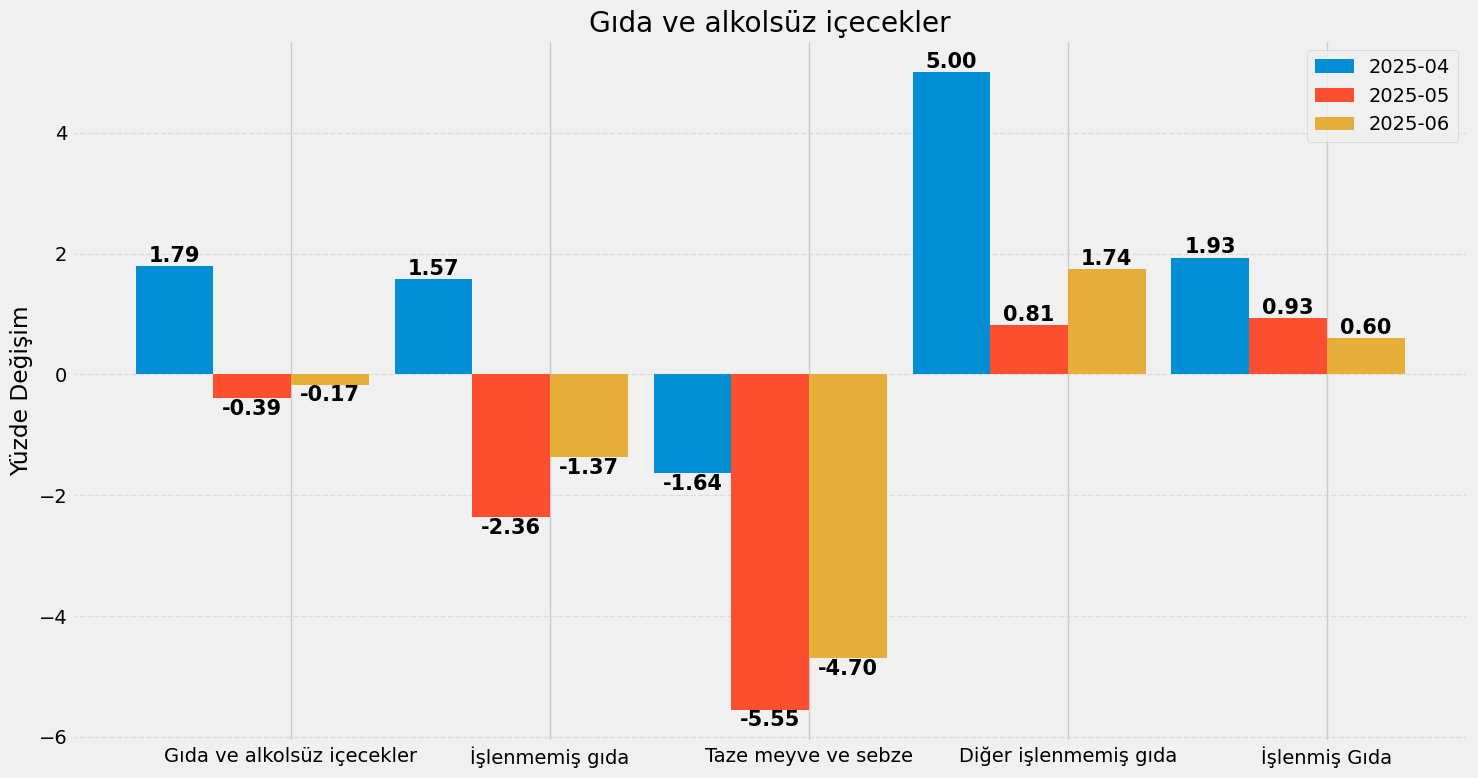

In [75]:

import matplotlib.pyplot as plt
import numpy as np

# Gruplu bar grafiÄŸi iÃ§in gerekli ayarlar
fig, ax = plt.subplots(figsize=(15, 8))

# X ekseni iÃ§in aylar ve kategoriler
months = gÄ±da.index
categories = gÄ±da.columns
x = np.arange(len(months))
width = 0.3  # bar geniÅŸliÄŸi

# Her kategori iÃ§in bar Ã§izimi
for i, category in enumerate(categories):
    values = gÄ±da[category].values
    bar_positions = x + (i - 1.5) * width  # gruplama iÃ§in konum kaydÄ±rmasÄ±
    bars = ax.bar(bar_positions, values, width, label=category)

    # BarlarÄ±n Ã¼stÃ¼ne kalÄ±n deÄŸer yazÄ±mÄ±
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            height + 0.01 if height >= 0 else height - 0.01,  # negatif deÄŸerler iÃ§in ayar
            f"{height:.2f}",
            fontsize=15,
            ha='center', 
            va='bottom' if height >= 0 else 'top',
            fontweight='bold'
        )

# Ekseni ayarlama
ax.set_xticks(x)
ax.set_xticklabels(months,rotation=0)
ax.set_ylabel("YÃ¼zde DeÄŸiÅŸim")
ax.set_title("GÄ±da ve alkolsÃ¼z iÃ§ecekler")
ax.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


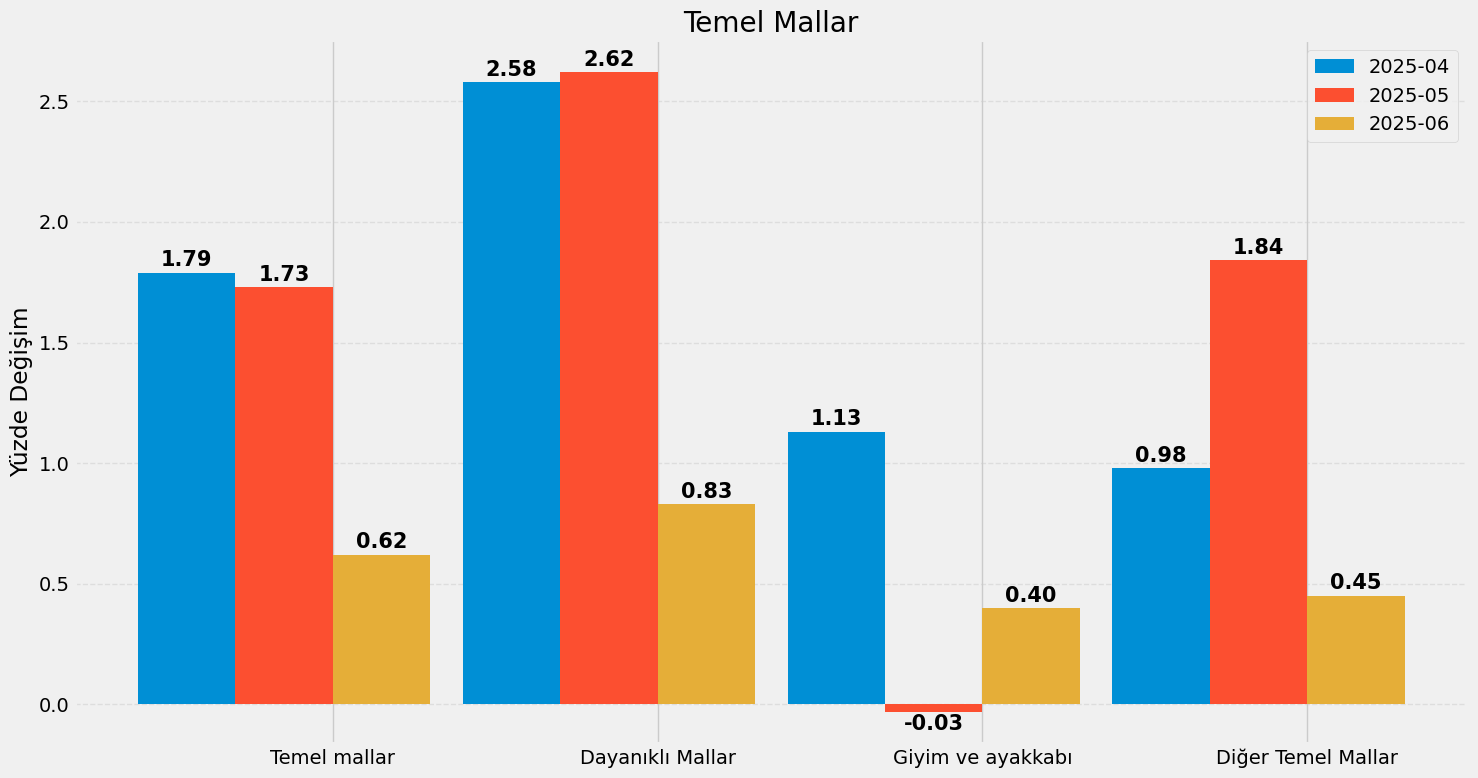

In [78]:

import matplotlib.pyplot as plt
import numpy as np
plt.style.use("fivethirtyeight")
# Gruplu bar grafiÄŸi iÃ§in gerekli ayarlar
fig, ax = plt.subplots(figsize=(15, 8))

# X ekseni iÃ§in aylar ve kategoriler
months = temelmallar.index
categories = temelmallar.columns
x = np.arange(len(months))
width = 0.3  # bar geniÅŸliÄŸi

# Her kategori iÃ§in bar Ã§izimi
for i, category in enumerate(categories):
    values = temelmallar[category].values
    bar_positions = x + (i - 1.5) * width  # gruplama iÃ§in konum kaydÄ±rmasÄ±
    bars = ax.bar(bar_positions, values, width, label=category)

    # BarlarÄ±n Ã¼stÃ¼ne kalÄ±n deÄŸer yazÄ±mÄ±
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            height + 0.01 if height >= 0 else height - 0.01,  # negatif deÄŸerler iÃ§in ayar
            f"{height:.2f}",
            fontsize=15,
            ha='center', 
            va='bottom' if height >= 0 else 'top',
            fontweight='bold'
        )

# Ekseni ayarlama
ax.set_xticks(x)
ax.set_xticklabels(months,rotation=0)
ax.set_ylabel("YÃ¼zde DeÄŸiÅŸim")
ax.set_title("Temel Mallar")
ax.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


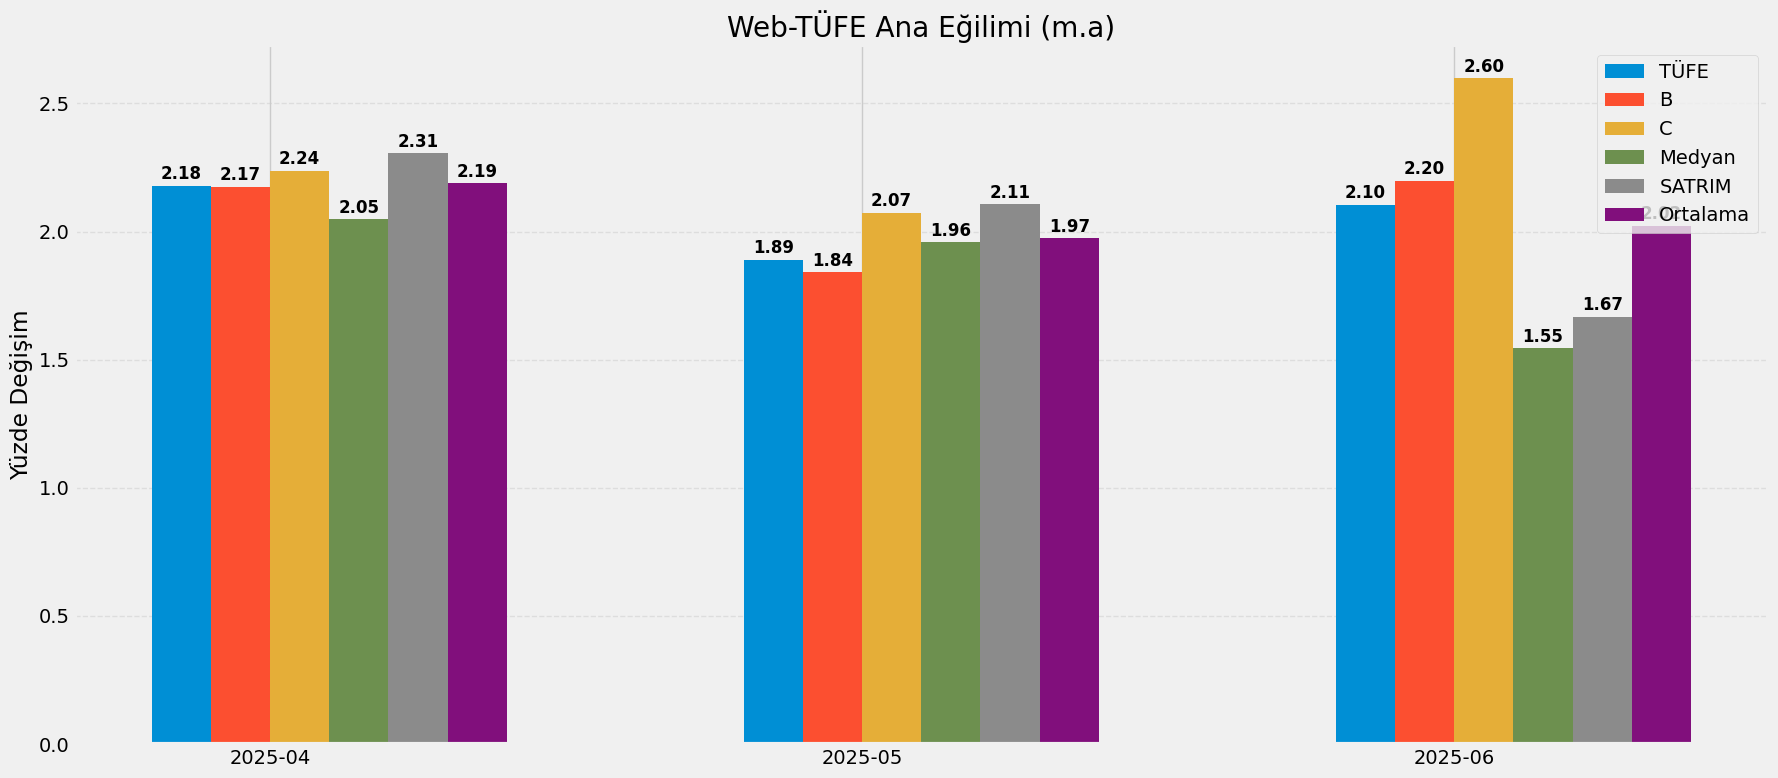

In [82]:

import matplotlib.pyplot as plt
import numpy as np
plt.style.use("fivethirtyeight")
# Gruplu bar grafiÄŸi iÃ§in gerekli ayarlar
fig, ax = plt.subplots(figsize=(18, 8))
eÄŸilim=eÄŸilim.iloc[-3:]
# X ekseni iÃ§in aylar ve kategoriler
months = eÄŸilim.index
categories = eÄŸilim.columns
x = np.arange(len(months))
width = 0.1  # bar geniÅŸliÄŸi

# Her kategori iÃ§in bar Ã§izimi
for i, category in enumerate(categories):
    values = eÄŸilim[category].values
    bar_positions = x + (i - 1.5) * width  # gruplama iÃ§in konum kaydÄ±rmasÄ±
    bars = ax.bar(bar_positions, values, width, label=category)

    # BarlarÄ±n Ã¼stÃ¼ne kalÄ±n deÄŸer yazÄ±mÄ±
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            height + 0.01 if height >= 0 else height - 0.01,  # negatif deÄŸerler iÃ§in ayar
            f"{height:.2f}",
            fontsize=12,
            ha='center', 
            va='bottom' if height >= 0 else 'top',
            fontweight='bold'
        )

# Ekseni ayarlama
ax.set_xticks(x)
ax.set_xticklabels(months,rotation=0)
ax.set_ylabel("YÃ¼zde DeÄŸiÅŸim")
ax.set_title("Web-TÃœFE Ana EÄŸilimi (m.a)")
ax.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
